In [1]:
import os

In [2]:
my_path = os.getcwd()

#1. Prepairing the Dataset

In [3]:
label_names = os.listdir()

In [4]:
class_mapping = dict()
class_ = 0
for i in label_names:
  class_mapping[i] = class_
  class_ = class_ + 1

In [5]:
class_mapping

{'.ipynb_checkpoints': 0,
 'Data': 1,
 'features_inceptionv3.npy': 2,
 'features_resnet50.npy': 3,
 'features_vgg.npy': 4,
 'Paris': 5,
 'pca_features_vgg.npy': 6,
 'pca_features__inceptionv3.npy': 7,
 'pca_features__resnet50.npy': 8,
 'Prabal_IRProject.ipynb': 9,
 'Testing_IRProject_Anjali.ipynb': 10,
 'X.npy': 11,
 'y.npy': 12}

In [ ]:
os.getcwd()

In [ ]:
path = 'C:\\Users\\Prabal\\Desktop\\Shradha'

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib
import pickle
import pandas as pd 
from matplotlib.pyplot import figure 

In [ ]:
import matplotlib.pyplot as plt
X = []
y = []

for folders in os.listdir():
  new_path = os.path.join(path,folders)
  label = class_mapping[folders]
  for images in os.listdir(new_path):
    img = cv2.imread(os.path.join(new_path,images))
    try:
      new_img = cv2.resize(img, (224, 224))
    except Exception as e:
      print(str(e))
    X.append(new_img)
    y.append(label)
  print('{} Completed'.format(folders))

In [6]:
# X = np.array(X)
# y = np.array(y)
X = np.load(my_path+'\\Data\\X.npy')
y = np.load(my_path+'\\Data\\y.npy')

In [7]:
X.shape, y.shape

((5063, 224, 224, 3), (5063,))

#Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape, X_test.shape

((3544, 224, 224, 3), (1519, 224, 224, 3))

In [ ]:
# np.save('Data/X.npy', X)
# np.save('Data/y.npy',y)

In [ ]:
#Trying from Here

In [29]:
x_train, x_test = X_train / 255.0, X_test / 255.0

In [30]:
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

VGG_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [31]:
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
feature_extractor=VGG_model.predict(x_train)

In [33]:
feature_extractor.shape

(3544, 7, 7, 512)

In [34]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [35]:
features.shape

(3544, 25088)

In [36]:
X_for_training = features #This is our X input to RF

In [1]:
# import xgboost as xgb
# model = xgb.XGBClassifier()
# print('Fitting')
# model.fit(X_for_training, y_train) 

# print('Fitting Completed')
# #Send test data through same feature extractor process

# print('Features for Test')
# X_test_feature = VGG_model.predict(X_test)
# X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# print('predict')
# #Now predict using the trained RF model. 
# prediction = model.predict(X_test_features)
# #Inverse le transform to get original label back. 
# # prediction = le.inverse_transform(prediction)

In [44]:
set(prediction)

{0, 2, 3, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16}

In [42]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  0.3087557603686636


#Classification 

## ResNet50

In [169]:
from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

batch_size = 64
num_classes = 17

# base_model = resnet50.ResNet50
# base_model = inception_v3.InceptionV3
base_model = vgg16.VGG16

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512,activation = 'relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [52]:
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0  

In [65]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])

X_train = vgg16.preprocess_input(X_train)

print(model.evaluate(X_train, y_train, batch_size=batch_size, verbose=1))
model.fit(X_train, y_train,
          epochs=50,
          batch_size=batch_size,
          shuffle=False,
          validation_data=(X_test, y_test))

56/56 [==============================] - 26s 457ms/step - loss: 2.4273 - acc: 0.4016
[2.6391866207122803, 0.3710496723651886]
Epoch 1/50
56/56 [==============================] - 38s 661ms/step - loss: 2.6847 - acc: 0.3821 - val_loss: 2.8950 - val_acc: 0.2153
Epoch 2/50
56/56 [==============================] - 37s 660ms/step - loss: 1.6650 - acc: 0.5449 - val_loss: 2.8077 - val_acc: 0.2219
Epoch 3/50
56/56 [==============================] - 37s 661ms/step - loss: 1.1600 - acc: 0.6701 - val_loss: 2.8254 - val_acc: 0.2140
Epoch 4/50
56/56 [==============================] - 37s 664ms/step - loss: 0.8550 - acc: 0.7517 - val_loss: 2.8348 - val_acc: 0.2304
Epoch 5/50
56/56 [==============================] - 37s 663ms/step - loss: 0.6936 - acc: 0.7951 - val_loss: 2.8601 - val_acc: 0.2653
Epoch 6/50
56/56 [==============================] - 37s 664ms/step - loss: 0.6654 - acc: 0.7833 - val_loss: 2.8792 - val_acc: 0.2304
Epoch 7/50
56/56 [==============================] - 37s 665ms/step - loss: 0

In [59]:
p  =model.predict(X_test)

In [63]:
y_test

array([ 0, 10, 12, ..., 16,  6,  1], dtype=int64)

In [64]:
p[0]

array([2.1922882e-01, 1.0360672e-02, 4.8623523e-01, 5.0597073e-04,
       2.7847120e-03, 4.8698351e-02, 5.4136356e-03, 2.9683812e-03,
       5.9040233e-02, 2.3660345e-03, 4.5727510e-02, 1.0360456e-03,
       3.7263405e-02, 1.6640134e-02, 3.6938995e-02, 1.3838045e-04,
       2.4653489e-02], dtype=float32)

In [11]:
os.getcwd()

'C:\\Users\\Prabal\\Desktop\\IR Project'

In [12]:
os.getcwd()+'\\Models\\Resnet.h5'

'C:\\Users\\Prabal\\Desktop\\IR Project\\Models\\Resnet.h5'

In [13]:
# model.save(os.getcwd()+'\\Models\\Resnet.h5')

In [17]:
# from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

batch_size = 64
num_classes = 17

# base_model = resnet50.ResNet50
base_model = inception_v3.InceptionV3
# base_model = vgg16.VGG16

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])


X_train = inception_v3.preprocess_input(X_train)

print(model.evaluate(X_train, y_train, batch_size=batch_size, verbose=1))
model.fit(X_train, y_train,
          epochs=50,
          batch_size=batch_size,
          shuffle=False,
          validation_data=(X_train, y_train))

111/111 [==============================] - 25s 205ms/step - loss: 0.0163 - acc: 1.0000


[0.016318481415510178, 1.0]

In [19]:
os.listdir()

['.ipynb_checkpoints',
 'Data',
 'defense',
 'Models',
 'New',
 'Part1',
 'Part2',
 'Shradha.ipynb',
 'Testing_IRProject_Prabal.ipynb']

In [26]:
os.getcwd()+'\\Part1\\'

'C:\\Users\\Prabal\\Desktop\\IR Project'

In [33]:
src_path = os.getcwd()+'\\Part2\\'
dst_path = os.getcwd()+'\\new\\'

In [34]:
# import shutil
# for folders in os.listdir(src_path):
#     print(folders+' Completed')
#     for image in os.listdir(os.path.join(src_path, folders)):
#         path = os.path.join(os.path.join(src_path, folders), image)
#         shutil.copy(path, dst_path)

All_Souls Completed
Ashmolean Completed
Balliol Completed
Bodleian Completed
Christ_Church Completed
Jesus Completed
Keble Completed
Magdalen Completed
New Completed
Oriel Completed
Oxford Completed
Pitt_Rivers Completed
Radcliffe_Camera Completed
Trinity Completed


In [ ]:
#Program Starts From Here 

In [7]:
import tensorflow as tf

In [8]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [10]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [11]:
test_path = os.getcwd()+'\\Data\\paris_defense_000011.jpg'
print(test_path)

C:\Users\Prabal\Desktop\Shradha\Data\paris_defense_000011.jpg


In [5]:
# model.summary()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [13]:
img , x = load_image(test_path)

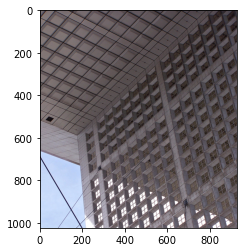

In [14]:
plt.imshow(plt.imread(test_path))

In [16]:
predictions = model.predict(x)

In [15]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

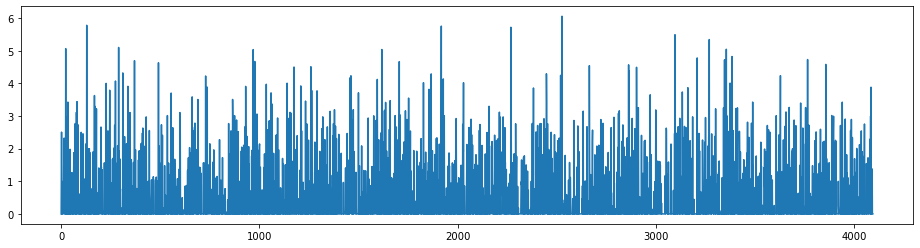

In [16]:
img, x = load_image(test_path)
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [17]:
path = os.getcwd()+'\\Data'
temp = []
for name in os.listdir(path):
  temp.append(path+'\\'+name)

In [19]:
import time
tic = time.process_time()
features = []
temp2 = []
for i, image_path in enumerate(temp):
    print("analyzing image {}".format(i))
    try:
        img, x = load_image(image_path);
        feat = feat_extractor.predict(x)[0]
        features.append(feat)
        temp2.append(temp[i])
    except Exception as e:
        print(str(e))

analyzing image 0
analyzing image 1
analyzing image 2
analyzing image 3
analyzing image 4
analyzing image 5
analyzing image 6
analyzing image 7
analyzing image 8
analyzing image 9
analyzing image 10
analyzing image 11
analyzing image 12
analyzing image 13
analyzing image 14
analyzing image 15
analyzing image 16
analyzing image 17
analyzing image 18
analyzing image 19
analyzing image 20
analyzing image 21
analyzing image 22
analyzing image 23
analyzing image 24
analyzing image 25
analyzing image 26
analyzing image 27
analyzing image 28
analyzing image 29
analyzing image 30
analyzing image 31
analyzing image 32
analyzing image 33
analyzing image 34
analyzing image 35
analyzing image 36
analyzing image 37
analyzing image 38
analyzing image 39
analyzing image 40
analyzing image 41
analyzing image 42
analyzing image 43
analyzing image 44
analyzing image 45
analyzing image 46
analyzing image 47
analyzing image 48
analyzing image 49
analyzing image 50
analyzing image 51
analyzing image 52
ana

In [ ]:
#Finding n_components from PCA.

In [29]:
# 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16F.npy'
# 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\CBIR\\Features\\VGG16F.npy' 
'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\VGG16F.npy' 

'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\VGG16F.npy'

In [31]:
import numpy as np
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\VGG16F.npy' ,np.array(features))

In [21]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=1000)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [23]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [35]:
type(pca_features)

numpy.ndarray

In [36]:
import pickle
filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\pca'
pickle.dump(pca, open(filename, 'wb'))

In [37]:
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\VGG16PCAF.npy',pca_features)

In [168]:
pca_features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\VGG16PCAF.npy')

In [24]:
dict_path = 'C:\\Users\\Prabal\\Desktop\\Shradha\\Paris\\'
my_dict = dict()
c=0
for folder in os.listdir(dict_path):
    my_dict[folder] = c
    c =c+1
def findClass(index):
    return my_dict[temp2[index].split('\\')[-1].split('_')[1]]
def getAccuracy(q,r):
    count=0
    for i in r:
        if q ==i:
            count = count+1
    return count*100/len(r)

In [60]:
# print(my_dict[temp2[6000].split('\\')[-1].split('_')[1]])
# print(len(temp2))


6393


Total time : 0.521292399999993 seconds
Accuracy is 80.0


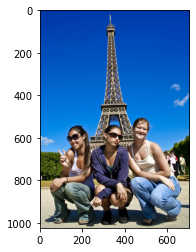

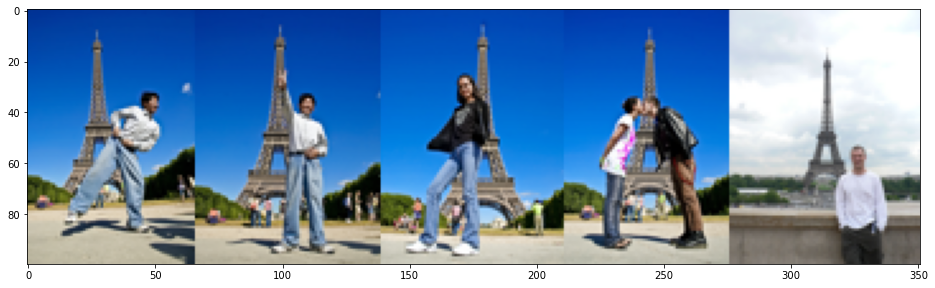

In [25]:
import random
# grab a random query image
query_image_idx = int(3000 * random.random())
class_q = findClass(query_image_idx)
class_r = list()
# let's display the image
img = image.load_img(temp2[query_image_idx])

start = time.perf_counter()
plt.imshow(img)
from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
thumbs = []
for idx in idx_closest:
    img = image.load_img(temp2[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
print('Total time : {} seconds'.format(end-start))
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

In [26]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(len(temp2)):
        if(temp2[i].split('\\')[-1].split('_')[1] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)

defense
eiffel
general
invalides
louvre
moulinrouge
museedorsay
notredame
pantheon
pompidou
sacrecoeur
triomphe


In [28]:
import pandas as pd
result_Vgg16 = pd.DataFrame(temp_)
result_Vgg16.columns = ['Class', 'Time', 'Accuracy']
result_Vgg16

Class      Time  Accuracy
0       defense  0.369977      76.0
1        eiffel  0.374138       0.0
2       general  0.380008      36.0
3     invalides  0.377579      28.0
4        louvre  0.380009      72.0
5   moulinrouge  0.388519      76.0
6   museedorsay  0.374771      48.0
7     notredame  0.373997      40.0
8      pantheon  0.474230      76.0
9      pompidou  0.370499      32.0
10   sacrecoeur  0.375760      60.0
11     triomphe  0.379292      48.0

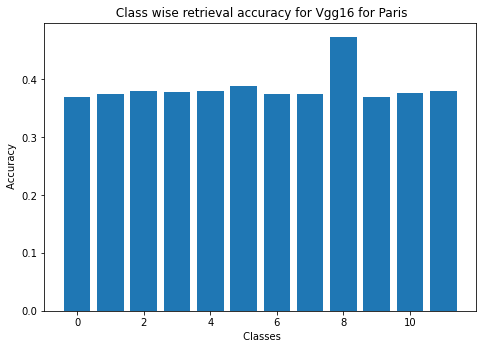

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = result_Vgg16.Time.values
x= [i for i in range(12)]
ax.bar(x,y)
ax.set_xlabel(" Classes")
ax.set_ylabel(" Accuracy")
plt.title(" Class wise retrieval accuracy for Vgg16 for Paris")
plt.show()

In [177]:
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp2[idx])
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
#         print('Total time : {} seconds'.format(end-start))
#         print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on 1000 random samples on VGG16 (Paris) {}'.format(acc_avg/n_samples))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

0


  0%|                                                                                 | 1/1000 [00:00<07:44,  2.15it/s]

1


  0%|▏                                                                                | 2/1000 [00:00<07:52,  2.11it/s]

2


  0%|▏                                                                                | 3/1000 [00:01<07:44,  2.14it/s]

3


  0%|▎                                                                                | 4/1000 [00:01<07:55,  2.09it/s]

4


  0%|▍                                                                                | 5/1000 [00:02<07:55,  2.09it/s]

5


  1%|▍                                                                                | 6/1000 [00:02<07:46,  2.13it/s]

6


  1%|▌                                                                                | 7/1000 [00:03<07:55,  2.09it/s]

7


  1%|▋                                                                                | 8/1000 [00:03<07:48,  2.12it/s]

8


  1%|▋                                                                                | 9/1000 [00:04<08:00,  2.06it/s]

9


  1%|▊                                                                               | 10/1000 [00:04<07:55,  2.08it/s]

10


  1%|▉                                                                               | 11/1000 [00:05<07:48,  2.11it/s]

11


  1%|▉                                                                               | 12/1000 [00:05<07:49,  2.11it/s]

12


  1%|█                                                                               | 13/1000 [00:06<07:45,  2.12it/s]

13


  1%|█                                                                               | 14/1000 [00:06<07:41,  2.14it/s]

14


  2%|█▏                                                                              | 15/1000 [00:07<07:51,  2.09it/s]

15


  2%|█▎                                                                              | 16/1000 [00:07<07:51,  2.09it/s]

16


  2%|█▎                                                                              | 17/1000 [00:08<07:48,  2.10it/s]

17


  2%|█▍                                                                              | 18/1000 [00:08<07:46,  2.10it/s]

18


  2%|█▌                                                                              | 19/1000 [00:09<07:47,  2.10it/s]

19


  2%|█▌                                                                              | 20/1000 [00:09<07:40,  2.13it/s]

20


  2%|█▋                                                                              | 21/1000 [00:09<07:34,  2.15it/s]

21


  2%|█▊                                                                              | 22/1000 [00:10<07:31,  2.17it/s]

22


  2%|█▊                                                                              | 23/1000 [00:10<07:32,  2.16it/s]

23


  2%|█▉                                                                              | 24/1000 [00:11<07:42,  2.11it/s]

24


  2%|██                                                                              | 25/1000 [00:11<07:37,  2.13it/s]

25


  3%|██                                                                              | 26/1000 [00:12<07:49,  2.08it/s]

26


  3%|██▏                                                                             | 27/1000 [00:12<07:44,  2.09it/s]

27


  3%|██▏                                                                             | 28/1000 [00:13<07:42,  2.10it/s]

28


  3%|██▎                                                                             | 29/1000 [00:13<07:33,  2.14it/s]

29


  3%|██▍                                                                             | 30/1000 [00:14<07:35,  2.13it/s]

30


  3%|██▍                                                                             | 31/1000 [00:14<07:38,  2.11it/s]

31


  3%|██▌                                                                             | 32/1000 [00:15<07:37,  2.12it/s]

32


  3%|██▋                                                                             | 33/1000 [00:15<07:35,  2.12it/s]

33


  3%|██▋                                                                             | 34/1000 [00:16<07:32,  2.14it/s]

34


  4%|██▊                                                                             | 35/1000 [00:16<07:40,  2.10it/s]

35


  4%|██▉                                                                             | 36/1000 [00:17<07:42,  2.09it/s]

36


  4%|██▉                                                                             | 37/1000 [00:17<07:36,  2.11it/s]

37


  4%|███                                                                             | 38/1000 [00:18<07:40,  2.09it/s]

38


  4%|███                                                                             | 39/1000 [00:18<07:40,  2.09it/s]

39


  4%|███▏                                                                            | 40/1000 [00:18<07:42,  2.08it/s]

40


  4%|███▎                                                                            | 41/1000 [00:19<07:46,  2.05it/s]

41


  4%|███▎                                                                            | 42/1000 [00:19<07:41,  2.08it/s]

42


  4%|███▍                                                                            | 43/1000 [00:20<07:41,  2.07it/s]

43


  4%|███▌                                                                            | 44/1000 [00:20<07:42,  2.07it/s]

44


  4%|███▌                                                                            | 45/1000 [00:21<07:36,  2.09it/s]

45


  5%|███▋                                                                            | 46/1000 [00:21<07:37,  2.08it/s]

46


  5%|███▊                                                                            | 47/1000 [00:22<07:38,  2.08it/s]

47


  5%|███▊                                                                            | 48/1000 [00:22<07:47,  2.04it/s]

48


  5%|███▉                                                                            | 49/1000 [00:23<07:41,  2.06it/s]

49


  5%|████                                                                            | 50/1000 [00:23<07:31,  2.10it/s]

50


  5%|████                                                                            | 51/1000 [00:24<07:33,  2.09it/s]

51


  5%|████▏                                                                           | 52/1000 [00:24<07:35,  2.08it/s]

52


  5%|████▏                                                                           | 53/1000 [00:25<07:24,  2.13it/s]

53


  5%|████▎                                                                           | 54/1000 [00:25<07:26,  2.12it/s]

54


  6%|████▍                                                                           | 55/1000 [00:26<07:20,  2.14it/s]

55


  6%|████▍                                                                           | 56/1000 [00:26<07:20,  2.14it/s]

56


  6%|████▌                                                                           | 57/1000 [00:27<07:20,  2.14it/s]

57


  6%|████▋                                                                           | 58/1000 [00:27<07:20,  2.14it/s]

58


  6%|████▋                                                                           | 59/1000 [00:28<07:23,  2.12it/s]

59


  6%|████▊                                                                           | 60/1000 [00:28<07:23,  2.12it/s]

60


  6%|████▉                                                                           | 61/1000 [00:28<07:27,  2.10it/s]

61


  6%|████▉                                                                           | 62/1000 [00:29<07:27,  2.10it/s]

62


  6%|█████                                                                           | 63/1000 [00:29<07:20,  2.13it/s]

63


  6%|█████                                                                           | 64/1000 [00:30<07:22,  2.11it/s]

64


  6%|█████▏                                                                          | 65/1000 [00:30<07:29,  2.08it/s]

65


  7%|█████▎                                                                          | 66/1000 [00:31<07:33,  2.06it/s]

66


  7%|█████▎                                                                          | 67/1000 [00:31<07:27,  2.08it/s]

67


  7%|█████▍                                                                          | 68/1000 [00:32<07:19,  2.12it/s]

68


  7%|█████▌                                                                          | 69/1000 [00:32<07:09,  2.17it/s]

69


  7%|█████▌                                                                          | 70/1000 [00:33<07:11,  2.16it/s]

70


  7%|█████▋                                                                          | 71/1000 [00:33<07:20,  2.11it/s]

71


  7%|█████▊                                                                          | 72/1000 [00:34<07:42,  2.00it/s]

72


  7%|█████▊                                                                          | 73/1000 [00:34<07:35,  2.03it/s]

73


  7%|█████▉                                                                          | 74/1000 [00:35<07:41,  2.00it/s]

74


  8%|██████                                                                          | 75/1000 [00:35<07:33,  2.04it/s]

75


  8%|██████                                                                          | 76/1000 [00:36<07:26,  2.07it/s]

76


  8%|██████▏                                                                         | 77/1000 [00:36<07:27,  2.06it/s]

77


  8%|██████▏                                                                         | 78/1000 [00:37<07:34,  2.03it/s]

78


  8%|██████▎                                                                         | 79/1000 [00:37<07:23,  2.08it/s]

79


  8%|██████▍                                                                         | 80/1000 [00:38<07:28,  2.05it/s]

80


  8%|██████▍                                                                         | 81/1000 [00:38<07:22,  2.08it/s]

81


  8%|██████▌                                                                         | 82/1000 [00:39<07:18,  2.09it/s]

82


  8%|██████▋                                                                         | 83/1000 [00:39<07:19,  2.09it/s]

83


  8%|██████▋                                                                         | 84/1000 [00:40<07:20,  2.08it/s]

84


  8%|██████▊                                                                         | 85/1000 [00:40<07:16,  2.09it/s]

85


  9%|██████▉                                                                         | 86/1000 [00:40<07:14,  2.11it/s]

86


  9%|██████▉                                                                         | 87/1000 [00:41<07:16,  2.09it/s]

87


  9%|███████                                                                         | 88/1000 [00:41<07:17,  2.08it/s]

88


  9%|███████                                                                         | 89/1000 [00:42<07:22,  2.06it/s]

89


  9%|███████▏                                                                        | 90/1000 [00:42<07:30,  2.02it/s]

90


  9%|███████▎                                                                        | 91/1000 [00:43<07:18,  2.07it/s]

91


  9%|███████▎                                                                        | 92/1000 [00:43<07:22,  2.05it/s]

92


  9%|███████▍                                                                        | 93/1000 [00:44<07:16,  2.08it/s]

93


  9%|███████▌                                                                        | 94/1000 [00:44<07:12,  2.09it/s]

94


 10%|███████▌                                                                        | 95/1000 [00:45<07:18,  2.06it/s]

95


 10%|███████▋                                                                        | 96/1000 [00:45<07:18,  2.06it/s]

96


 10%|███████▊                                                                        | 97/1000 [00:46<07:21,  2.04it/s]

97


 10%|███████▊                                                                        | 98/1000 [00:46<07:28,  2.01it/s]

98


 10%|███████▉                                                                        | 99/1000 [00:47<07:16,  2.07it/s]

99


 10%|███████▉                                                                       | 100/1000 [00:47<07:11,  2.09it/s]

100


 10%|███████▉                                                                       | 101/1000 [00:48<07:08,  2.10it/s]

101


 10%|████████                                                                       | 102/1000 [00:48<07:05,  2.11it/s]

102


 10%|████████▏                                                                      | 103/1000 [00:49<07:15,  2.06it/s]

103


 10%|████████▏                                                                      | 104/1000 [00:49<07:15,  2.06it/s]

104


 10%|████████▎                                                                      | 105/1000 [00:50<07:14,  2.06it/s]

105


 11%|████████▎                                                                      | 106/1000 [00:50<07:09,  2.08it/s]

106


 11%|████████▍                                                                      | 107/1000 [00:51<07:06,  2.10it/s]

107


 11%|████████▌                                                                      | 108/1000 [00:51<07:07,  2.09it/s]

108


 11%|████████▌                                                                      | 109/1000 [00:52<07:04,  2.10it/s]

109


 11%|████████▋                                                                      | 110/1000 [00:52<07:09,  2.07it/s]

110


 11%|████████▊                                                                      | 111/1000 [00:53<07:05,  2.09it/s]

111


 11%|████████▊                                                                      | 112/1000 [00:53<07:06,  2.08it/s]

112


 11%|████████▉                                                                      | 113/1000 [00:54<07:07,  2.08it/s]

113


 11%|█████████                                                                      | 114/1000 [00:54<07:03,  2.09it/s]

114


 12%|█████████                                                                      | 115/1000 [00:54<07:04,  2.09it/s]

115


 12%|█████████▏                                                                     | 116/1000 [00:55<07:01,  2.10it/s]

116


 12%|█████████▏                                                                     | 117/1000 [00:55<07:02,  2.09it/s]

117


 12%|█████████▎                                                                     | 118/1000 [00:56<07:03,  2.08it/s]

118


 12%|█████████▍                                                                     | 119/1000 [00:56<07:12,  2.04it/s]

119


 12%|█████████▍                                                                     | 120/1000 [00:57<07:10,  2.04it/s]

120


 12%|█████████▌                                                                     | 121/1000 [00:57<07:08,  2.05it/s]

121


 12%|█████████▋                                                                     | 122/1000 [00:58<07:14,  2.02it/s]

122


 12%|█████████▋                                                                     | 123/1000 [00:58<07:04,  2.07it/s]

123


 12%|█████████▊                                                                     | 124/1000 [00:59<07:03,  2.07it/s]

124


 12%|█████████▉                                                                     | 125/1000 [00:59<06:59,  2.09it/s]

125


 13%|█████████▉                                                                     | 126/1000 [01:00<06:56,  2.10it/s]

126


 13%|██████████                                                                     | 127/1000 [01:00<06:56,  2.10it/s]

127


 13%|██████████                                                                     | 128/1000 [01:01<06:55,  2.10it/s]

128


 13%|██████████▏                                                                    | 129/1000 [01:01<06:52,  2.11it/s]

129


 13%|██████████▎                                                                    | 130/1000 [01:02<06:54,  2.10it/s]

130


 13%|██████████▎                                                                    | 131/1000 [01:02<06:47,  2.13it/s]

131


 13%|██████████▍                                                                    | 132/1000 [01:03<06:51,  2.11it/s]

132


 13%|██████████▌                                                                    | 133/1000 [01:03<06:49,  2.12it/s]

133


 13%|██████████▌                                                                    | 134/1000 [01:04<06:52,  2.10it/s]

134


 14%|██████████▋                                                                    | 135/1000 [01:04<06:53,  2.09it/s]

135


 14%|██████████▋                                                                    | 136/1000 [01:05<06:47,  2.12it/s]

136


 14%|██████████▊                                                                    | 137/1000 [01:05<06:46,  2.12it/s]

137


 14%|██████████▉                                                                    | 138/1000 [01:06<06:57,  2.07it/s]

138


 14%|██████████▉                                                                    | 139/1000 [01:06<06:56,  2.06it/s]

139


 14%|███████████                                                                    | 140/1000 [01:06<06:52,  2.08it/s]

140


 14%|███████████▏                                                                   | 141/1000 [01:07<06:44,  2.12it/s]

141


 14%|███████████▏                                                                   | 142/1000 [01:07<06:43,  2.13it/s]

142


 14%|███████████▎                                                                   | 143/1000 [01:08<06:46,  2.11it/s]

143


 14%|███████████▍                                                                   | 144/1000 [01:08<06:52,  2.07it/s]

144


 14%|███████████▍                                                                   | 145/1000 [01:09<06:48,  2.09it/s]

145


 15%|███████████▌                                                                   | 146/1000 [01:09<06:42,  2.12it/s]

146


 15%|███████████▌                                                                   | 147/1000 [01:10<06:48,  2.09it/s]

147


 15%|███████████▋                                                                   | 148/1000 [01:10<06:47,  2.09it/s]

148


 15%|███████████▊                                                                   | 149/1000 [01:11<06:50,  2.07it/s]

149


 15%|███████████▊                                                                   | 150/1000 [01:11<06:46,  2.09it/s]

150


 15%|███████████▉                                                                   | 151/1000 [01:12<06:47,  2.08it/s]

151


 15%|████████████                                                                   | 152/1000 [01:12<06:48,  2.08it/s]

152


 15%|████████████                                                                   | 153/1000 [01:13<06:42,  2.10it/s]

153


 15%|████████████▏                                                                  | 154/1000 [01:13<06:42,  2.10it/s]

154


 16%|████████████▏                                                                  | 155/1000 [01:14<06:44,  2.09it/s]

155


 16%|████████████▎                                                                  | 156/1000 [01:14<06:37,  2.12it/s]

156


 16%|████████████▍                                                                  | 157/1000 [01:15<06:44,  2.09it/s]

157


 16%|████████████▍                                                                  | 158/1000 [01:15<06:44,  2.08it/s]

158


 16%|████████████▌                                                                  | 159/1000 [01:16<06:49,  2.05it/s]

159


 16%|████████████▋                                                                  | 160/1000 [01:16<06:55,  2.02it/s]

160


 16%|████████████▋                                                                  | 161/1000 [01:17<06:56,  2.01it/s]

161


 16%|████████████▊                                                                  | 162/1000 [01:17<06:49,  2.05it/s]

162


 16%|████████████▉                                                                  | 163/1000 [01:18<06:50,  2.04it/s]

163


 16%|████████████▉                                                                  | 164/1000 [01:18<06:45,  2.06it/s]

164


 16%|█████████████                                                                  | 165/1000 [01:18<06:41,  2.08it/s]

165


 17%|█████████████                                                                  | 166/1000 [01:19<06:38,  2.10it/s]

166


 17%|█████████████▏                                                                 | 167/1000 [01:19<06:42,  2.07it/s]

167


 17%|█████████████▎                                                                 | 168/1000 [01:20<06:38,  2.09it/s]

168


 17%|█████████████▎                                                                 | 169/1000 [01:20<06:35,  2.10it/s]

169


 17%|█████████████▍                                                                 | 170/1000 [01:21<06:37,  2.09it/s]

170


 17%|█████████████▌                                                                 | 171/1000 [01:21<06:34,  2.10it/s]

171


 17%|█████████████▌                                                                 | 172/1000 [01:22<06:32,  2.11it/s]

172


 17%|█████████████▋                                                                 | 173/1000 [01:22<06:30,  2.12it/s]

173


 17%|█████████████▋                                                                 | 174/1000 [01:23<06:29,  2.12it/s]

174


 18%|█████████████▊                                                                 | 175/1000 [01:23<06:28,  2.13it/s]

175


 18%|█████████████▉                                                                 | 176/1000 [01:24<06:27,  2.13it/s]

176


 18%|█████████████▉                                                                 | 177/1000 [01:24<06:30,  2.11it/s]

177


 18%|██████████████                                                                 | 178/1000 [01:25<06:28,  2.12it/s]

178


 18%|██████████████▏                                                                | 179/1000 [01:25<06:30,  2.10it/s]

179


 18%|██████████████▏                                                                | 180/1000 [01:26<06:32,  2.09it/s]

180


 18%|██████████████▎                                                                | 181/1000 [01:26<06:29,  2.10it/s]

181


 18%|██████████████▍                                                                | 182/1000 [01:27<06:39,  2.05it/s]

182


 18%|██████████████▍                                                                | 183/1000 [01:27<06:39,  2.04it/s]

183


 18%|██████████████▌                                                                | 184/1000 [01:28<06:24,  2.12it/s]

184


 18%|██████████████▌                                                                | 185/1000 [01:28<06:27,  2.11it/s]

185


 19%|██████████████▋                                                                | 186/1000 [01:28<06:29,  2.09it/s]

186


 19%|██████████████▊                                                                | 187/1000 [01:29<06:26,  2.10it/s]

187


 19%|██████████████▊                                                                | 188/1000 [01:29<06:24,  2.11it/s]

188


 19%|██████████████▉                                                                | 189/1000 [01:30<06:26,  2.10it/s]

189


 19%|███████████████                                                                | 190/1000 [01:30<06:18,  2.14it/s]

190


 19%|███████████████                                                                | 191/1000 [01:31<06:16,  2.15it/s]

191


 19%|███████████████▏                                                               | 192/1000 [01:31<06:20,  2.12it/s]

192


 19%|███████████████▏                                                               | 193/1000 [01:32<06:26,  2.09it/s]

193


 19%|███████████████▎                                                               | 194/1000 [01:32<06:24,  2.10it/s]

194


 20%|███████████████▍                                                               | 195/1000 [01:33<06:21,  2.11it/s]

195


 20%|███████████████▍                                                               | 196/1000 [01:33<06:20,  2.12it/s]

196


 20%|███████████████▌                                                               | 197/1000 [01:34<06:26,  2.08it/s]

197


 20%|███████████████▋                                                               | 198/1000 [01:34<06:30,  2.06it/s]

198


 20%|███████████████▋                                                               | 199/1000 [01:35<06:24,  2.08it/s]

199


 20%|███████████████▊                                                               | 200/1000 [01:35<06:22,  2.09it/s]

200


 20%|███████████████▉                                                               | 201/1000 [01:36<06:23,  2.08it/s]

201


 20%|███████████████▉                                                               | 202/1000 [01:36<06:20,  2.09it/s]

202


 20%|████████████████                                                               | 203/1000 [01:37<06:13,  2.14it/s]

203


 20%|████████████████                                                               | 204/1000 [01:37<06:17,  2.11it/s]

204


 20%|████████████████▏                                                              | 205/1000 [01:38<06:22,  2.08it/s]

205


 21%|████████████████▎                                                              | 206/1000 [01:38<06:19,  2.09it/s]

206


 21%|████████████████▎                                                              | 207/1000 [01:38<06:16,  2.10it/s]

207


 21%|████████████████▍                                                              | 208/1000 [01:39<06:07,  2.15it/s]

208


 21%|████████████████▌                                                              | 209/1000 [01:39<06:07,  2.15it/s]

209


 21%|████████████████▌                                                              | 210/1000 [01:40<06:08,  2.14it/s]

210


 21%|████████████████▋                                                              | 211/1000 [01:40<06:19,  2.08it/s]

211


 21%|████████████████▋                                                              | 212/1000 [01:41<06:24,  2.05it/s]

212


 21%|████████████████▊                                                              | 213/1000 [01:41<06:18,  2.08it/s]

213


 21%|████████████████▉                                                              | 214/1000 [01:42<06:15,  2.09it/s]

214


 22%|████████████████▉                                                              | 215/1000 [01:42<06:16,  2.09it/s]

215


 22%|█████████████████                                                              | 216/1000 [01:43<06:13,  2.10it/s]

216


 22%|█████████████████▏                                                             | 217/1000 [01:43<06:14,  2.09it/s]

217


 22%|█████████████████▏                                                             | 218/1000 [01:44<06:11,  2.10it/s]

218


 22%|█████████████████▎                                                             | 219/1000 [01:44<06:09,  2.11it/s]

219


 22%|█████████████████▍                                                             | 220/1000 [01:45<06:08,  2.12it/s]

220


 22%|█████████████████▍                                                             | 221/1000 [01:45<06:07,  2.12it/s]

221


 22%|█████████████████▌                                                             | 222/1000 [01:46<06:13,  2.09it/s]

222


 22%|█████████████████▌                                                             | 223/1000 [01:46<06:12,  2.09it/s]

223


 22%|█████████████████▋                                                             | 224/1000 [01:47<06:05,  2.12it/s]

224


 22%|█████████████████▊                                                             | 225/1000 [01:47<06:14,  2.07it/s]

225


 23%|█████████████████▊                                                             | 226/1000 [01:48<06:16,  2.06it/s]

226


 23%|█████████████████▉                                                             | 227/1000 [01:48<06:14,  2.06it/s]

227


 23%|██████████████████                                                             | 228/1000 [01:49<06:15,  2.06it/s]

228


 23%|██████████████████                                                             | 229/1000 [01:49<06:13,  2.06it/s]

229


 23%|██████████████████▏                                                            | 230/1000 [01:50<06:16,  2.04it/s]

230


 23%|██████████████████▏                                                            | 231/1000 [01:50<06:13,  2.06it/s]

231


 23%|██████████████████▎                                                            | 232/1000 [01:50<06:10,  2.07it/s]

232


 23%|██████████████████▍                                                            | 233/1000 [01:51<06:04,  2.10it/s]

233


 23%|██████████████████▍                                                            | 234/1000 [01:51<05:55,  2.15it/s]

234


 24%|██████████████████▌                                                            | 235/1000 [01:52<05:52,  2.17it/s]

235


 24%|██████████████████▋                                                            | 236/1000 [01:52<06:02,  2.11it/s]

236


 24%|██████████████████▋                                                            | 237/1000 [01:53<05:58,  2.13it/s]

237


 24%|██████████████████▊                                                            | 238/1000 [01:53<06:01,  2.11it/s]

238


 24%|██████████████████▉                                                            | 239/1000 [01:54<06:03,  2.09it/s]

239


 24%|██████████████████▉                                                            | 240/1000 [01:54<06:01,  2.10it/s]

240


 24%|███████████████████                                                            | 241/1000 [01:55<06:05,  2.08it/s]

241


 24%|███████████████████                                                            | 242/1000 [01:55<06:05,  2.08it/s]

242


 24%|███████████████████▏                                                           | 243/1000 [01:56<06:06,  2.07it/s]

243


 24%|███████████████████▎                                                           | 244/1000 [01:56<06:13,  2.03it/s]

244


 24%|███████████████████▎                                                           | 245/1000 [01:57<06:13,  2.02it/s]

245


 25%|███████████████████▍                                                           | 246/1000 [01:57<06:04,  2.07it/s]

246


 25%|███████████████████▌                                                           | 247/1000 [01:58<06:08,  2.04it/s]

247


 25%|███████████████████▌                                                           | 248/1000 [01:58<06:09,  2.04it/s]

248


 25%|███████████████████▋                                                           | 249/1000 [01:59<06:11,  2.02it/s]

249


 25%|███████████████████▊                                                           | 250/1000 [01:59<06:09,  2.03it/s]

250


 25%|███████████████████▊                                                           | 251/1000 [02:00<06:05,  2.05it/s]

251


 25%|███████████████████▉                                                           | 252/1000 [02:00<05:59,  2.08it/s]

252


 25%|███████████████████▉                                                           | 253/1000 [02:01<06:04,  2.05it/s]

253


 25%|████████████████████                                                           | 254/1000 [02:01<06:03,  2.05it/s]

254


 26%|████████████████████▏                                                          | 255/1000 [02:02<05:55,  2.10it/s]

255


 26%|████████████████████▏                                                          | 256/1000 [02:02<05:54,  2.10it/s]

256


 26%|████████████████████▎                                                          | 257/1000 [02:02<05:51,  2.11it/s]

257


 26%|████████████████████▍                                                          | 258/1000 [02:03<05:52,  2.10it/s]

258


 26%|████████████████████▍                                                          | 259/1000 [02:03<06:00,  2.05it/s]

259


 26%|████████████████████▌                                                          | 260/1000 [02:04<05:56,  2.07it/s]

260


 26%|████████████████████▌                                                          | 261/1000 [02:04<06:03,  2.03it/s]

261


 26%|████████████████████▋                                                          | 262/1000 [02:05<06:01,  2.04it/s]

262


 26%|████████████████████▊                                                          | 263/1000 [02:05<05:54,  2.08it/s]

263


 26%|████████████████████▊                                                          | 264/1000 [02:06<05:49,  2.10it/s]

264


 26%|████████████████████▉                                                          | 265/1000 [02:06<05:44,  2.13it/s]

265


 27%|█████████████████████                                                          | 266/1000 [02:07<05:43,  2.13it/s]

266


 27%|█████████████████████                                                          | 267/1000 [02:07<05:47,  2.11it/s]

267


 27%|█████████████████████▏                                                         | 268/1000 [02:08<05:41,  2.14it/s]

268


 27%|█████████████████████▎                                                         | 269/1000 [02:08<05:41,  2.14it/s]

269


 27%|█████████████████████▎                                                         | 270/1000 [02:09<05:41,  2.13it/s]

270


 27%|█████████████████████▍                                                         | 271/1000 [02:09<05:48,  2.09it/s]

271


 27%|█████████████████████▍                                                         | 272/1000 [02:10<05:52,  2.07it/s]

272


 27%|█████████████████████▌                                                         | 273/1000 [02:10<05:48,  2.08it/s]

273


 27%|█████████████████████▋                                                         | 274/1000 [02:11<05:49,  2.08it/s]

274


 28%|█████████████████████▋                                                         | 275/1000 [02:11<05:49,  2.07it/s]

275


 28%|█████████████████████▊                                                         | 276/1000 [02:12<05:46,  2.09it/s]

276


 28%|█████████████████████▉                                                         | 277/1000 [02:12<05:43,  2.11it/s]

277


 28%|█████████████████████▉                                                         | 278/1000 [02:13<05:45,  2.09it/s]

278


 28%|██████████████████████                                                         | 279/1000 [02:13<05:46,  2.08it/s]

279


 28%|██████████████████████                                                         | 280/1000 [02:13<05:42,  2.10it/s]

280


 28%|██████████████████████▏                                                        | 281/1000 [02:14<05:37,  2.13it/s]

281


 28%|██████████████████████▎                                                        | 282/1000 [02:14<05:33,  2.15it/s]

282


 28%|██████████████████████▎                                                        | 283/1000 [02:15<05:34,  2.15it/s]

283


 28%|██████████████████████▍                                                        | 284/1000 [02:15<05:34,  2.14it/s]

284


 28%|██████████████████████▌                                                        | 285/1000 [02:16<05:34,  2.14it/s]

285


 29%|██████████████████████▌                                                        | 286/1000 [02:16<05:37,  2.12it/s]

286


 29%|██████████████████████▋                                                        | 287/1000 [02:17<05:36,  2.12it/s]

287


 29%|██████████████████████▊                                                        | 288/1000 [02:17<05:38,  2.11it/s]

288


 29%|██████████████████████▊                                                        | 289/1000 [02:18<05:33,  2.14it/s]

289


 29%|██████████████████████▉                                                        | 290/1000 [02:18<05:36,  2.11it/s]

290


 29%|██████████████████████▉                                                        | 291/1000 [02:19<05:34,  2.12it/s]

291


 29%|███████████████████████                                                        | 292/1000 [02:19<05:33,  2.12it/s]

292


 29%|███████████████████████▏                                                       | 293/1000 [02:20<05:35,  2.10it/s]

293


 29%|███████████████████████▏                                                       | 294/1000 [02:20<05:30,  2.13it/s]

294


 30%|███████████████████████▎                                                       | 295/1000 [02:21<05:33,  2.11it/s]

295


 30%|███████████████████████▍                                                       | 296/1000 [02:21<05:28,  2.14it/s]

296


 30%|███████████████████████▍                                                       | 297/1000 [02:21<05:24,  2.17it/s]

297


 30%|███████████████████████▌                                                       | 298/1000 [02:22<05:26,  2.15it/s]

298


 30%|███████████████████████▌                                                       | 299/1000 [02:22<05:24,  2.16it/s]

299


 30%|███████████████████████▋                                                       | 300/1000 [02:23<05:24,  2.16it/s]

300


 30%|███████████████████████▊                                                       | 301/1000 [02:23<05:30,  2.11it/s]

301


 30%|███████████████████████▊                                                       | 302/1000 [02:24<05:33,  2.09it/s]

302


 30%|███████████████████████▉                                                       | 303/1000 [02:24<05:35,  2.08it/s]

303


 30%|████████████████████████                                                       | 304/1000 [02:25<05:31,  2.10it/s]

304


 30%|████████████████████████                                                       | 305/1000 [02:25<05:35,  2.07it/s]

305


 31%|████████████████████████▏                                                      | 306/1000 [02:26<05:35,  2.07it/s]

306


 31%|████████████████████████▎                                                      | 307/1000 [02:26<05:35,  2.07it/s]

307


 31%|████████████████████████▎                                                      | 308/1000 [02:27<05:31,  2.09it/s]

308


 31%|████████████████████████▍                                                      | 309/1000 [02:27<05:32,  2.08it/s]

309


 31%|████████████████████████▍                                                      | 310/1000 [02:28<05:32,  2.08it/s]

310


 31%|████████████████████████▌                                                      | 311/1000 [02:28<05:38,  2.04it/s]

311


 31%|████████████████████████▋                                                      | 312/1000 [02:29<05:38,  2.03it/s]

312


 31%|████████████████████████▋                                                      | 313/1000 [02:29<05:33,  2.06it/s]

313


 31%|████████████████████████▊                                                      | 314/1000 [02:30<05:37,  2.03it/s]

314


 32%|████████████████████████▉                                                      | 315/1000 [02:30<05:37,  2.03it/s]

315


 32%|████████████████████████▉                                                      | 316/1000 [02:31<05:37,  2.02it/s]

316


 32%|█████████████████████████                                                      | 317/1000 [02:31<05:36,  2.03it/s]

317


 32%|█████████████████████████                                                      | 318/1000 [02:32<05:35,  2.03it/s]

318


 32%|█████████████████████████▏                                                     | 319/1000 [02:32<05:30,  2.06it/s]

319


 32%|█████████████████████████▎                                                     | 320/1000 [02:33<05:30,  2.06it/s]

320


 32%|█████████████████████████▎                                                     | 321/1000 [02:33<05:27,  2.07it/s]

321


 32%|█████████████████████████▍                                                     | 322/1000 [02:33<05:21,  2.11it/s]

322


 32%|█████████████████████████▌                                                     | 323/1000 [02:34<05:23,  2.09it/s]

323


 32%|█████████████████████████▌                                                     | 324/1000 [02:34<05:21,  2.10it/s]

324


 32%|█████████████████████████▋                                                     | 325/1000 [02:35<05:22,  2.09it/s]

325


 33%|█████████████████████████▊                                                     | 326/1000 [02:35<05:24,  2.08it/s]

326


 33%|█████████████████████████▊                                                     | 327/1000 [02:36<05:25,  2.07it/s]

327


 33%|█████████████████████████▉                                                     | 328/1000 [02:36<05:25,  2.06it/s]

328


 33%|█████████████████████████▉                                                     | 329/1000 [02:37<05:25,  2.06it/s]

329


 33%|██████████████████████████                                                     | 330/1000 [02:37<05:24,  2.07it/s]

330


 33%|██████████████████████████▏                                                    | 331/1000 [02:38<05:24,  2.06it/s]

331


 33%|██████████████████████████▏                                                    | 332/1000 [02:38<05:33,  2.00it/s]

332


 33%|██████████████████████████▎                                                    | 333/1000 [02:39<05:29,  2.03it/s]

333


 33%|██████████████████████████▍                                                    | 334/1000 [02:39<05:24,  2.05it/s]

334


 34%|██████████████████████████▍                                                    | 335/1000 [02:40<05:20,  2.08it/s]

335


 34%|██████████████████████████▌                                                    | 336/1000 [02:40<05:20,  2.07it/s]

336


 34%|██████████████████████████▌                                                    | 337/1000 [02:41<05:17,  2.09it/s]

337


 34%|██████████████████████████▋                                                    | 338/1000 [02:41<05:16,  2.09it/s]

338


 34%|██████████████████████████▊                                                    | 339/1000 [02:42<05:15,  2.10it/s]

339


 34%|██████████████████████████▊                                                    | 340/1000 [02:42<05:14,  2.10it/s]

340


 34%|██████████████████████████▉                                                    | 341/1000 [02:43<05:11,  2.11it/s]

341


 34%|███████████████████████████                                                    | 342/1000 [02:43<05:13,  2.10it/s]

342


 34%|███████████████████████████                                                    | 343/1000 [02:44<05:11,  2.11it/s]

343


 34%|███████████████████████████▏                                                   | 344/1000 [02:44<05:06,  2.14it/s]

344


 34%|███████████████████████████▎                                                   | 345/1000 [02:45<05:09,  2.12it/s]

345


 35%|███████████████████████████▎                                                   | 346/1000 [02:45<05:08,  2.12it/s]

346


 35%|███████████████████████████▍                                                   | 347/1000 [02:45<05:04,  2.15it/s]

347


 35%|███████████████████████████▍                                                   | 348/1000 [02:46<05:07,  2.12it/s]

348


 35%|███████████████████████████▌                                                   | 349/1000 [02:46<05:03,  2.15it/s]

349


 35%|███████████████████████████▋                                                   | 350/1000 [02:47<05:03,  2.14it/s]

350


 35%|███████████████████████████▋                                                   | 351/1000 [02:47<05:06,  2.12it/s]

351


 35%|███████████████████████████▊                                                   | 352/1000 [02:48<05:01,  2.15it/s]

352


 35%|███████████████████████████▉                                                   | 353/1000 [02:48<04:59,  2.16it/s]

353


 35%|███████████████████████████▉                                                   | 354/1000 [02:49<04:56,  2.18it/s]

354


 36%|████████████████████████████                                                   | 355/1000 [02:49<04:58,  2.16it/s]

355


 36%|████████████████████████████                                                   | 356/1000 [02:50<05:00,  2.14it/s]

356


 36%|████████████████████████████▏                                                  | 357/1000 [02:50<05:01,  2.13it/s]

357


 36%|████████████████████████████▎                                                  | 358/1000 [02:51<05:01,  2.13it/s]

358


 36%|████████████████████████████▎                                                  | 359/1000 [02:51<05:02,  2.12it/s]

359


 36%|████████████████████████████▍                                                  | 360/1000 [02:52<05:02,  2.11it/s]

360


 36%|████████████████████████████▌                                                  | 361/1000 [02:52<05:01,  2.12it/s]

361


 36%|████████████████████████████▌                                                  | 362/1000 [02:53<05:00,  2.12it/s]

362


 36%|████████████████████████████▋                                                  | 363/1000 [02:53<05:00,  2.12it/s]

363


 36%|████████████████████████████▊                                                  | 364/1000 [02:53<04:59,  2.12it/s]

364


 36%|████████████████████████████▊                                                  | 365/1000 [02:54<04:57,  2.14it/s]

365


 37%|████████████████████████████▉                                                  | 366/1000 [02:54<04:58,  2.12it/s]

366


 37%|████████████████████████████▉                                                  | 367/1000 [02:55<04:58,  2.12it/s]

367


 37%|█████████████████████████████                                                  | 368/1000 [02:55<04:56,  2.13it/s]

368


 37%|█████████████████████████████▏                                                 | 369/1000 [02:56<04:57,  2.12it/s]

369


 37%|█████████████████████████████▏                                                 | 370/1000 [02:56<04:57,  2.12it/s]

370


 37%|█████████████████████████████▎                                                 | 371/1000 [02:57<04:56,  2.12it/s]

371


 37%|█████████████████████████████▍                                                 | 372/1000 [02:57<04:58,  2.10it/s]

372


 37%|█████████████████████████████▍                                                 | 373/1000 [02:58<04:57,  2.11it/s]

373


 37%|█████████████████████████████▌                                                 | 374/1000 [02:58<04:53,  2.14it/s]

374


 38%|█████████████████████████████▋                                                 | 375/1000 [02:59<04:53,  2.13it/s]

375


 38%|█████████████████████████████▋                                                 | 376/1000 [02:59<04:47,  2.17it/s]

376


 38%|█████████████████████████████▊                                                 | 377/1000 [03:00<04:51,  2.14it/s]

377


 38%|█████████████████████████████▊                                                 | 378/1000 [03:00<04:45,  2.18it/s]

378


 38%|█████████████████████████████▉                                                 | 379/1000 [03:00<04:46,  2.16it/s]

379


 38%|██████████████████████████████                                                 | 380/1000 [03:01<04:50,  2.13it/s]

380


 38%|██████████████████████████████                                                 | 381/1000 [03:01<04:53,  2.11it/s]

381


 38%|██████████████████████████████▏                                                | 382/1000 [03:02<04:49,  2.13it/s]

382


 38%|██████████████████████████████▎                                                | 383/1000 [03:02<04:52,  2.11it/s]

383


 38%|██████████████████████████████▎                                                | 384/1000 [03:03<04:48,  2.14it/s]

384


 38%|██████████████████████████████▍                                                | 385/1000 [03:03<04:46,  2.15it/s]

385


 39%|██████████████████████████████▍                                                | 386/1000 [03:04<04:42,  2.17it/s]

386


 39%|██████████████████████████████▌                                                | 387/1000 [03:04<04:44,  2.16it/s]

387


 39%|██████████████████████████████▋                                                | 388/1000 [03:05<04:39,  2.19it/s]

388


 39%|██████████████████████████████▋                                                | 389/1000 [03:05<04:38,  2.19it/s]

389


 39%|██████████████████████████████▊                                                | 390/1000 [03:06<04:40,  2.17it/s]

390


 39%|██████████████████████████████▉                                                | 391/1000 [03:06<04:39,  2.18it/s]

391


 39%|██████████████████████████████▉                                                | 392/1000 [03:06<04:40,  2.17it/s]

392


 39%|███████████████████████████████                                                | 393/1000 [03:07<04:42,  2.15it/s]

393


 39%|███████████████████████████████▏                                               | 394/1000 [03:07<04:42,  2.14it/s]

394


 40%|███████████████████████████████▏                                               | 395/1000 [03:08<04:43,  2.14it/s]

395


 40%|███████████████████████████████▎                                               | 396/1000 [03:08<04:40,  2.16it/s]

396


 40%|███████████████████████████████▎                                               | 397/1000 [03:09<04:37,  2.17it/s]

397


 40%|███████████████████████████████▍                                               | 398/1000 [03:09<04:44,  2.11it/s]

398


 40%|███████████████████████████████▌                                               | 399/1000 [03:10<04:44,  2.11it/s]

399


 40%|███████████████████████████████▌                                               | 400/1000 [03:10<04:42,  2.13it/s]

400


 40%|███████████████████████████████▋                                               | 401/1000 [03:11<04:39,  2.14it/s]

401


 40%|███████████████████████████████▊                                               | 402/1000 [03:11<04:45,  2.09it/s]

402


 40%|███████████████████████████████▊                                               | 403/1000 [03:12<04:41,  2.12it/s]

403


 40%|███████████████████████████████▉                                               | 404/1000 [03:12<04:38,  2.14it/s]

404


 40%|███████████████████████████████▉                                               | 405/1000 [03:13<04:37,  2.14it/s]

405


 41%|████████████████████████████████                                               | 406/1000 [03:13<04:35,  2.16it/s]

406


 41%|████████████████████████████████▏                                              | 407/1000 [03:14<04:36,  2.15it/s]

407


 41%|████████████████████████████████▏                                              | 408/1000 [03:14<04:33,  2.16it/s]

408


 41%|████████████████████████████████▎                                              | 409/1000 [03:14<04:34,  2.15it/s]

409


 41%|████████████████████████████████▍                                              | 410/1000 [03:15<04:37,  2.12it/s]

410


 41%|████████████████████████████████▍                                              | 411/1000 [03:15<04:37,  2.13it/s]

411


 41%|████████████████████████████████▌                                              | 412/1000 [03:16<04:32,  2.16it/s]

412


 41%|████████████████████████████████▋                                              | 413/1000 [03:16<04:32,  2.16it/s]

413


 41%|████████████████████████████████▋                                              | 414/1000 [03:17<04:29,  2.17it/s]

414


 42%|████████████████████████████████▊                                              | 415/1000 [03:17<04:25,  2.20it/s]

415


 42%|████████████████████████████████▊                                              | 416/1000 [03:18<04:28,  2.18it/s]

416


 42%|████████████████████████████████▉                                              | 417/1000 [03:18<04:29,  2.16it/s]

417


 42%|█████████████████████████████████                                              | 418/1000 [03:19<04:30,  2.15it/s]

418


 42%|█████████████████████████████████                                              | 419/1000 [03:19<04:31,  2.14it/s]

419


 42%|█████████████████████████████████▏                                             | 420/1000 [03:20<04:28,  2.16it/s]

420


 42%|█████████████████████████████████▎                                             | 421/1000 [03:20<04:32,  2.13it/s]

421


 42%|█████████████████████████████████▎                                             | 422/1000 [03:20<04:32,  2.12it/s]

422


 42%|█████████████████████████████████▍                                             | 423/1000 [03:21<04:31,  2.12it/s]

423


 42%|█████████████████████████████████▍                                             | 424/1000 [03:21<04:28,  2.14it/s]

424


 42%|█████████████████████████████████▌                                             | 425/1000 [03:22<04:31,  2.12it/s]

425


 43%|█████████████████████████████████▋                                             | 426/1000 [03:22<04:28,  2.14it/s]

426


 43%|█████████████████████████████████▋                                             | 427/1000 [03:23<04:28,  2.13it/s]

427


 43%|█████████████████████████████████▊                                             | 428/1000 [03:23<04:25,  2.15it/s]

428


 43%|█████████████████████████████████▉                                             | 429/1000 [03:24<04:26,  2.14it/s]

429


 43%|█████████████████████████████████▉                                             | 430/1000 [03:24<04:26,  2.14it/s]

430


 43%|██████████████████████████████████                                             | 431/1000 [03:25<04:29,  2.11it/s]

431


 43%|██████████████████████████████████▏                                            | 432/1000 [03:25<04:30,  2.10it/s]

432


 43%|██████████████████████████████████▏                                            | 433/1000 [03:26<04:26,  2.13it/s]

433


 43%|██████████████████████████████████▎                                            | 434/1000 [03:26<04:26,  2.13it/s]

434


 44%|██████████████████████████████████▎                                            | 435/1000 [03:27<04:25,  2.13it/s]

435


 44%|██████████████████████████████████▍                                            | 436/1000 [03:27<04:24,  2.13it/s]

436


 44%|██████████████████████████████████▌                                            | 437/1000 [03:28<04:24,  2.13it/s]

437


 44%|██████████████████████████████████▌                                            | 438/1000 [03:28<04:21,  2.15it/s]

438


 44%|██████████████████████████████████▋                                            | 439/1000 [03:28<04:26,  2.10it/s]

439


 44%|██████████████████████████████████▊                                            | 440/1000 [03:29<04:25,  2.11it/s]

440


 44%|██████████████████████████████████▊                                            | 441/1000 [03:29<04:24,  2.11it/s]

441


 44%|██████████████████████████████████▉                                            | 442/1000 [03:30<04:24,  2.11it/s]

442


 44%|██████████████████████████████████▉                                            | 443/1000 [03:30<04:23,  2.12it/s]

443


 44%|███████████████████████████████████                                            | 444/1000 [03:31<04:21,  2.13it/s]

444


 44%|███████████████████████████████████▏                                           | 445/1000 [03:31<04:21,  2.13it/s]

445


 45%|███████████████████████████████████▏                                           | 446/1000 [03:32<04:20,  2.13it/s]

446


 45%|███████████████████████████████████▎                                           | 447/1000 [03:32<04:20,  2.13it/s]

447


 45%|███████████████████████████████████▍                                           | 448/1000 [03:33<04:17,  2.15it/s]

448


 45%|███████████████████████████████████▍                                           | 449/1000 [03:33<04:15,  2.16it/s]

449


 45%|███████████████████████████████████▌                                           | 450/1000 [03:34<04:15,  2.15it/s]

450


 45%|███████████████████████████████████▋                                           | 451/1000 [03:34<04:16,  2.14it/s]

451


 45%|███████████████████████████████████▋                                           | 452/1000 [03:35<04:16,  2.14it/s]

452


 45%|███████████████████████████████████▊                                           | 453/1000 [03:35<04:13,  2.16it/s]

453


 45%|███████████████████████████████████▊                                           | 454/1000 [03:36<04:16,  2.13it/s]

454


 46%|███████████████████████████████████▉                                           | 455/1000 [03:36<04:13,  2.15it/s]

455


 46%|████████████████████████████████████                                           | 456/1000 [03:36<04:16,  2.12it/s]

456


 46%|████████████████████████████████████                                           | 457/1000 [03:37<04:13,  2.14it/s]

457


 46%|████████████████████████████████████▏                                          | 458/1000 [03:37<04:11,  2.16it/s]

458


 46%|████████████████████████████████████▎                                          | 459/1000 [03:38<04:11,  2.15it/s]

459


 46%|████████████████████████████████████▎                                          | 460/1000 [03:38<04:12,  2.14it/s]

460


 46%|████████████████████████████████████▍                                          | 461/1000 [03:39<04:12,  2.14it/s]

461


 46%|████████████████████████████████████▍                                          | 462/1000 [03:39<04:12,  2.13it/s]

462


 46%|████████████████████████████████████▌                                          | 463/1000 [03:40<04:11,  2.13it/s]

463


 46%|████████████████████████████████████▋                                          | 464/1000 [03:40<04:09,  2.15it/s]

464


 46%|████████████████████████████████████▋                                          | 465/1000 [03:41<04:07,  2.17it/s]

465


 47%|████████████████████████████████████▊                                          | 466/1000 [03:41<04:07,  2.15it/s]

466


 47%|████████████████████████████████████▉                                          | 467/1000 [03:42<04:08,  2.15it/s]

467


 47%|████████████████████████████████████▉                                          | 468/1000 [03:42<04:08,  2.14it/s]

468


 47%|█████████████████████████████████████                                          | 469/1000 [03:42<04:05,  2.16it/s]

469


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:43<04:04,  2.17it/s]

470


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:43<04:03,  2.18it/s]

471


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:44<04:06,  2.14it/s]

472


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:44<04:06,  2.14it/s]

473


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:45<04:01,  2.18it/s]

474


 48%|█████████████████████████████████████▌                                         | 475/1000 [03:45<03:59,  2.19it/s]

475


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:46<04:01,  2.17it/s]

476


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:46<04:00,  2.17it/s]

477


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:47<03:59,  2.18it/s]

478


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:47<04:00,  2.16it/s]

479


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:48<03:57,  2.19it/s]

480


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:48<03:58,  2.18it/s]

481


 48%|██████████████████████████████████████                                         | 482/1000 [03:48<03:56,  2.19it/s]

482


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:49<03:53,  2.21it/s]

483


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:49<03:56,  2.19it/s]

484


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:50<03:52,  2.21it/s]

485


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:50<03:52,  2.21it/s]

486


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:51<03:52,  2.21it/s]

487


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:51<03:56,  2.16it/s]

488


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:52<03:57,  2.15it/s]

489


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:52<03:58,  2.14it/s]

490


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:53<03:58,  2.14it/s]

491


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:53<03:55,  2.16it/s]

492


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:54<03:58,  2.13it/s]

493


 49%|███████████████████████████████████████                                        | 494/1000 [03:54<03:57,  2.13it/s]

494


 50%|███████████████████████████████████████                                        | 495/1000 [03:55<04:00,  2.10it/s]

495


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:55<03:54,  2.15it/s]

496


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:55<03:54,  2.15it/s]

497


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:56<03:54,  2.14it/s]

498


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:56<03:56,  2.12it/s]

499


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:57<03:57,  2.10it/s]

500


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:57<03:54,  2.13it/s]

501


 50%|███████████████████████████████████████▋                                       | 502/1000 [03:58<03:54,  2.13it/s]

502


 50%|███████████████████████████████████████▋                                       | 503/1000 [03:58<03:53,  2.13it/s]

503


 50%|███████████████████████████████████████▊                                       | 504/1000 [03:59<03:53,  2.13it/s]

504


 50%|███████████████████████████████████████▉                                       | 505/1000 [03:59<03:52,  2.13it/s]

505


 51%|███████████████████████████████████████▉                                       | 506/1000 [04:00<03:54,  2.10it/s]

506


 51%|████████████████████████████████████████                                       | 507/1000 [04:00<03:51,  2.13it/s]

507


 51%|████████████████████████████████████████▏                                      | 508/1000 [04:01<03:55,  2.09it/s]

508


 51%|████████████████████████████████████████▏                                      | 509/1000 [04:01<03:56,  2.08it/s]

509


 51%|████████████████████████████████████████▎                                      | 510/1000 [04:02<03:54,  2.09it/s]

510


 51%|████████████████████████████████████████▎                                      | 511/1000 [04:02<03:52,  2.10it/s]

511


 51%|████████████████████████████████████████▍                                      | 512/1000 [04:03<03:47,  2.14it/s]

512


 51%|████████████████████████████████████████▌                                      | 513/1000 [04:03<03:44,  2.17it/s]

513


 51%|████████████████████████████████████████▌                                      | 514/1000 [04:03<03:45,  2.16it/s]

514


 52%|████████████████████████████████████████▋                                      | 515/1000 [04:04<03:48,  2.13it/s]

515


 52%|████████████████████████████████████████▊                                      | 516/1000 [04:04<03:47,  2.13it/s]

516


 52%|████████████████████████████████████████▊                                      | 517/1000 [04:05<03:47,  2.12it/s]

517


 52%|████████████████████████████████████████▉                                      | 518/1000 [04:05<03:44,  2.15it/s]

518


 52%|█████████████████████████████████████████                                      | 519/1000 [04:06<03:44,  2.14it/s]

519


 52%|█████████████████████████████████████████                                      | 520/1000 [04:06<03:45,  2.13it/s]

520


 52%|█████████████████████████████████████████▏                                     | 521/1000 [04:07<03:47,  2.11it/s]

521


 52%|█████████████████████████████████████████▏                                     | 522/1000 [04:07<03:43,  2.14it/s]

522


 52%|█████████████████████████████████████████▎                                     | 523/1000 [04:08<03:41,  2.15it/s]

523


 52%|█████████████████████████████████████████▍                                     | 524/1000 [04:08<03:42,  2.14it/s]

524


 52%|█████████████████████████████████████████▍                                     | 525/1000 [04:09<03:44,  2.12it/s]

525


 53%|█████████████████████████████████████████▌                                     | 526/1000 [04:09<03:41,  2.14it/s]

526


 53%|█████████████████████████████████████████▋                                     | 527/1000 [04:10<03:39,  2.16it/s]

527


 53%|█████████████████████████████████████████▋                                     | 528/1000 [04:10<03:39,  2.15it/s]

528


 53%|█████████████████████████████████████████▊                                     | 529/1000 [04:10<03:39,  2.14it/s]

529


 53%|█████████████████████████████████████████▊                                     | 530/1000 [04:11<03:42,  2.12it/s]

530


 53%|█████████████████████████████████████████▉                                     | 531/1000 [04:11<03:41,  2.12it/s]

531


 53%|██████████████████████████████████████████                                     | 532/1000 [04:12<03:37,  2.15it/s]

532


 53%|██████████████████████████████████████████                                     | 533/1000 [04:12<03:35,  2.16it/s]

533


 53%|██████████████████████████████████████████▏                                    | 534/1000 [04:13<03:35,  2.16it/s]

534


 54%|██████████████████████████████████████████▎                                    | 535/1000 [04:13<03:36,  2.15it/s]

535


 54%|██████████████████████████████████████████▎                                    | 536/1000 [04:14<03:36,  2.14it/s]

536


 54%|██████████████████████████████████████████▍                                    | 537/1000 [04:14<03:36,  2.14it/s]

537


 54%|██████████████████████████████████████████▌                                    | 538/1000 [04:15<03:34,  2.16it/s]

538


 54%|██████████████████████████████████████████▌                                    | 539/1000 [04:15<03:34,  2.14it/s]

539


 54%|██████████████████████████████████████████▋                                    | 540/1000 [04:16<03:34,  2.14it/s]

540


 54%|██████████████████████████████████████████▋                                    | 541/1000 [04:16<03:32,  2.16it/s]

541


 54%|██████████████████████████████████████████▊                                    | 542/1000 [04:17<03:33,  2.15it/s]

542


 54%|██████████████████████████████████████████▉                                    | 543/1000 [04:17<03:31,  2.16it/s]

543


 54%|██████████████████████████████████████████▉                                    | 544/1000 [04:17<03:31,  2.15it/s]

544


 55%|███████████████████████████████████████████                                    | 545/1000 [04:18<03:32,  2.14it/s]

545


 55%|███████████████████████████████████████████▏                                   | 546/1000 [04:18<03:32,  2.14it/s]

546


 55%|███████████████████████████████████████████▏                                   | 547/1000 [04:19<03:30,  2.15it/s]

547


 55%|███████████████████████████████████████████▎                                   | 548/1000 [04:19<03:30,  2.15it/s]

548


 55%|███████████████████████████████████████████▎                                   | 549/1000 [04:20<03:28,  2.16it/s]

549


 55%|███████████████████████████████████████████▍                                   | 550/1000 [04:20<03:28,  2.16it/s]

550


 55%|███████████████████████████████████████████▌                                   | 551/1000 [04:21<03:24,  2.19it/s]

551


 55%|███████████████████████████████████████████▌                                   | 552/1000 [04:21<03:27,  2.16it/s]

552


 55%|███████████████████████████████████████████▋                                   | 553/1000 [04:22<03:25,  2.18it/s]

553


 55%|███████████████████████████████████████████▊                                   | 554/1000 [04:22<03:24,  2.18it/s]

554


 56%|███████████████████████████████████████████▊                                   | 555/1000 [04:23<03:25,  2.16it/s]

555


 56%|███████████████████████████████████████████▉                                   | 556/1000 [04:23<03:24,  2.17it/s]

556


 56%|████████████████████████████████████████████                                   | 557/1000 [04:23<03:25,  2.16it/s]

557


 56%|████████████████████████████████████████████                                   | 558/1000 [04:24<03:25,  2.15it/s]

558


 56%|████████████████████████████████████████████▏                                  | 559/1000 [04:24<03:25,  2.15it/s]

559


 56%|████████████████████████████████████████████▏                                  | 560/1000 [04:25<03:25,  2.14it/s]

560


 56%|████████████████████████████████████████████▎                                  | 561/1000 [04:25<03:27,  2.11it/s]

561


 56%|████████████████████████████████████████████▍                                  | 562/1000 [04:26<03:26,  2.12it/s]

562


 56%|████████████████████████████████████████████▍                                  | 563/1000 [04:26<03:26,  2.12it/s]

563


 56%|████████████████████████████████████████████▌                                  | 564/1000 [04:27<03:25,  2.12it/s]

564


 56%|████████████████████████████████████████████▋                                  | 565/1000 [04:27<03:22,  2.14it/s]

565


 57%|████████████████████████████████████████████▋                                  | 566/1000 [04:28<03:23,  2.14it/s]

566


 57%|████████████████████████████████████████████▊                                  | 567/1000 [04:28<03:22,  2.14it/s]

567


 57%|████████████████████████████████████████████▊                                  | 568/1000 [04:29<03:24,  2.11it/s]

568


 57%|████████████████████████████████████████████▉                                  | 569/1000 [04:29<03:23,  2.12it/s]

569


 57%|█████████████████████████████████████████████                                  | 570/1000 [04:30<03:22,  2.12it/s]

570


 57%|█████████████████████████████████████████████                                  | 571/1000 [04:30<03:24,  2.10it/s]

571


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [04:31<03:23,  2.10it/s]

572


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [04:31<03:19,  2.14it/s]

573


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [04:31<03:17,  2.16it/s]

574


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [04:32<03:18,  2.14it/s]

575


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [04:32<03:20,  2.12it/s]

576


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [04:33<03:19,  2.12it/s]

577


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [04:33<03:19,  2.12it/s]

578


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [04:34<03:16,  2.15it/s]

579


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [04:34<03:16,  2.14it/s]

580


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [04:35<03:18,  2.12it/s]

581


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [04:35<03:17,  2.12it/s]

582


 58%|██████████████████████████████████████████████                                 | 583/1000 [04:36<03:14,  2.14it/s]

583


 58%|██████████████████████████████████████████████▏                                | 584/1000 [04:36<03:14,  2.14it/s]

584


 58%|██████████████████████████████████████████████▏                                | 585/1000 [04:37<03:14,  2.13it/s]

585


 59%|██████████████████████████████████████████████▎                                | 586/1000 [04:37<03:14,  2.13it/s]

586


 59%|██████████████████████████████████████████████▎                                | 587/1000 [04:38<03:13,  2.13it/s]

587


 59%|██████████████████████████████████████████████▍                                | 588/1000 [04:38<03:13,  2.13it/s]

588


 59%|██████████████████████████████████████████████▌                                | 589/1000 [04:38<03:11,  2.15it/s]

589


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:39<03:11,  2.14it/s]

590


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:39<03:11,  2.14it/s]

591


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:40<03:10,  2.14it/s]

592


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:40<03:08,  2.15it/s]

593


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:41<03:09,  2.15it/s]

594


 60%|███████████████████████████████████████████████                                | 595/1000 [04:41<03:10,  2.12it/s]

595


 60%|███████████████████████████████████████████████                                | 596/1000 [04:42<03:10,  2.12it/s]

596


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:42<03:09,  2.12it/s]

597


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:43<03:07,  2.15it/s]

598


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:43<03:05,  2.16it/s]

599


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:44<03:05,  2.15it/s]

600


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:44<03:06,  2.14it/s]

601


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:45<03:02,  2.18it/s]

602


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:45<03:03,  2.16it/s]

603


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:45<03:04,  2.15it/s]

604


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:46<03:04,  2.14it/s]

605


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:46<03:06,  2.11it/s]

606


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:47<03:05,  2.12it/s]

607


 61%|████████████████████████████████████████████████                               | 608/1000 [04:47<03:06,  2.10it/s]

608


 61%|████████████████████████████████████████████████                               | 609/1000 [04:48<03:05,  2.11it/s]

609


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:48<03:04,  2.11it/s]

610


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:49<03:01,  2.14it/s]

611


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:49<03:03,  2.12it/s]

612


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:50<03:02,  2.12it/s]

613


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:50<03:00,  2.14it/s]

614


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:51<03:00,  2.14it/s]

615


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:51<02:59,  2.13it/s]

616


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:52<02:57,  2.15it/s]

617


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:52<02:58,  2.14it/s]

618


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:53<02:58,  2.14it/s]

619


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:53<02:56,  2.16it/s]

620


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:53<02:56,  2.14it/s]

621


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:54<02:54,  2.16it/s]

622


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:54<02:55,  2.15it/s]

623


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:55<02:55,  2.14it/s]

624


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:55<02:55,  2.14it/s]

625


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:56<02:55,  2.13it/s]

626


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:56<02:54,  2.13it/s]

627


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:57<02:54,  2.13it/s]

628


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:57<02:52,  2.15it/s]

629


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [04:58<02:50,  2.17it/s]

630


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [04:58<02:49,  2.17it/s]

631


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [04:59<02:46,  2.20it/s]

632


 63%|██████████████████████████████████████████████████                             | 633/1000 [04:59<02:46,  2.20it/s]

633


 63%|██████████████████████████████████████████████████                             | 634/1000 [04:59<02:48,  2.18it/s]

634


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [05:00<02:48,  2.16it/s]

635


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [05:00<02:49,  2.15it/s]

636


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [05:01<02:49,  2.14it/s]

637


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [05:01<02:50,  2.12it/s]

638


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [05:02<02:50,  2.12it/s]

639


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [05:02<02:47,  2.14it/s]

640


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [05:03<02:48,  2.14it/s]

641


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [05:03<02:45,  2.16it/s]

642


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [05:04<02:44,  2.17it/s]

643


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [05:04<02:45,  2.15it/s]

644


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [05:05<02:43,  2.17it/s]

645


 65%|███████████████████████████████████████████████████                            | 646/1000 [05:05<02:45,  2.14it/s]

646


 65%|███████████████████████████████████████████████████                            | 647/1000 [05:06<02:42,  2.18it/s]

647


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [05:06<02:42,  2.16it/s]

648


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [05:06<02:43,  2.15it/s]

649


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [05:07<02:43,  2.14it/s]

650


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [05:07<02:41,  2.16it/s]

651


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [05:08<02:40,  2.17it/s]

652


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [05:08<02:42,  2.13it/s]

653


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [05:09<02:42,  2.13it/s]

654


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [05:09<02:41,  2.14it/s]

655


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [05:10<02:40,  2.14it/s]

656


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [05:10<02:40,  2.14it/s]

657


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [05:11<02:40,  2.13it/s]

658


 66%|████████████████████████████████████████████████████                           | 659/1000 [05:11<02:40,  2.13it/s]

659


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [05:12<02:38,  2.15it/s]

660


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [05:12<02:38,  2.14it/s]

661


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [05:13<02:38,  2.14it/s]

662


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [05:13<02:37,  2.13it/s]

663


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [05:13<02:37,  2.13it/s]

664


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [05:14<02:37,  2.13it/s]

665


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [05:14<02:35,  2.15it/s]

666


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [05:15<02:35,  2.14it/s]

667


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [05:15<02:33,  2.16it/s]

668


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [05:16<02:35,  2.13it/s]

669


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [05:16<02:35,  2.13it/s]

670


 67%|█████████████████████████████████████████████████████                          | 671/1000 [05:17<02:34,  2.13it/s]

671


 67%|█████████████████████████████████████████████████████                          | 672/1000 [05:17<02:34,  2.13it/s]

672


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [05:18<02:35,  2.11it/s]

673


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [05:18<02:31,  2.15it/s]

674


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [05:19<02:31,  2.15it/s]

675


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [05:19<02:31,  2.14it/s]

676


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [05:20<02:29,  2.16it/s]

677


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [05:20<02:26,  2.19it/s]

678


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [05:20<02:27,  2.17it/s]

679


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [05:21<02:28,  2.16it/s]

680


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [05:21<02:27,  2.17it/s]

681


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [05:22<02:29,  2.13it/s]

682


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [05:22<02:27,  2.15it/s]

683


 68%|██████████████████████████████████████████████████████                         | 684/1000 [05:23<02:24,  2.19it/s]

684


 68%|██████████████████████████████████████████████████████                         | 685/1000 [05:23<02:24,  2.18it/s]

685


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [05:24<02:28,  2.12it/s]

686


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [05:24<02:27,  2.13it/s]

687


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [05:25<02:24,  2.16it/s]

688


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [05:25<02:24,  2.16it/s]

689


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [05:26<02:21,  2.19it/s]

690


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [05:26<02:23,  2.15it/s]

691


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [05:26<02:20,  2.19it/s]

692


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [05:27<02:20,  2.19it/s]

693


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [05:27<02:20,  2.18it/s]

694


 70%|██████████████████████████████████████████████████████▉                        | 695/1000 [05:28<02:19,  2.19it/s]

695


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [05:28<02:19,  2.17it/s]

696


 70%|███████████████████████████████████████████████████████                        | 697/1000 [05:29<02:21,  2.15it/s]

697


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [05:29<02:20,  2.15it/s]

698


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [05:30<02:18,  2.17it/s]

699


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [05:30<02:17,  2.18it/s]

700


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [05:31<02:19,  2.15it/s]

701


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [05:31<02:18,  2.15it/s]

702


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [05:32<02:18,  2.14it/s]

703


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [05:32<02:19,  2.12it/s]

704


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [05:33<02:17,  2.14it/s]

705


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [05:33<02:19,  2.11it/s]

706


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [05:33<02:16,  2.14it/s]

707


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [05:34<02:15,  2.16it/s]

708


 71%|████████████████████████████████████████████████████████                       | 709/1000 [05:34<02:14,  2.17it/s]

709


 71%|████████████████████████████████████████████████████████                       | 710/1000 [05:35<02:14,  2.16it/s]

710


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [05:35<02:14,  2.15it/s]

711


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [05:36<02:14,  2.14it/s]

712


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [05:36<02:15,  2.12it/s]

713


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [05:37<02:13,  2.14it/s]

714


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [05:37<02:13,  2.14it/s]

715


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [05:38<02:11,  2.16it/s]

716


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [05:38<02:13,  2.12it/s]

717


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [05:39<02:11,  2.15it/s]

718


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [05:39<02:11,  2.14it/s]

719


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [05:40<02:11,  2.13it/s]

720


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [05:40<02:08,  2.17it/s]

721


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [05:40<02:08,  2.16it/s]

722


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [05:41<02:10,  2.13it/s]

723


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [05:41<02:08,  2.15it/s]

724


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [05:42<02:06,  2.17it/s]

725


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [05:42<02:06,  2.17it/s]

726


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [05:43<02:06,  2.16it/s]

727


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [05:43<02:06,  2.15it/s]

728


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [05:44<02:06,  2.14it/s]

729


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [05:44<02:06,  2.14it/s]

730


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [05:45<02:06,  2.13it/s]

731


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [05:45<02:04,  2.15it/s]

732


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [05:46<02:03,  2.17it/s]

733


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [05:46<02:02,  2.18it/s]

734


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [05:46<02:02,  2.16it/s]

735


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [05:47<02:03,  2.13it/s]

736


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [05:47<02:03,  2.13it/s]

737


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [05:48<02:03,  2.13it/s]

738


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:48<02:01,  2.14it/s]

739


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:49<02:01,  2.14it/s]

740


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:49<02:01,  2.14it/s]

741


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:50<02:00,  2.14it/s]

742


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:50<01:59,  2.16it/s]

743


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:51<01:59,  2.15it/s]

744


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:51<01:59,  2.14it/s]

745


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:52<01:59,  2.13it/s]

746


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:52<01:57,  2.15it/s]

747


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:53<01:56,  2.17it/s]

748


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:53<01:56,  2.15it/s]

749


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:53<01:56,  2.15it/s]

750


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [05:54<01:55,  2.16it/s]

751


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [05:54<01:55,  2.15it/s]

752


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [05:55<01:55,  2.14it/s]

753


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [05:55<01:52,  2.18it/s]

754


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [05:56<01:52,  2.19it/s]

755


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [05:56<01:52,  2.17it/s]

756


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [05:57<01:52,  2.16it/s]

757


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [05:57<01:52,  2.15it/s]

758


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [05:58<01:52,  2.14it/s]

759


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [05:58<01:50,  2.16it/s]

760


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [05:59<01:49,  2.18it/s]

761


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [05:59<01:49,  2.17it/s]

762


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [05:59<01:48,  2.18it/s]

763


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [06:00<01:48,  2.17it/s]

764


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [06:00<01:49,  2.15it/s]

765


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [06:01<01:49,  2.15it/s]

766


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [06:01<01:48,  2.14it/s]

767


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [06:02<01:48,  2.14it/s]

768


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [06:02<01:48,  2.13it/s]

769


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [06:03<01:47,  2.13it/s]

770


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [06:03<01:48,  2.11it/s]

771


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [06:04<01:47,  2.11it/s]

772


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [06:04<01:47,  2.12it/s]

773


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [06:05<01:47,  2.10it/s]

774


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [06:05<01:46,  2.11it/s]

775


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [06:06<01:46,  2.11it/s]

776


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [06:06<01:45,  2.12it/s]

777


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [06:07<01:44,  2.12it/s]

778


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [06:07<01:43,  2.14it/s]

779


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [06:07<01:42,  2.16it/s]

780


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [06:08<01:41,  2.17it/s]

781


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [06:08<01:41,  2.15it/s]

782


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [06:09<01:41,  2.15it/s]

783


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [06:09<01:39,  2.17it/s]

784


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [06:10<01:37,  2.20it/s]

785


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [06:10<01:37,  2.19it/s]

786


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [06:11<01:36,  2.21it/s]

787


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [06:11<01:36,  2.19it/s]

788


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [06:12<01:37,  2.17it/s]

789


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [06:12<01:37,  2.16it/s]

790


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [06:13<01:37,  2.15it/s]

791


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [06:13<01:38,  2.12it/s]

792


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [06:13<01:37,  2.12it/s]

793


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [06:14<01:36,  2.13it/s]

794


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [06:14<01:35,  2.14it/s]

795


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [06:15<01:34,  2.16it/s]

796


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [06:15<01:34,  2.15it/s]

797


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [06:16<01:33,  2.16it/s]

798


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [06:16<01:33,  2.15it/s]

799


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [06:17<01:32,  2.16it/s]

800


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [06:17<01:33,  2.13it/s]

801


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [06:18<01:32,  2.13it/s]

802


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [06:18<01:31,  2.15it/s]

803


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [06:19<01:31,  2.14it/s]

804


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [06:19<01:31,  2.14it/s]

805


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [06:20<01:29,  2.16it/s]

806


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [06:20<01:29,  2.15it/s]

807


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [06:20<01:30,  2.12it/s]

808


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [06:21<01:29,  2.12it/s]

809


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [06:21<01:29,  2.12it/s]

810


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [06:22<01:29,  2.12it/s]

811


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [06:22<01:27,  2.16it/s]

812


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [06:23<01:25,  2.18it/s]

813


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [06:23<01:26,  2.16it/s]

814


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [06:24<01:25,  2.17it/s]

815


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [06:24<01:25,  2.16it/s]

816


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [06:25<01:25,  2.13it/s]

817


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [06:25<01:25,  2.13it/s]

818


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [06:26<01:25,  2.11it/s]

819


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [06:26<01:25,  2.11it/s]

820


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [06:27<01:24,  2.12it/s]

821


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [06:27<01:23,  2.14it/s]

822


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [06:27<01:21,  2.18it/s]

823


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [06:28<01:20,  2.18it/s]

824


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [06:28<01:20,  2.16it/s]

825


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [06:29<01:21,  2.13it/s]

826


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [06:29<01:20,  2.15it/s]

827


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [06:30<01:20,  2.14it/s]

828


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [06:30<01:19,  2.14it/s]

829


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [06:31<01:19,  2.14it/s]

830


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [06:31<01:18,  2.16it/s]

831


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [06:32<01:18,  2.14it/s]

832


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [06:32<01:17,  2.15it/s]

833


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [06:33<01:18,  2.12it/s]

834


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [06:33<01:17,  2.12it/s]

835


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [06:34<01:16,  2.14it/s]

836


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [06:34<01:16,  2.14it/s]

837


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [06:34<01:15,  2.16it/s]

838


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [06:35<01:15,  2.15it/s]

839


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [06:35<01:15,  2.12it/s]

840


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [06:36<01:14,  2.12it/s]

841


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [06:36<01:14,  2.12it/s]

842


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [06:37<01:13,  2.12it/s]

843


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [06:37<01:14,  2.10it/s]

844


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [06:38<01:13,  2.11it/s]

845


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [06:38<01:13,  2.09it/s]

846


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [06:39<01:12,  2.10it/s]

847


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [06:39<01:12,  2.11it/s]

848


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [06:40<01:11,  2.12it/s]

849


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [06:40<01:10,  2.12it/s]

850


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [06:41<01:10,  2.12it/s]

851


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [06:41<01:08,  2.15it/s]

852


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [06:42<01:09,  2.10it/s]

853


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [06:42<01:09,  2.11it/s]

854


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [06:43<01:08,  2.11it/s]

855


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [06:43<01:08,  2.11it/s]

856


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [06:43<01:07,  2.12it/s]

857


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [06:44<01:06,  2.13it/s]

858


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [06:44<01:05,  2.14it/s]

859


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [06:45<01:04,  2.15it/s]

860


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [06:45<01:04,  2.17it/s]

861


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [06:46<01:03,  2.16it/s]

862


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [06:46<01:03,  2.16it/s]

863


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [06:47<01:03,  2.15it/s]

864


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [06:47<01:02,  2.15it/s]

865


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [06:48<01:02,  2.16it/s]

866


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [06:48<01:01,  2.15it/s]

867


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [06:49<01:01,  2.14it/s]

868


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [06:49<01:01,  2.11it/s]

869


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [06:50<01:01,  2.12it/s]

870


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [06:50<01:00,  2.12it/s]

871


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [06:50<01:00,  2.12it/s]

872


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [06:51<00:59,  2.12it/s]

873


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [06:51<00:59,  2.13it/s]

874


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [06:52<00:59,  2.10it/s]

875


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [06:52<00:58,  2.13it/s]

876


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [06:53<00:57,  2.15it/s]

877


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [06:53<00:56,  2.15it/s]

878


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [06:54<00:56,  2.14it/s]

879


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [06:54<00:55,  2.18it/s]

880


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [06:55<00:54,  2.17it/s]

881


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [06:55<00:54,  2.17it/s]

882


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [06:56<00:54,  2.17it/s]

883


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [06:56<00:54,  2.13it/s]

884


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [06:57<00:54,  2.13it/s]

885


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [06:57<00:53,  2.13it/s]

886


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [06:57<00:53,  2.13it/s]

887


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [06:58<00:53,  2.11it/s]

888


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [06:58<00:52,  2.10it/s]

889


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [06:59<00:52,  2.08it/s]

890


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [06:59<00:52,  2.07it/s]

891


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [07:00<00:52,  2.06it/s]

892


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [07:00<00:50,  2.10it/s]

893


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [07:01<00:50,  2.09it/s]

894


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [07:01<00:50,  2.08it/s]

895


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [07:02<00:49,  2.09it/s]

896


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [07:02<00:49,  2.09it/s]

897


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [07:03<00:48,  2.11it/s]

898


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [07:03<00:47,  2.13it/s]

899


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [07:04<00:47,  2.10it/s]

900


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [07:04<00:46,  2.13it/s]

901


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [07:05<00:46,  2.12it/s]

902


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [07:05<00:46,  2.11it/s]

903


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [07:06<00:45,  2.10it/s]

904


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [07:06<00:44,  2.12it/s]

905


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [07:07<00:44,  2.10it/s]

906


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [07:07<00:44,  2.09it/s]

907


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [07:07<00:43,  2.11it/s]

908


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [07:08<00:42,  2.12it/s]

909


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [07:08<00:41,  2.15it/s]

910


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [07:09<00:41,  2.14it/s]

911


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [07:09<00:41,  2.14it/s]

912


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [07:10<00:40,  2.14it/s]

913


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [07:10<00:40,  2.14it/s]

914


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [07:11<00:39,  2.14it/s]

915


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [07:11<00:39,  2.12it/s]

916


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [07:12<00:39,  2.10it/s]

917


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [07:12<00:38,  2.12it/s]

918


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [07:13<00:37,  2.14it/s]

919


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [07:13<00:37,  2.15it/s]

920


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [07:14<00:36,  2.17it/s]

921


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [07:14<00:36,  2.16it/s]

922


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [07:14<00:36,  2.14it/s]

923


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [07:15<00:35,  2.14it/s]

924


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [07:15<00:36,  2.08it/s]

925


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [07:16<00:35,  2.10it/s]

926


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [07:16<00:34,  2.10it/s]

927


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [07:17<00:34,  2.07it/s]

928


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [07:17<00:34,  2.08it/s]

929


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [07:18<00:33,  2.08it/s]

930


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [07:18<00:33,  2.08it/s]

931


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [07:19<00:32,  2.10it/s]

932


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [07:19<00:32,  2.09it/s]

933


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [07:20<00:31,  2.10it/s]

934


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [07:20<00:30,  2.11it/s]

935


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [07:21<00:30,  2.10it/s]

936


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [07:21<00:30,  2.08it/s]

937


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [07:22<00:29,  2.09it/s]

938


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [07:22<00:28,  2.11it/s]

939


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [07:23<00:28,  2.12it/s]

940


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [07:23<00:28,  2.10it/s]

941


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [07:24<00:27,  2.11it/s]

942


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [07:24<00:27,  2.11it/s]

943


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [07:24<00:26,  2.12it/s]

944


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [07:25<00:25,  2.13it/s]

945


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [07:25<00:25,  2.13it/s]

946


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [07:26<00:24,  2.13it/s]

947


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [07:26<00:24,  2.15it/s]

948


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [07:27<00:23,  2.14it/s]

949


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [07:27<00:23,  2.16it/s]

950


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [07:28<00:22,  2.16it/s]

951


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [07:28<00:22,  2.17it/s]

952


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [07:29<00:21,  2.14it/s]

953


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [07:29<00:21,  2.11it/s]

954


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [07:30<00:21,  2.14it/s]

955


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [07:30<00:20,  2.16it/s]

956


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [07:31<00:20,  2.14it/s]

957


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [07:31<00:19,  2.16it/s]

958


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [07:31<00:19,  2.16it/s]

959


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [07:32<00:18,  2.15it/s]

960


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [07:32<00:18,  2.14it/s]

961


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [07:33<00:17,  2.11it/s]

962


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [07:33<00:17,  2.12it/s]

963


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [07:34<00:16,  2.12it/s]

964


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [07:34<00:16,  2.12it/s]

965


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [07:35<00:15,  2.15it/s]

966


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [07:35<00:15,  2.12it/s]

967


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [07:36<00:15,  2.06it/s]

968


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [07:36<00:14,  2.10it/s]

969


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [07:37<00:14,  2.09it/s]

970


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [07:37<00:13,  2.08it/s]

971


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [07:38<00:13,  2.09it/s]

972


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [07:38<00:12,  2.13it/s]

973


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [07:39<00:12,  2.12it/s]

974


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [07:39<00:11,  2.11it/s]

975


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [07:40<00:11,  2.14it/s]

976


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [07:40<00:10,  2.13it/s]

977


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [07:40<00:10,  2.13it/s]

978


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [07:41<00:09,  2.12it/s]

979


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [07:41<00:09,  2.12it/s]

980


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [07:42<00:08,  2.13it/s]

981


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [07:42<00:08,  2.13it/s]

982


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [07:43<00:08,  2.12it/s]

983


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [07:43<00:07,  2.15it/s]

984


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [07:44<00:07,  2.12it/s]

985


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [07:44<00:06,  2.14it/s]

986


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [07:45<00:06,  2.14it/s]

987


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [07:45<00:05,  2.14it/s]

988


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [07:46<00:05,  2.13it/s]

989


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [07:46<00:04,  2.11it/s]

990


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [07:47<00:04,  2.09it/s]

991


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [07:47<00:03,  2.10it/s]

992


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [07:48<00:03,  2.11it/s]

993


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [07:48<00:02,  2.10it/s]

994


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [07:48<00:02,  2.11it/s]

995


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [07:49<00:01,  2.12it/s]

996


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [07:49<00:01,  2.10it/s]

997


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [07:50<00:00,  2.09it/s]

998


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [07:50<00:00,  2.08it/s]

999


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:51<00:00,  2.12it/s]

Final accuracy on 1000 random samples on VGG16 (Paris) 74.22
Average time per sample 0.47010891809998795


In [36]:
# Trying Inceptionv3

In [74]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


model = keras.applications.InceptionV3(weights='imagenet', include_top=True)

feat_extractor = Model(inputs=model.input, outputs=model.get_layer('mixed7').output)
feat_extractor.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


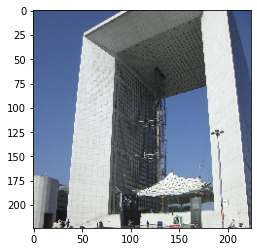

In [37]:
img, x = load_image(temp2[0])
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [77]:
import time
tic = time.process_time()

features = []
for i, image_path in enumerate(temp2):
    print("analyzing image {}".format(i))
    img, x = load_image(image_path);
    feat = model.predict(x)[0]
    features.append(feat)

analyzing image 0
analyzing image 1
analyzing image 2
analyzing image 3
analyzing image 4
analyzing image 5
analyzing image 6
analyzing image 7
analyzing image 8
analyzing image 9
analyzing image 10
analyzing image 11
analyzing image 12
analyzing image 13
analyzing image 14
analyzing image 15
analyzing image 16
analyzing image 17
analyzing image 18
analyzing image 19
analyzing image 20
analyzing image 21
analyzing image 22
analyzing image 23
analyzing image 24
analyzing image 25
analyzing image 26
analyzing image 27
analyzing image 28
analyzing image 29
analyzing image 30
analyzing image 31
analyzing image 32
analyzing image 33
analyzing image 34
analyzing image 35
analyzing image 36
analyzing image 37
analyzing image 38
analyzing image 39
analyzing image 40
analyzing image 41
analyzing image 42
analyzing image 43
analyzing image 44
analyzing image 45
analyzing image 46
analyzing image 47
analyzing image 48
analyzing image 49
analyzing image 50
analyzing image 51
analyzing image 52
ana

In [78]:
import numpy as np
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\InceptionF.npy',np.array(features))

In [39]:
len(features)
features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\InceptionF.npy')

In [40]:
from sklearn.decomposition import PCA
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [42]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [43]:
pca_features.shape

(6393, 300)

In [186]:
# import pickle
# filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\pcaInception_300'
# pickle.dump(pca, open(filename, 'wb'))
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\pcaInception_300.npy',np.array(pca_features))

Total time : 0.5383185999999114 seconds
Accuracy is 0.0


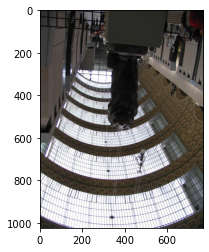

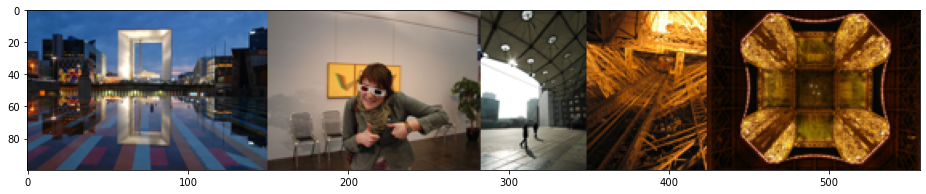

In [44]:
import random
# grab a random query image
query_image_idx = int(4000 * random.random())
class_q = findClass(query_image_idx)
class_r = list()
# let's display the image
img = image.load_img(temp2[query_image_idx])
start = time.perf_counter()
plt.imshow(img)
from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
thumbs = []
for idx in idx_closest:
    img = image.load_img(temp2[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
print('Total time : {} seconds'.format(end-start))    
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

defense
eiffel
general
invalides
louvre
moulinrouge
museedorsay
notredame
pantheon
pompidou
sacrecoeur
triomphe


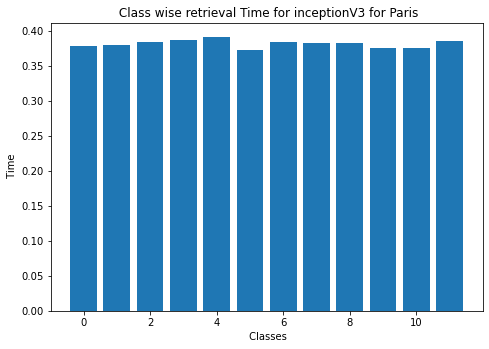

In [47]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(len(temp2)):
        if(temp2[i].split('\\')[-1].split('_')[1] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)
    
    
temp_ = list()
for i in class_acc:
    t =0
    a =0
    temp3 = list()
    if(len(i)==0):
        continue
    for index in range(4):
        name = i[index][0]
        t = t + i[index][1][0]
        a = a +i[index][1][1]
    temp3.append(name)
    temp3.append(t/5)
    temp3.append(a/5)
    temp_.append(temp3)
    
import pandas as pd
result_inceptionV3 = pd.DataFrame(temp_)
result_inceptionV3.columns = ['Class', 'Time', 'Accuracy']
result_inceptionV3


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = [23,17,35,29,12]
y = result_inceptionV3.Time.values
x= [i for i in range(12)]
ax.bar(x,y)
ax.set_xlabel(" Classes")
ax.set_ylabel(" Time")
plt.title(" Class wise retrieval Time for inceptionV3 for Paris")
plt.show()

In [189]:
pca_features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\pcaInception_300.npy')
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp2[idx])
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
#         print('Total time : {} seconds'.format(end-start))
#         print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on 1000 random samples on Inception_V3 (Paris) {}'.format(acc_avg/n_samples))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

0


  0%|                                                                                 | 1/1000 [00:00<07:42,  2.16it/s]

1


  0%|▏                                                                                | 2/1000 [00:00<07:43,  2.15it/s]

2


  0%|▏                                                                                | 3/1000 [00:01<07:47,  2.13it/s]

3


  0%|▎                                                                                | 4/1000 [00:01<07:46,  2.14it/s]

4


  0%|▍                                                                                | 5/1000 [00:02<07:50,  2.11it/s]

5


  1%|▍                                                                                | 6/1000 [00:02<07:46,  2.13it/s]

6


  1%|▌                                                                                | 7/1000 [00:03<07:45,  2.13it/s]

7


  1%|▋                                                                                | 8/1000 [00:03<07:44,  2.13it/s]

8


  1%|▋                                                                                | 9/1000 [00:04<07:49,  2.11it/s]

9


  1%|▊                                                                               | 10/1000 [00:04<07:51,  2.10it/s]

10


  1%|▉                                                                               | 11/1000 [00:05<07:47,  2.11it/s]

11


  1%|▉                                                                               | 12/1000 [00:05<07:43,  2.13it/s]

12


  1%|█                                                                               | 13/1000 [00:06<07:38,  2.15it/s]

13


  1%|█                                                                               | 14/1000 [00:06<07:41,  2.14it/s]

14


  2%|█▏                                                                              | 15/1000 [00:07<07:41,  2.13it/s]

15


  2%|█▎                                                                              | 16/1000 [00:07<07:41,  2.13it/s]

16


  2%|█▎                                                                              | 17/1000 [00:07<07:37,  2.15it/s]

17


  2%|█▍                                                                              | 18/1000 [00:08<07:32,  2.17it/s]

18


  2%|█▌                                                                              | 19/1000 [00:08<07:34,  2.16it/s]

19


  2%|█▌                                                                              | 20/1000 [00:09<07:30,  2.17it/s]

20


  2%|█▋                                                                              | 21/1000 [00:09<07:36,  2.14it/s]

21


  2%|█▊                                                                              | 22/1000 [00:10<07:37,  2.14it/s]

22


  2%|█▊                                                                              | 23/1000 [00:10<07:32,  2.16it/s]

23


  2%|█▉                                                                              | 24/1000 [00:11<07:47,  2.09it/s]

24


  2%|██                                                                              | 25/1000 [00:11<07:46,  2.09it/s]

25


  3%|██                                                                              | 26/1000 [00:12<07:45,  2.09it/s]

26


  3%|██▏                                                                             | 27/1000 [00:12<07:46,  2.09it/s]

27


  3%|██▏                                                                             | 28/1000 [00:13<07:46,  2.08it/s]

28


  3%|██▎                                                                             | 29/1000 [00:13<07:42,  2.10it/s]

29


  3%|██▍                                                                             | 30/1000 [00:14<07:43,  2.09it/s]

30


  3%|██▍                                                                             | 31/1000 [00:14<07:45,  2.08it/s]

31


  3%|██▌                                                                             | 32/1000 [00:15<07:42,  2.09it/s]

32


  3%|██▋                                                                             | 33/1000 [00:15<07:44,  2.08it/s]

33


  3%|██▋                                                                             | 34/1000 [00:16<07:45,  2.07it/s]

34


  4%|██▊                                                                             | 35/1000 [00:16<07:42,  2.09it/s]

35


  4%|██▉                                                                             | 36/1000 [00:17<07:37,  2.11it/s]

36


  4%|██▉                                                                             | 37/1000 [00:17<07:36,  2.11it/s]

37


  4%|███                                                                             | 38/1000 [00:17<07:38,  2.10it/s]

38


  4%|███                                                                             | 39/1000 [00:18<07:35,  2.11it/s]

39


  4%|███▏                                                                            | 40/1000 [00:18<07:33,  2.12it/s]

40


  4%|███▎                                                                            | 41/1000 [00:19<07:29,  2.14it/s]

41


  4%|███▎                                                                            | 42/1000 [00:19<07:22,  2.16it/s]

42


  4%|███▍                                                                            | 43/1000 [00:20<07:32,  2.11it/s]

43


  4%|███▌                                                                            | 44/1000 [00:20<07:22,  2.16it/s]

44


  4%|███▌                                                                            | 45/1000 [00:21<07:23,  2.15it/s]

45


  5%|███▋                                                                            | 46/1000 [00:21<07:28,  2.13it/s]

46


  5%|███▊                                                                            | 47/1000 [00:22<07:27,  2.13it/s]

47


  5%|███▊                                                                            | 48/1000 [00:22<07:31,  2.11it/s]

48


  5%|███▉                                                                            | 49/1000 [00:23<07:29,  2.12it/s]

49


  5%|████                                                                            | 50/1000 [00:23<07:32,  2.10it/s]

50


  5%|████                                                                            | 51/1000 [00:24<07:29,  2.11it/s]

51


  5%|████▏                                                                           | 52/1000 [00:24<07:23,  2.14it/s]

52


  5%|████▏                                                                           | 53/1000 [00:24<07:22,  2.14it/s]

53


  5%|████▎                                                                           | 54/1000 [00:25<07:22,  2.14it/s]

54


  6%|████▍                                                                           | 55/1000 [00:25<07:27,  2.11it/s]

55


  6%|████▍                                                                           | 56/1000 [00:26<07:25,  2.12it/s]

56


  6%|████▌                                                                           | 57/1000 [00:26<07:24,  2.12it/s]

57


  6%|████▋                                                                           | 58/1000 [00:27<07:18,  2.15it/s]

58


  6%|████▋                                                                           | 59/1000 [00:27<07:18,  2.15it/s]

59


  6%|████▊                                                                           | 60/1000 [00:28<07:19,  2.14it/s]

60


  6%|████▉                                                                           | 61/1000 [00:28<07:19,  2.14it/s]

61


  6%|████▉                                                                           | 62/1000 [00:29<07:18,  2.14it/s]

62


  6%|█████                                                                           | 63/1000 [00:29<07:16,  2.15it/s]

63


  6%|█████                                                                           | 64/1000 [00:30<07:18,  2.13it/s]

64


  6%|█████▏                                                                          | 65/1000 [00:30<07:18,  2.13it/s]

65


  7%|█████▎                                                                          | 66/1000 [00:31<07:18,  2.13it/s]

66


  7%|█████▎                                                                          | 67/1000 [00:31<07:16,  2.14it/s]

67


  7%|█████▍                                                                          | 68/1000 [00:32<07:21,  2.11it/s]

68


  7%|█████▌                                                                          | 69/1000 [00:32<07:19,  2.12it/s]

69


  7%|█████▌                                                                          | 70/1000 [00:32<07:22,  2.10it/s]

70


  7%|█████▋                                                                          | 71/1000 [00:33<07:24,  2.09it/s]

71


  7%|█████▊                                                                          | 72/1000 [00:33<07:17,  2.12it/s]

72


  7%|█████▊                                                                          | 73/1000 [00:34<07:20,  2.10it/s]

73


  7%|█████▉                                                                          | 74/1000 [00:34<07:22,  2.09it/s]

74


  8%|██████                                                                          | 75/1000 [00:35<07:19,  2.10it/s]

75


  8%|██████                                                                          | 76/1000 [00:35<07:25,  2.07it/s]

76


  8%|██████▏                                                                         | 77/1000 [00:36<07:21,  2.09it/s]

77


  8%|██████▏                                                                         | 78/1000 [00:36<07:18,  2.10it/s]

78


  8%|██████▎                                                                         | 79/1000 [00:37<07:15,  2.11it/s]

79


  8%|██████▍                                                                         | 80/1000 [00:37<07:18,  2.10it/s]

80


  8%|██████▍                                                                         | 81/1000 [00:38<07:16,  2.11it/s]

81


  8%|██████▌                                                                         | 82/1000 [00:38<07:13,  2.12it/s]

82


  8%|██████▋                                                                         | 83/1000 [00:39<07:25,  2.06it/s]

83


  8%|██████▋                                                                         | 84/1000 [00:39<07:24,  2.06it/s]

84


  8%|██████▊                                                                         | 85/1000 [00:40<07:23,  2.06it/s]

85


  9%|██████▉                                                                         | 86/1000 [00:40<07:18,  2.08it/s]

86


  9%|██████▉                                                                         | 87/1000 [00:41<07:15,  2.10it/s]

87


  9%|███████                                                                         | 88/1000 [00:41<07:12,  2.11it/s]

88


  9%|███████                                                                         | 89/1000 [00:42<07:15,  2.09it/s]

89


  9%|███████▏                                                                        | 90/1000 [00:42<07:14,  2.09it/s]

90


  9%|███████▎                                                                        | 91/1000 [00:43<07:09,  2.12it/s]

91


  9%|███████▎                                                                        | 92/1000 [00:43<07:11,  2.10it/s]

92


  9%|███████▍                                                                        | 93/1000 [00:43<07:07,  2.12it/s]

93


  9%|███████▌                                                                        | 94/1000 [00:44<07:04,  2.14it/s]

94


 10%|███████▌                                                                        | 95/1000 [00:44<06:59,  2.16it/s]

95


 10%|███████▋                                                                        | 96/1000 [00:45<07:04,  2.13it/s]

96


 10%|███████▊                                                                        | 97/1000 [00:45<06:59,  2.15it/s]

97


 10%|███████▊                                                                        | 98/1000 [00:46<07:00,  2.15it/s]

98


 10%|███████▉                                                                        | 99/1000 [00:46<06:59,  2.15it/s]

99


 10%|███████▉                                                                       | 100/1000 [00:47<07:05,  2.12it/s]

100


 10%|███████▉                                                                       | 101/1000 [00:47<07:07,  2.10it/s]

101


 10%|████████                                                                       | 102/1000 [00:48<07:05,  2.11it/s]

102


 10%|████████▏                                                                      | 103/1000 [00:48<07:09,  2.09it/s]

103


 10%|████████▏                                                                      | 104/1000 [00:49<07:08,  2.09it/s]

104


 10%|████████▎                                                                      | 105/1000 [00:49<07:13,  2.06it/s]

105


 11%|████████▎                                                                      | 106/1000 [00:50<07:09,  2.08it/s]

106


 11%|████████▍                                                                      | 107/1000 [00:50<07:05,  2.10it/s]

107


 11%|████████▌                                                                      | 108/1000 [00:51<06:59,  2.13it/s]

108


 11%|████████▌                                                                      | 109/1000 [00:51<06:58,  2.13it/s]

109


 11%|████████▋                                                                      | 110/1000 [00:51<06:58,  2.13it/s]

110


 11%|████████▊                                                                      | 111/1000 [00:52<06:56,  2.13it/s]

111


 11%|████████▊                                                                      | 112/1000 [00:52<06:56,  2.13it/s]

112


 11%|████████▉                                                                      | 113/1000 [00:53<06:51,  2.15it/s]

113


 11%|█████████                                                                      | 114/1000 [00:53<06:56,  2.13it/s]

114


 12%|█████████                                                                      | 115/1000 [00:54<06:56,  2.12it/s]

115


 12%|█████████▏                                                                     | 116/1000 [00:54<06:56,  2.12it/s]

116


 12%|█████████▏                                                                     | 117/1000 [00:55<06:57,  2.11it/s]

117


 12%|█████████▎                                                                     | 118/1000 [00:55<06:54,  2.13it/s]

118


 12%|█████████▍                                                                     | 119/1000 [00:56<06:51,  2.14it/s]

119


 12%|█████████▍                                                                     | 120/1000 [00:56<06:51,  2.14it/s]

120


 12%|█████████▌                                                                     | 121/1000 [00:57<06:51,  2.14it/s]

121


 12%|█████████▋                                                                     | 122/1000 [00:57<06:46,  2.16it/s]

122


 12%|█████████▋                                                                     | 123/1000 [00:58<06:51,  2.13it/s]

123


 12%|█████████▊                                                                     | 124/1000 [00:58<06:55,  2.11it/s]

124


 12%|█████████▉                                                                     | 125/1000 [00:59<06:53,  2.11it/s]

125


 13%|█████████▉                                                                     | 126/1000 [00:59<06:52,  2.12it/s]

126


 13%|██████████                                                                     | 127/1000 [00:59<06:50,  2.13it/s]

127


 13%|██████████                                                                     | 128/1000 [01:00<06:54,  2.10it/s]

128


 13%|██████████▏                                                                    | 129/1000 [01:00<06:47,  2.14it/s]

129


 13%|██████████▎                                                                    | 130/1000 [01:01<06:55,  2.10it/s]

130


 13%|██████████▎                                                                    | 131/1000 [01:01<06:52,  2.10it/s]

131


 13%|██████████▍                                                                    | 132/1000 [01:02<06:50,  2.11it/s]

132


 13%|██████████▌                                                                    | 133/1000 [01:02<06:48,  2.12it/s]

133


 13%|██████████▌                                                                    | 134/1000 [01:03<06:55,  2.08it/s]

134


 14%|██████████▋                                                                    | 135/1000 [01:03<06:56,  2.08it/s]

135


 14%|██████████▋                                                                    | 136/1000 [01:04<06:52,  2.09it/s]

136


 14%|██████████▊                                                                    | 137/1000 [01:04<06:52,  2.09it/s]

137


 14%|██████████▉                                                                    | 138/1000 [01:05<06:46,  2.12it/s]

138


 14%|██████████▉                                                                    | 139/1000 [01:05<06:41,  2.14it/s]

139


 14%|███████████                                                                    | 140/1000 [01:06<06:45,  2.12it/s]

140


 14%|███████████▏                                                                   | 141/1000 [01:06<06:44,  2.12it/s]

141


 14%|███████████▏                                                                   | 142/1000 [01:07<06:40,  2.14it/s]

142


 14%|███████████▎                                                                   | 143/1000 [01:07<06:44,  2.12it/s]

143


 14%|███████████▍                                                                   | 144/1000 [01:07<06:40,  2.14it/s]

144


 14%|███████████▍                                                                   | 145/1000 [01:08<06:40,  2.13it/s]

145


 15%|███████████▌                                                                   | 146/1000 [01:08<06:44,  2.11it/s]

146


 15%|███████████▌                                                                   | 147/1000 [01:09<06:39,  2.14it/s]

147


 15%|███████████▋                                                                   | 148/1000 [01:09<06:39,  2.13it/s]

148


 15%|███████████▊                                                                   | 149/1000 [01:10<06:35,  2.15it/s]

149


 15%|███████████▊                                                                   | 150/1000 [01:10<06:36,  2.15it/s]

150


 15%|███████████▉                                                                   | 151/1000 [01:11<06:40,  2.12it/s]

151


 15%|████████████                                                                   | 152/1000 [01:11<06:35,  2.14it/s]

152


 15%|████████████                                                                   | 153/1000 [01:12<06:36,  2.14it/s]

153


 15%|████████████▏                                                                  | 154/1000 [01:12<06:36,  2.13it/s]

154


 16%|████████████▏                                                                  | 155/1000 [01:13<06:35,  2.14it/s]

155


 16%|████████████▎                                                                  | 156/1000 [01:13<06:32,  2.15it/s]

156


 16%|████████████▍                                                                  | 157/1000 [01:14<06:29,  2.16it/s]

157


 16%|████████████▍                                                                  | 158/1000 [01:14<06:27,  2.18it/s]

158


 16%|████████████▌                                                                  | 159/1000 [01:14<06:29,  2.16it/s]

159


 16%|████████████▋                                                                  | 160/1000 [01:15<06:30,  2.15it/s]

160


 16%|████████████▋                                                                  | 161/1000 [01:15<06:31,  2.14it/s]

161


 16%|████████████▊                                                                  | 162/1000 [01:16<06:32,  2.14it/s]

162


 16%|████████████▉                                                                  | 163/1000 [01:16<06:36,  2.11it/s]

163


 16%|████████████▉                                                                  | 164/1000 [01:17<06:34,  2.12it/s]

164


 16%|█████████████                                                                  | 165/1000 [01:17<06:29,  2.14it/s]

165


 17%|█████████████                                                                  | 166/1000 [01:18<06:29,  2.14it/s]

166


 17%|█████████████▏                                                                 | 167/1000 [01:18<06:26,  2.16it/s]

167


 17%|█████████████▎                                                                 | 168/1000 [01:19<06:27,  2.15it/s]

168


 17%|█████████████▎                                                                 | 169/1000 [01:19<06:35,  2.10it/s]

169


 17%|█████████████▍                                                                 | 170/1000 [01:20<06:41,  2.07it/s]

170


 17%|█████████████▌                                                                 | 171/1000 [01:20<06:45,  2.05it/s]

171


 17%|█████████████▌                                                                 | 172/1000 [01:21<06:40,  2.07it/s]

172


 17%|█████████████▋                                                                 | 173/1000 [01:21<06:32,  2.11it/s]

173


 17%|█████████████▋                                                                 | 174/1000 [01:22<06:31,  2.11it/s]

174


 18%|█████████████▊                                                                 | 175/1000 [01:22<06:26,  2.14it/s]

175


 18%|█████████████▉                                                                 | 176/1000 [01:23<06:30,  2.11it/s]

176


 18%|█████████████▉                                                                 | 177/1000 [01:23<06:29,  2.11it/s]

177


 18%|██████████████                                                                 | 178/1000 [01:23<06:27,  2.12it/s]

178


 18%|██████████████▏                                                                | 179/1000 [01:24<06:23,  2.14it/s]

179


 18%|██████████████▏                                                                | 180/1000 [01:24<06:23,  2.14it/s]

180


 18%|██████████████▎                                                                | 181/1000 [01:25<06:23,  2.13it/s]

181


 18%|██████████████▍                                                                | 182/1000 [01:25<06:23,  2.13it/s]

182


 18%|██████████████▍                                                                | 183/1000 [01:26<06:19,  2.15it/s]

183


 18%|██████████████▌                                                                | 184/1000 [01:26<06:24,  2.12it/s]

184


 18%|██████████████▌                                                                | 185/1000 [01:27<06:23,  2.12it/s]

185


 19%|██████████████▋                                                                | 186/1000 [01:27<06:23,  2.12it/s]

186


 19%|██████████████▊                                                                | 187/1000 [01:28<06:22,  2.12it/s]

187


 19%|██████████████▊                                                                | 188/1000 [01:28<06:18,  2.15it/s]

188


 19%|██████████████▉                                                                | 189/1000 [01:29<06:14,  2.16it/s]

189


 19%|███████████████                                                                | 190/1000 [01:29<06:24,  2.11it/s]

190


 19%|███████████████                                                                | 191/1000 [01:30<06:23,  2.11it/s]

191


 19%|███████████████▏                                                               | 192/1000 [01:30<06:18,  2.13it/s]

192


 19%|███████████████▏                                                               | 193/1000 [01:31<06:26,  2.09it/s]

193


 19%|███████████████▎                                                               | 194/1000 [01:31<06:22,  2.10it/s]

194


 20%|███████████████▍                                                               | 195/1000 [01:31<06:19,  2.12it/s]

195


 20%|███████████████▍                                                               | 196/1000 [01:32<06:14,  2.14it/s]

196


 20%|███████████████▌                                                               | 197/1000 [01:32<06:11,  2.16it/s]

197


 20%|███████████████▋                                                               | 198/1000 [01:33<06:13,  2.15it/s]

198


 20%|███████████████▋                                                               | 199/1000 [01:33<06:09,  2.17it/s]

199


 20%|███████████████▊                                                               | 200/1000 [01:34<06:11,  2.15it/s]

200


 20%|███████████████▉                                                               | 201/1000 [01:34<06:12,  2.15it/s]

201


 20%|███████████████▉                                                               | 202/1000 [01:35<06:09,  2.16it/s]

202


 20%|████████████████                                                               | 203/1000 [01:35<06:14,  2.13it/s]

203


 20%|████████████████                                                               | 204/1000 [01:36<06:10,  2.15it/s]

204


 20%|████████████████▏                                                              | 205/1000 [01:36<06:11,  2.14it/s]

205


 21%|████████████████▎                                                              | 206/1000 [01:37<06:07,  2.16it/s]

206


 21%|████████████████▎                                                              | 207/1000 [01:37<06:09,  2.15it/s]

207


 21%|████████████████▍                                                              | 208/1000 [01:38<06:10,  2.14it/s]

208


 21%|████████████████▌                                                              | 209/1000 [01:38<06:14,  2.11it/s]

209


 21%|████████████████▌                                                              | 210/1000 [01:38<06:12,  2.12it/s]

210


 21%|████████████████▋                                                              | 211/1000 [01:39<06:19,  2.08it/s]

211


 21%|████████████████▋                                                              | 212/1000 [01:39<06:16,  2.09it/s]

212


 21%|████████████████▊                                                              | 213/1000 [01:40<06:14,  2.10it/s]

213


 21%|████████████████▉                                                              | 214/1000 [01:40<06:12,  2.11it/s]

214


 22%|████████████████▉                                                              | 215/1000 [01:41<06:08,  2.13it/s]

215


 22%|█████████████████                                                              | 216/1000 [01:41<06:07,  2.13it/s]

216


 22%|█████████████████▏                                                             | 217/1000 [01:42<06:11,  2.11it/s]

217


 22%|█████████████████▏                                                             | 218/1000 [01:42<06:06,  2.13it/s]

218


 22%|█████████████████▎                                                             | 219/1000 [01:43<06:02,  2.15it/s]

219


 22%|█████████████████▍                                                             | 220/1000 [01:43<06:03,  2.15it/s]

220


 22%|█████████████████▍                                                             | 221/1000 [01:44<06:03,  2.14it/s]

221


 22%|█████████████████▌                                                             | 222/1000 [01:44<06:03,  2.14it/s]

222


 22%|█████████████████▌                                                             | 223/1000 [01:45<06:00,  2.15it/s]

223


 22%|█████████████████▋                                                             | 224/1000 [01:45<06:05,  2.13it/s]

224


 22%|█████████████████▊                                                             | 225/1000 [01:46<06:04,  2.13it/s]

225


 23%|█████████████████▊                                                             | 226/1000 [01:46<06:04,  2.13it/s]

226


 23%|█████████████████▉                                                             | 227/1000 [01:46<06:07,  2.10it/s]

227


 23%|██████████████████                                                             | 228/1000 [01:47<06:02,  2.13it/s]

228


 23%|██████████████████                                                             | 229/1000 [01:47<06:05,  2.11it/s]

229


 23%|██████████████████▏                                                            | 230/1000 [01:48<06:07,  2.09it/s]

230


 23%|██████████████████▏                                                            | 231/1000 [01:48<06:12,  2.06it/s]

231


 23%|██████████████████▎                                                            | 232/1000 [01:49<06:09,  2.08it/s]

232


 23%|██████████████████▍                                                            | 233/1000 [01:49<06:06,  2.09it/s]

233


 23%|██████████████████▍                                                            | 234/1000 [01:50<06:01,  2.12it/s]

234


 24%|██████████████████▌                                                            | 235/1000 [01:50<06:00,  2.12it/s]

235


 24%|██████████████████▋                                                            | 236/1000 [01:51<06:03,  2.10it/s]

236


 24%|██████████████████▋                                                            | 237/1000 [01:51<06:01,  2.11it/s]

237


 24%|██████████████████▊                                                            | 238/1000 [01:52<05:57,  2.13it/s]

238


 24%|██████████████████▉                                                            | 239/1000 [01:52<06:00,  2.11it/s]

239


 24%|██████████████████▉                                                            | 240/1000 [01:53<06:02,  2.09it/s]

240


 24%|███████████████████                                                            | 241/1000 [01:53<05:57,  2.12it/s]

241


 24%|███████████████████                                                            | 242/1000 [01:54<05:56,  2.12it/s]

242


 24%|███████████████████▏                                                           | 243/1000 [01:54<05:59,  2.10it/s]

243


 24%|███████████████████▎                                                           | 244/1000 [01:55<05:54,  2.13it/s]

244


 24%|███████████████████▎                                                           | 245/1000 [01:55<05:54,  2.13it/s]

245


 25%|███████████████████▍                                                           | 246/1000 [01:55<05:50,  2.15it/s]

246


 25%|███████████████████▌                                                           | 247/1000 [01:56<05:54,  2.12it/s]

247


 25%|███████████████████▌                                                           | 248/1000 [01:56<05:54,  2.12it/s]

248


 25%|███████████████████▋                                                           | 249/1000 [01:57<05:53,  2.13it/s]

249


 25%|███████████████████▊                                                           | 250/1000 [01:57<05:52,  2.13it/s]

250


 25%|███████████████████▊                                                           | 251/1000 [01:58<05:55,  2.10it/s]

251


 25%|███████████████████▉                                                           | 252/1000 [01:58<05:54,  2.11it/s]

252


 25%|███████████████████▉                                                           | 253/1000 [01:59<05:56,  2.10it/s]

253


 25%|████████████████████                                                           | 254/1000 [01:59<05:57,  2.08it/s]

254


 26%|████████████████████▏                                                          | 255/1000 [02:00<05:55,  2.10it/s]

255


 26%|████████████████████▏                                                          | 256/1000 [02:00<05:49,  2.13it/s]

256


 26%|████████████████████▎                                                          | 257/1000 [02:01<05:49,  2.13it/s]

257


 26%|████████████████████▍                                                          | 258/1000 [02:01<05:45,  2.15it/s]

258


 26%|████████████████████▍                                                          | 259/1000 [02:02<05:46,  2.14it/s]

259


 26%|████████████████████▌                                                          | 260/1000 [02:02<05:42,  2.16it/s]

260


 26%|████████████████████▌                                                          | 261/1000 [02:03<05:43,  2.15it/s]

261


 26%|████████████████████▋                                                          | 262/1000 [02:03<05:51,  2.10it/s]

262


 26%|████████████████████▊                                                          | 263/1000 [02:04<05:52,  2.09it/s]

263


 26%|████████████████████▊                                                          | 264/1000 [02:04<05:57,  2.06it/s]

264


 26%|████████████████████▉                                                          | 265/1000 [02:04<05:53,  2.08it/s]

265


 27%|█████████████████████                                                          | 266/1000 [02:05<05:49,  2.10it/s]

266


 27%|█████████████████████                                                          | 267/1000 [02:05<05:47,  2.11it/s]

267


 27%|█████████████████████▏                                                         | 268/1000 [02:06<05:50,  2.09it/s]

268


 27%|█████████████████████▎                                                         | 269/1000 [02:06<05:51,  2.08it/s]

269


 27%|█████████████████████▎                                                         | 270/1000 [02:07<05:51,  2.08it/s]

270


 27%|█████████████████████▍                                                         | 271/1000 [02:07<05:50,  2.08it/s]

271


 27%|█████████████████████▍                                                         | 272/1000 [02:08<05:52,  2.06it/s]

272


 27%|█████████████████████▌                                                         | 273/1000 [02:08<05:52,  2.06it/s]

273


 27%|█████████████████████▋                                                         | 274/1000 [02:09<05:49,  2.08it/s]

274


 28%|█████████████████████▋                                                         | 275/1000 [02:09<05:49,  2.07it/s]

275


 28%|█████████████████████▊                                                         | 276/1000 [02:10<05:46,  2.09it/s]

276


 28%|█████████████████████▉                                                         | 277/1000 [02:10<05:47,  2.08it/s]

277


 28%|█████████████████████▉                                                         | 278/1000 [02:11<05:47,  2.08it/s]

278


 28%|██████████████████████                                                         | 279/1000 [02:11<05:47,  2.07it/s]

279


 28%|██████████████████████                                                         | 280/1000 [02:12<05:44,  2.09it/s]

280


 28%|██████████████████████▏                                                        | 281/1000 [02:12<05:45,  2.08it/s]

281


 28%|██████████████████████▎                                                        | 282/1000 [02:13<05:52,  2.03it/s]

282


 28%|██████████████████████▎                                                        | 283/1000 [02:13<05:51,  2.04it/s]

283


 28%|██████████████████████▍                                                        | 284/1000 [02:14<05:53,  2.03it/s]

284


 28%|██████████████████████▌                                                        | 285/1000 [02:14<05:47,  2.06it/s]

285


 29%|██████████████████████▌                                                        | 286/1000 [02:15<05:43,  2.08it/s]

286


 29%|██████████████████████▋                                                        | 287/1000 [02:15<05:44,  2.07it/s]

287


 29%|██████████████████████▊                                                        | 288/1000 [02:16<05:44,  2.07it/s]

288


 29%|██████████████████████▊                                                        | 289/1000 [02:16<05:41,  2.08it/s]

289


 29%|██████████████████████▉                                                        | 290/1000 [02:17<05:38,  2.10it/s]

290


 29%|██████████████████████▉                                                        | 291/1000 [02:17<05:33,  2.13it/s]

291


 29%|███████████████████████                                                        | 292/1000 [02:17<05:36,  2.10it/s]

292


 29%|███████████████████████▏                                                       | 293/1000 [02:18<05:38,  2.09it/s]

293


 29%|███████████████████████▏                                                       | 294/1000 [02:18<05:36,  2.10it/s]

294


 30%|███████████████████████▎                                                       | 295/1000 [02:19<05:37,  2.09it/s]

295


 30%|███████████████████████▍                                                       | 296/1000 [02:19<05:36,  2.09it/s]

296


 30%|███████████████████████▍                                                       | 297/1000 [02:20<05:33,  2.11it/s]

297


 30%|███████████████████████▌                                                       | 298/1000 [02:20<05:28,  2.14it/s]

298


 30%|███████████████████████▌                                                       | 299/1000 [02:21<05:28,  2.13it/s]

299


 30%|███████████████████████▋                                                       | 300/1000 [02:21<05:25,  2.15it/s]

300


 30%|███████████████████████▊                                                       | 301/1000 [02:22<05:25,  2.15it/s]

301


 30%|███████████████████████▊                                                       | 302/1000 [02:22<05:26,  2.14it/s]

302


 30%|███████████████████████▉                                                       | 303/1000 [02:23<05:26,  2.14it/s]

303


 30%|████████████████████████                                                       | 304/1000 [02:23<05:25,  2.14it/s]

304


 30%|████████████████████████                                                       | 305/1000 [02:24<05:32,  2.09it/s]

305


 31%|████████████████████████▏                                                      | 306/1000 [02:24<05:27,  2.12it/s]

306


 31%|████████████████████████▎                                                      | 307/1000 [02:25<05:27,  2.12it/s]

307


 31%|████████████████████████▎                                                      | 308/1000 [02:25<05:26,  2.12it/s]

308


 31%|████████████████████████▍                                                      | 309/1000 [02:26<05:29,  2.09it/s]

309


 31%|████████████████████████▍                                                      | 310/1000 [02:26<05:27,  2.11it/s]

310


 31%|████████████████████████▌                                                      | 311/1000 [02:26<05:23,  2.13it/s]

311


 31%|████████████████████████▋                                                      | 312/1000 [02:27<05:23,  2.13it/s]

312


 31%|████████████████████████▋                                                      | 313/1000 [02:27<05:20,  2.14it/s]

313


 31%|████████████████████████▊                                                      | 314/1000 [02:28<05:23,  2.12it/s]

314


 32%|████████████████████████▉                                                      | 315/1000 [02:28<05:19,  2.14it/s]

315


 32%|████████████████████████▉                                                      | 316/1000 [02:29<05:32,  2.06it/s]

316


 32%|█████████████████████████                                                      | 317/1000 [02:29<05:28,  2.08it/s]

317


 32%|█████████████████████████                                                      | 318/1000 [02:30<05:25,  2.09it/s]

318


 32%|█████████████████████████▏                                                     | 319/1000 [02:30<05:27,  2.08it/s]

319


 32%|█████████████████████████▎                                                     | 320/1000 [02:31<05:22,  2.11it/s]

320


 32%|█████████████████████████▎                                                     | 321/1000 [02:31<05:27,  2.07it/s]

321


 32%|█████████████████████████▍                                                     | 322/1000 [02:32<05:27,  2.07it/s]

322


 32%|█████████████████████████▌                                                     | 323/1000 [02:32<05:24,  2.09it/s]

323


 32%|█████████████████████████▌                                                     | 324/1000 [02:33<05:19,  2.12it/s]

324


 32%|█████████████████████████▋                                                     | 325/1000 [02:33<05:14,  2.14it/s]

325


 33%|█████████████████████████▊                                                     | 326/1000 [02:34<05:15,  2.14it/s]

326


 33%|█████████████████████████▊                                                     | 327/1000 [02:34<05:21,  2.09it/s]

327


 33%|█████████████████████████▉                                                     | 328/1000 [02:35<05:19,  2.10it/s]

328


 33%|█████████████████████████▉                                                     | 329/1000 [02:35<05:18,  2.11it/s]

329


 33%|██████████████████████████                                                     | 330/1000 [02:35<05:19,  2.09it/s]

330


 33%|██████████████████████████▏                                                    | 331/1000 [02:36<05:18,  2.10it/s]

331


 33%|██████████████████████████▏                                                    | 332/1000 [02:36<05:15,  2.12it/s]

332


 33%|██████████████████████████▎                                                    | 333/1000 [02:37<05:13,  2.13it/s]

333


 33%|██████████████████████████▍                                                    | 334/1000 [02:37<05:15,  2.11it/s]

334


 34%|██████████████████████████▍                                                    | 335/1000 [02:38<05:15,  2.11it/s]

335


 34%|██████████████████████████▌                                                    | 336/1000 [02:38<05:10,  2.14it/s]

336


 34%|██████████████████████████▌                                                    | 337/1000 [02:39<05:10,  2.13it/s]

337


 34%|██████████████████████████▋                                                    | 338/1000 [02:39<05:11,  2.13it/s]

338


 34%|██████████████████████████▊                                                    | 339/1000 [02:40<05:10,  2.13it/s]

339


 34%|██████████████████████████▊                                                    | 340/1000 [02:40<05:07,  2.15it/s]

340


 34%|██████████████████████████▉                                                    | 341/1000 [02:41<05:07,  2.14it/s]

341


 34%|███████████████████████████                                                    | 342/1000 [02:41<05:07,  2.14it/s]

342


 34%|███████████████████████████                                                    | 343/1000 [02:42<05:10,  2.11it/s]

343


 34%|███████████████████████████▏                                                   | 344/1000 [02:42<05:06,  2.14it/s]

344


 34%|███████████████████████████▎                                                   | 345/1000 [02:43<05:09,  2.11it/s]

345


 35%|███████████████████████████▎                                                   | 346/1000 [02:43<05:07,  2.13it/s]

346


 35%|███████████████████████████▍                                                   | 347/1000 [02:43<05:07,  2.12it/s]

347


 35%|███████████████████████████▍                                                   | 348/1000 [02:44<05:10,  2.10it/s]

348


 35%|███████████████████████████▌                                                   | 349/1000 [02:44<05:08,  2.11it/s]

349


 35%|███████████████████████████▋                                                   | 350/1000 [02:45<05:07,  2.11it/s]

350


 35%|███████████████████████████▋                                                   | 351/1000 [02:45<05:09,  2.10it/s]

351


 35%|███████████████████████████▊                                                   | 352/1000 [02:46<05:10,  2.09it/s]

352


 35%|███████████████████████████▉                                                   | 353/1000 [02:46<05:11,  2.07it/s]

353


 35%|███████████████████████████▉                                                   | 354/1000 [02:47<05:08,  2.09it/s]

354


 36%|████████████████████████████                                                   | 355/1000 [02:47<05:06,  2.10it/s]

355


 36%|████████████████████████████                                                   | 356/1000 [02:48<05:05,  2.11it/s]

356


 36%|████████████████████████████▏                                                  | 357/1000 [02:48<05:04,  2.11it/s]

357


 36%|████████████████████████████▎                                                  | 358/1000 [02:49<05:03,  2.12it/s]

358


 36%|████████████████████████████▎                                                  | 359/1000 [02:49<05:02,  2.12it/s]

359


 36%|████████████████████████████▍                                                  | 360/1000 [02:50<05:07,  2.08it/s]

360


 36%|████████████████████████████▌                                                  | 361/1000 [02:50<05:04,  2.10it/s]

361


 36%|████████████████████████████▌                                                  | 362/1000 [02:51<05:00,  2.12it/s]

362


 36%|████████████████████████████▋                                                  | 363/1000 [02:51<05:02,  2.11it/s]

363


 36%|████████████████████████████▊                                                  | 364/1000 [02:52<05:00,  2.11it/s]

364


 36%|████████████████████████████▊                                                  | 365/1000 [02:52<04:59,  2.12it/s]

365


 37%|████████████████████████████▉                                                  | 366/1000 [02:52<04:56,  2.14it/s]

366


 37%|████████████████████████████▉                                                  | 367/1000 [02:53<04:56,  2.14it/s]

367


 37%|█████████████████████████████                                                  | 368/1000 [02:53<04:53,  2.15it/s]

368


 37%|█████████████████████████████▏                                                 | 369/1000 [02:54<05:00,  2.10it/s]

369


 37%|█████████████████████████████▏                                                 | 370/1000 [02:54<04:58,  2.11it/s]

370


 37%|█████████████████████████████▎                                                 | 371/1000 [02:55<05:00,  2.09it/s]

371


 37%|█████████████████████████████▍                                                 | 372/1000 [02:55<04:55,  2.13it/s]

372


 37%|█████████████████████████████▍                                                 | 373/1000 [02:56<04:57,  2.11it/s]

373


 37%|█████████████████████████████▌                                                 | 374/1000 [02:56<04:56,  2.11it/s]

374


 38%|█████████████████████████████▋                                                 | 375/1000 [02:57<05:01,  2.08it/s]

375


 38%|█████████████████████████████▋                                                 | 376/1000 [02:57<05:01,  2.07it/s]

376


 38%|█████████████████████████████▊                                                 | 377/1000 [02:58<05:01,  2.07it/s]

377


 38%|█████████████████████████████▊                                                 | 378/1000 [02:58<05:04,  2.05it/s]

378


 38%|█████████████████████████████▉                                                 | 379/1000 [02:59<04:57,  2.09it/s]

379


 38%|██████████████████████████████                                                 | 380/1000 [02:59<04:55,  2.10it/s]

380


 38%|██████████████████████████████                                                 | 381/1000 [03:00<04:56,  2.09it/s]

381


 38%|██████████████████████████████▏                                                | 382/1000 [03:00<04:57,  2.08it/s]

382


 38%|██████████████████████████████▎                                                | 383/1000 [03:01<04:59,  2.06it/s]

383


 38%|██████████████████████████████▎                                                | 384/1000 [03:01<04:52,  2.10it/s]

384


 38%|██████████████████████████████▍                                                | 385/1000 [03:02<04:54,  2.09it/s]

385


 39%|██████████████████████████████▍                                                | 386/1000 [03:02<04:49,  2.12it/s]

386


 39%|██████████████████████████████▌                                                | 387/1000 [03:03<04:48,  2.12it/s]

387


 39%|██████████████████████████████▋                                                | 388/1000 [03:03<04:46,  2.14it/s]

388


 39%|██████████████████████████████▋                                                | 389/1000 [03:03<04:43,  2.16it/s]

389


 39%|██████████████████████████████▊                                                | 390/1000 [03:04<04:46,  2.13it/s]

390


 39%|██████████████████████████████▉                                                | 391/1000 [03:04<04:46,  2.13it/s]

391


 39%|██████████████████████████████▉                                                | 392/1000 [03:05<04:48,  2.11it/s]

392


 39%|███████████████████████████████                                                | 393/1000 [03:05<04:47,  2.11it/s]

393


 39%|███████████████████████████████▏                                               | 394/1000 [03:06<04:49,  2.09it/s]

394


 40%|███████████████████████████████▏                                               | 395/1000 [03:06<04:50,  2.08it/s]

395


 40%|███████████████████████████████▎                                               | 396/1000 [03:07<04:48,  2.10it/s]

396


 40%|███████████████████████████████▎                                               | 397/1000 [03:07<04:46,  2.11it/s]

397


 40%|███████████████████████████████▍                                               | 398/1000 [03:08<04:53,  2.05it/s]

398


 40%|███████████████████████████████▌                                               | 399/1000 [03:08<04:49,  2.07it/s]

399


 40%|███████████████████████████████▌                                               | 400/1000 [03:09<04:47,  2.09it/s]

400


 40%|███████████████████████████████▋                                               | 401/1000 [03:09<04:45,  2.10it/s]

401


 40%|███████████████████████████████▊                                               | 402/1000 [03:10<04:44,  2.10it/s]

402


 40%|███████████████████████████████▊                                               | 403/1000 [03:10<04:40,  2.13it/s]

403


 40%|███████████████████████████████▉                                               | 404/1000 [03:11<04:42,  2.11it/s]

404


 40%|███████████████████████████████▉                                               | 405/1000 [03:11<04:41,  2.11it/s]

405


 41%|████████████████████████████████                                               | 406/1000 [03:12<04:46,  2.07it/s]

406


 41%|████████████████████████████████▏                                              | 407/1000 [03:12<04:46,  2.07it/s]

407


 41%|████████████████████████████████▏                                              | 408/1000 [03:13<04:49,  2.05it/s]

408


 41%|████████████████████████████████▎                                              | 409/1000 [03:13<04:48,  2.05it/s]

409


 41%|████████████████████████████████▍                                              | 410/1000 [03:13<04:44,  2.07it/s]

410


 41%|████████████████████████████████▍                                              | 411/1000 [03:14<04:43,  2.08it/s]

411


 41%|████████████████████████████████▌                                              | 412/1000 [03:14<04:41,  2.09it/s]

412


 41%|████████████████████████████████▋                                              | 413/1000 [03:15<04:39,  2.10it/s]

413


 41%|████████████████████████████████▋                                              | 414/1000 [03:15<04:36,  2.12it/s]

414


 42%|████████████████████████████████▊                                              | 415/1000 [03:16<04:38,  2.10it/s]

415


 42%|████████████████████████████████▊                                              | 416/1000 [03:16<04:34,  2.13it/s]

416


 42%|████████████████████████████████▉                                              | 417/1000 [03:17<04:33,  2.13it/s]

417


 42%|█████████████████████████████████                                              | 418/1000 [03:17<04:33,  2.13it/s]

418


 42%|█████████████████████████████████                                              | 419/1000 [03:18<04:32,  2.13it/s]

419


 42%|█████████████████████████████████▏                                             | 420/1000 [03:18<04:37,  2.09it/s]

420


 42%|█████████████████████████████████▎                                             | 421/1000 [03:19<04:41,  2.06it/s]

421


 42%|█████████████████████████████████▎                                             | 422/1000 [03:19<04:40,  2.06it/s]

422


 42%|█████████████████████████████████▍                                             | 423/1000 [03:20<04:40,  2.06it/s]

423


 42%|█████████████████████████████████▍                                             | 424/1000 [03:20<04:39,  2.06it/s]

424


 42%|█████████████████████████████████▌                                             | 425/1000 [03:21<04:36,  2.08it/s]

425


 43%|█████████████████████████████████▋                                             | 426/1000 [03:21<04:34,  2.09it/s]

426


 43%|█████████████████████████████████▋                                             | 427/1000 [03:22<04:32,  2.10it/s]

427


 43%|█████████████████████████████████▊                                             | 428/1000 [03:22<04:33,  2.09it/s]

428


 43%|█████████████████████████████████▉                                             | 429/1000 [03:23<04:34,  2.08it/s]

429


 43%|█████████████████████████████████▉                                             | 430/1000 [03:23<04:32,  2.09it/s]

430


 43%|██████████████████████████████████                                             | 431/1000 [03:24<04:30,  2.10it/s]

431


 43%|██████████████████████████████████▏                                            | 432/1000 [03:24<04:29,  2.11it/s]

432


 43%|██████████████████████████████████▏                                            | 433/1000 [03:24<04:28,  2.11it/s]

433


 43%|██████████████████████████████████▎                                            | 434/1000 [03:25<04:25,  2.14it/s]

434


 44%|██████████████████████████████████▎                                            | 435/1000 [03:25<04:27,  2.11it/s]

435


 44%|██████████████████████████████████▍                                            | 436/1000 [03:26<04:26,  2.12it/s]

436


 44%|██████████████████████████████████▌                                            | 437/1000 [03:26<04:25,  2.12it/s]

437


 44%|██████████████████████████████████▌                                            | 438/1000 [03:27<04:24,  2.12it/s]

438


 44%|██████████████████████████████████▋                                            | 439/1000 [03:27<04:24,  2.12it/s]

439


 44%|██████████████████████████████████▊                                            | 440/1000 [03:28<04:23,  2.12it/s]

440


 44%|██████████████████████████████████▊                                            | 441/1000 [03:28<04:25,  2.11it/s]

441


 44%|██████████████████████████████████▉                                            | 442/1000 [03:29<04:24,  2.11it/s]

442


 44%|██████████████████████████████████▉                                            | 443/1000 [03:29<04:23,  2.12it/s]

443


 44%|███████████████████████████████████                                            | 444/1000 [03:30<04:22,  2.12it/s]

444


 44%|███████████████████████████████████▏                                           | 445/1000 [03:30<04:21,  2.12it/s]

445


 45%|███████████████████████████████████▏                                           | 446/1000 [03:31<04:20,  2.13it/s]

446


 45%|███████████████████████████████████▎                                           | 447/1000 [03:31<04:17,  2.15it/s]

447


 45%|███████████████████████████████████▍                                           | 448/1000 [03:32<04:23,  2.10it/s]

448


 45%|███████████████████████████████████▍                                           | 449/1000 [03:32<04:24,  2.09it/s]

449


 45%|███████████████████████████████████▌                                           | 450/1000 [03:32<04:19,  2.12it/s]

450


 45%|███████████████████████████████████▋                                           | 451/1000 [03:33<04:24,  2.08it/s]

451


 45%|███████████████████████████████████▋                                           | 452/1000 [03:33<04:19,  2.11it/s]

452


 45%|███████████████████████████████████▊                                           | 453/1000 [03:34<04:26,  2.06it/s]

453


 45%|███████████████████████████████████▊                                           | 454/1000 [03:34<04:23,  2.07it/s]

454


 46%|███████████████████████████████████▉                                           | 455/1000 [03:35<04:23,  2.07it/s]

455


 46%|████████████████████████████████████                                           | 456/1000 [03:35<04:23,  2.07it/s]

456


 46%|████████████████████████████████████                                           | 457/1000 [03:36<04:20,  2.08it/s]

457


 46%|████████████████████████████████████▏                                          | 458/1000 [03:36<04:18,  2.10it/s]

458


 46%|████████████████████████████████████▎                                          | 459/1000 [03:37<04:16,  2.11it/s]

459


 46%|████████████████████████████████████▎                                          | 460/1000 [03:37<04:15,  2.11it/s]

460


 46%|████████████████████████████████████▍                                          | 461/1000 [03:38<04:12,  2.14it/s]

461


 46%|████████████████████████████████████▍                                          | 462/1000 [03:38<04:11,  2.14it/s]

462


 46%|████████████████████████████████████▌                                          | 463/1000 [03:39<04:16,  2.09it/s]

463


 46%|████████████████████████████████████▋                                          | 464/1000 [03:39<04:15,  2.10it/s]

464


 46%|████████████████████████████████████▋                                          | 465/1000 [03:40<04:15,  2.09it/s]

465


 47%|████████████████████████████████████▊                                          | 466/1000 [03:40<04:14,  2.10it/s]

466


 47%|████████████████████████████████████▉                                          | 467/1000 [03:41<04:15,  2.09it/s]

467


 47%|████████████████████████████████████▉                                          | 468/1000 [03:41<04:13,  2.10it/s]

468


 47%|█████████████████████████████████████                                          | 469/1000 [03:42<04:14,  2.09it/s]

469


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:42<04:14,  2.08it/s]

470


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:43<04:12,  2.09it/s]

471


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:43<04:16,  2.06it/s]

472


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:44<04:15,  2.06it/s]

473


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:44<04:15,  2.06it/s]

474


 48%|█████████████████████████████████████▌                                         | 475/1000 [03:44<04:12,  2.08it/s]

475


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:45<04:10,  2.09it/s]

476


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:45<04:11,  2.08it/s]

477


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:46<04:09,  2.09it/s]

478


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:46<04:05,  2.12it/s]

479


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:47<04:02,  2.15it/s]

480


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:47<04:00,  2.16it/s]

481


 48%|██████████████████████████████████████                                         | 482/1000 [03:48<03:58,  2.17it/s]

482


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:48<03:59,  2.15it/s]

483


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:49<03:58,  2.17it/s]

484


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:49<03:58,  2.16it/s]

485


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:50<03:59,  2.14it/s]

486


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:50<04:00,  2.14it/s]

487


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:51<03:59,  2.13it/s]

488


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:51<03:57,  2.15it/s]

489


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:51<03:57,  2.14it/s]

490


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:52<03:57,  2.14it/s]

491


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:52<03:57,  2.13it/s]

492


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:53<03:56,  2.14it/s]

493


 49%|███████████████████████████████████████                                        | 494/1000 [03:53<03:55,  2.15it/s]

494


 50%|███████████████████████████████████████                                        | 495/1000 [03:54<03:58,  2.12it/s]

495


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:54<03:52,  2.17it/s]

496


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:55<03:56,  2.13it/s]

497


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:55<03:53,  2.15it/s]

498


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:56<03:53,  2.14it/s]

499


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:56<03:53,  2.14it/s]

500


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:57<03:52,  2.15it/s]

501


 50%|███████████████████████████████████████▋                                       | 502/1000 [03:57<03:48,  2.18it/s]

502


 50%|███████████████████████████████████████▋                                       | 503/1000 [03:58<03:49,  2.17it/s]

503


 50%|███████████████████████████████████████▊                                       | 504/1000 [03:58<03:47,  2.18it/s]

504


 50%|███████████████████████████████████████▉                                       | 505/1000 [03:58<03:51,  2.14it/s]

505


 51%|███████████████████████████████████████▉                                       | 506/1000 [03:59<03:51,  2.13it/s]

506


 51%|████████████████████████████████████████                                       | 507/1000 [03:59<03:48,  2.16it/s]

507


 51%|████████████████████████████████████████▏                                      | 508/1000 [04:00<03:46,  2.17it/s]

508


 51%|████████████████████████████████████████▏                                      | 509/1000 [04:00<03:47,  2.15it/s]

509


 51%|████████████████████████████████████████▎                                      | 510/1000 [04:01<03:46,  2.17it/s]

510


 51%|████████████████████████████████████████▎                                      | 511/1000 [04:01<03:48,  2.14it/s]

511


 51%|████████████████████████████████████████▍                                      | 512/1000 [04:02<03:48,  2.13it/s]

512


 51%|████████████████████████████████████████▌                                      | 513/1000 [04:02<03:46,  2.15it/s]

513


 51%|████████████████████████████████████████▌                                      | 514/1000 [04:03<03:46,  2.14it/s]

514


 52%|████████████████████████████████████████▋                                      | 515/1000 [04:03<03:47,  2.14it/s]

515


 52%|████████████████████████████████████████▊                                      | 516/1000 [04:04<03:44,  2.16it/s]

516


 52%|████████████████████████████████████████▊                                      | 517/1000 [04:04<03:44,  2.15it/s]

517


 52%|████████████████████████████████████████▉                                      | 518/1000 [04:04<03:42,  2.16it/s]

518


 52%|█████████████████████████████████████████                                      | 519/1000 [04:05<03:41,  2.17it/s]

519


 52%|█████████████████████████████████████████                                      | 520/1000 [04:05<03:42,  2.16it/s]

520


 52%|█████████████████████████████████████████▏                                     | 521/1000 [04:06<03:40,  2.17it/s]

521


 52%|█████████████████████████████████████████▏                                     | 522/1000 [04:06<03:41,  2.16it/s]

522


 52%|█████████████████████████████████████████▎                                     | 523/1000 [04:07<03:44,  2.13it/s]

523


 52%|█████████████████████████████████████████▍                                     | 524/1000 [04:07<03:41,  2.15it/s]

524


 52%|█████████████████████████████████████████▍                                     | 525/1000 [04:08<03:41,  2.14it/s]

525


 53%|█████████████████████████████████████████▌                                     | 526/1000 [04:08<03:39,  2.16it/s]

526


 53%|█████████████████████████████████████████▋                                     | 527/1000 [04:09<03:37,  2.17it/s]

527


 53%|█████████████████████████████████████████▋                                     | 528/1000 [04:09<03:38,  2.16it/s]

528


 53%|█████████████████████████████████████████▊                                     | 529/1000 [04:10<03:40,  2.13it/s]

529


 53%|█████████████████████████████████████████▊                                     | 530/1000 [04:10<03:42,  2.11it/s]

530


 53%|█████████████████████████████████████████▉                                     | 531/1000 [04:11<03:41,  2.12it/s]

531


 53%|██████████████████████████████████████████                                     | 532/1000 [04:11<03:38,  2.14it/s]

532


 53%|██████████████████████████████████████████                                     | 533/1000 [04:11<03:38,  2.14it/s]

533


 53%|██████████████████████████████████████████▏                                    | 534/1000 [04:12<03:42,  2.09it/s]

534


 54%|██████████████████████████████████████████▎                                    | 535/1000 [04:12<03:41,  2.10it/s]

535


 54%|██████████████████████████████████████████▎                                    | 536/1000 [04:13<03:41,  2.09it/s]

536


 54%|██████████████████████████████████████████▍                                    | 537/1000 [04:13<03:38,  2.12it/s]

537


 54%|██████████████████████████████████████████▌                                    | 538/1000 [04:14<03:37,  2.13it/s]

538


 54%|██████████████████████████████████████████▌                                    | 539/1000 [04:14<03:37,  2.12it/s]

539


 54%|██████████████████████████████████████████▋                                    | 540/1000 [04:15<03:38,  2.11it/s]

540


 54%|██████████████████████████████████████████▋                                    | 541/1000 [04:15<03:35,  2.13it/s]

541


 54%|██████████████████████████████████████████▊                                    | 542/1000 [04:16<03:37,  2.11it/s]

542


 54%|██████████████████████████████████████████▉                                    | 543/1000 [04:16<03:38,  2.10it/s]

543


 54%|██████████████████████████████████████████▉                                    | 544/1000 [04:17<03:36,  2.10it/s]

544


 55%|███████████████████████████████████████████                                    | 545/1000 [04:17<03:33,  2.13it/s]

545


 55%|███████████████████████████████████████████▏                                   | 546/1000 [04:18<03:35,  2.11it/s]

546


 55%|███████████████████████████████████████████▏                                   | 547/1000 [04:18<03:32,  2.13it/s]

547


 55%|███████████████████████████████████████████▎                                   | 548/1000 [04:19<03:33,  2.11it/s]

548


 55%|███████████████████████████████████████████▎                                   | 549/1000 [04:19<03:31,  2.14it/s]

549


 55%|███████████████████████████████████████████▍                                   | 550/1000 [04:20<03:30,  2.13it/s]

550


 55%|███████████████████████████████████████████▌                                   | 551/1000 [04:20<03:30,  2.13it/s]

551


 55%|███████████████████████████████████████████▌                                   | 552/1000 [04:20<03:28,  2.14it/s]

552


 55%|███████████████████████████████████████████▋                                   | 553/1000 [04:21<03:28,  2.15it/s]

553


 55%|███████████████████████████████████████████▊                                   | 554/1000 [04:21<03:26,  2.16it/s]

554


 56%|███████████████████████████████████████████▊                                   | 555/1000 [04:22<03:26,  2.16it/s]

555


 56%|███████████████████████████████████████████▉                                   | 556/1000 [04:22<03:26,  2.15it/s]

556


 56%|████████████████████████████████████████████                                   | 557/1000 [04:23<03:25,  2.16it/s]

557


 56%|████████████████████████████████████████████                                   | 558/1000 [04:23<03:25,  2.15it/s]

558


 56%|████████████████████████████████████████████▏                                  | 559/1000 [04:24<03:25,  2.14it/s]

559


 56%|████████████████████████████████████████████▏                                  | 560/1000 [04:24<03:27,  2.12it/s]

560


 56%|████████████████████████████████████████████▎                                  | 561/1000 [04:25<03:27,  2.12it/s]

561


 56%|████████████████████████████████████████████▍                                  | 562/1000 [04:25<03:24,  2.14it/s]

562


 56%|████████████████████████████████████████████▍                                  | 563/1000 [04:26<03:26,  2.12it/s]

563


 56%|████████████████████████████████████████████▌                                  | 564/1000 [04:26<03:25,  2.12it/s]

564


 56%|████████████████████████████████████████████▋                                  | 565/1000 [04:27<03:25,  2.12it/s]

565


 57%|████████████████████████████████████████████▋                                  | 566/1000 [04:27<03:24,  2.12it/s]

566


 57%|████████████████████████████████████████████▊                                  | 567/1000 [04:27<03:22,  2.14it/s]

567


 57%|████████████████████████████████████████████▊                                  | 568/1000 [04:28<03:21,  2.14it/s]

568


 57%|████████████████████████████████████████████▉                                  | 569/1000 [04:28<03:21,  2.13it/s]

569


 57%|█████████████████████████████████████████████                                  | 570/1000 [04:29<03:19,  2.15it/s]

570


 57%|█████████████████████████████████████████████                                  | 571/1000 [04:29<03:19,  2.15it/s]

571


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [04:30<03:20,  2.14it/s]

572


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [04:30<03:22,  2.11it/s]

573


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [04:31<03:18,  2.14it/s]

574


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [04:31<03:16,  2.16it/s]

575


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [04:32<03:17,  2.15it/s]

576


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [04:32<03:17,  2.14it/s]

577


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [04:33<03:17,  2.14it/s]

578


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [04:33<03:19,  2.11it/s]

579


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [04:34<03:16,  2.13it/s]

580


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [04:34<03:16,  2.13it/s]

581


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [04:34<03:16,  2.13it/s]

582


 58%|██████████████████████████████████████████████                                 | 583/1000 [04:35<03:15,  2.13it/s]

583


 58%|██████████████████████████████████████████████▏                                | 584/1000 [04:35<03:15,  2.13it/s]

584


 58%|██████████████████████████████████████████████▏                                | 585/1000 [04:36<03:15,  2.13it/s]

585


 59%|██████████████████████████████████████████████▎                                | 586/1000 [04:36<03:14,  2.13it/s]

586


 59%|██████████████████████████████████████████████▎                                | 587/1000 [04:37<03:13,  2.13it/s]

587


 59%|██████████████████████████████████████████████▍                                | 588/1000 [04:37<03:09,  2.17it/s]

588


 59%|██████████████████████████████████████████████▌                                | 589/1000 [04:38<03:14,  2.11it/s]

589


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:38<03:13,  2.12it/s]

590


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:39<03:10,  2.14it/s]

591


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:39<03:08,  2.16it/s]

592


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:40<03:08,  2.16it/s]

593


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:40<03:06,  2.17it/s]

594


 60%|███████████████████████████████████████████████                                | 595/1000 [04:41<03:09,  2.14it/s]

595


 60%|███████████████████████████████████████████████                                | 596/1000 [04:41<03:09,  2.14it/s]

596


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:42<03:09,  2.13it/s]

597


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:42<03:06,  2.15it/s]

598


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:42<03:07,  2.14it/s]

599


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:43<03:05,  2.16it/s]

600


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:43<03:05,  2.15it/s]

601


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:44<03:04,  2.16it/s]

602


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:44<03:02,  2.17it/s]

603


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:45<03:05,  2.14it/s]

604


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:45<03:08,  2.09it/s]

605


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:46<03:05,  2.12it/s]

606


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:46<03:05,  2.12it/s]

607


 61%|████████████████████████████████████████████████                               | 608/1000 [04:47<03:06,  2.10it/s]

608


 61%|████████████████████████████████████████████████                               | 609/1000 [04:47<03:03,  2.13it/s]

609


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:48<03:03,  2.13it/s]

610


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:48<03:02,  2.13it/s]

611


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:49<03:02,  2.13it/s]

612


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:49<03:01,  2.13it/s]

613


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:49<03:01,  2.13it/s]

614


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:50<03:00,  2.13it/s]

615


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:50<02:58,  2.15it/s]

616


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:51<02:58,  2.14it/s]

617


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:51<03:00,  2.12it/s]

618


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:52<02:59,  2.12it/s]

619


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:52<03:02,  2.08it/s]

620


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:53<02:59,  2.11it/s]

621


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:53<02:58,  2.11it/s]

622


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:54<02:58,  2.12it/s]

623


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:54<02:55,  2.14it/s]

624


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:55<02:55,  2.13it/s]

625


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:55<02:57,  2.11it/s]

626


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:56<02:56,  2.12it/s]

627


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:56<02:55,  2.12it/s]

628


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:57<02:55,  2.12it/s]

629


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [04:57<02:52,  2.14it/s]

630


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [04:57<02:54,  2.12it/s]

631


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [04:58<02:53,  2.12it/s]

632


 63%|██████████████████████████████████████████████████                             | 633/1000 [04:58<02:54,  2.10it/s]

633


 63%|██████████████████████████████████████████████████                             | 634/1000 [04:59<02:53,  2.11it/s]

634


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [04:59<02:52,  2.11it/s]

635


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [05:00<02:53,  2.10it/s]

636


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [05:00<02:52,  2.10it/s]

637


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [05:01<02:50,  2.13it/s]

638


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [05:01<02:53,  2.09it/s]

639


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [05:02<02:51,  2.10it/s]

640


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [05:02<02:50,  2.11it/s]

641


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [05:03<02:47,  2.14it/s]

642


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [05:03<02:48,  2.11it/s]

643


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [05:04<02:46,  2.14it/s]

644


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [05:04<02:44,  2.16it/s]

645


 65%|███████████████████████████████████████████████████                            | 646/1000 [05:05<02:46,  2.13it/s]

646


 65%|███████████████████████████████████████████████████                            | 647/1000 [05:05<02:44,  2.15it/s]

647


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [05:06<02:47,  2.10it/s]

648


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [05:06<02:46,  2.10it/s]

649


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [05:06<02:47,  2.09it/s]

650


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [05:07<02:46,  2.10it/s]

651


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [05:07<02:45,  2.11it/s]

652


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [05:08<02:45,  2.09it/s]

653


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [05:08<02:44,  2.10it/s]

654


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [05:09<02:43,  2.11it/s]

655


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [05:09<02:41,  2.13it/s]

656


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [05:10<02:40,  2.13it/s]

657


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [05:10<02:39,  2.14it/s]

658


 66%|████████████████████████████████████████████████████                           | 659/1000 [05:11<02:40,  2.13it/s]

659


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [05:11<02:37,  2.15it/s]

660


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [05:12<02:38,  2.15it/s]

661


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [05:12<02:36,  2.16it/s]

662


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [05:13<02:38,  2.13it/s]

663


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [05:13<02:39,  2.11it/s]

664


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [05:14<02:36,  2.13it/s]

665


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [05:14<02:36,  2.14it/s]

666


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [05:14<02:36,  2.13it/s]

667


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [05:15<02:36,  2.13it/s]

668


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [05:15<02:35,  2.12it/s]

669


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [05:16<02:36,  2.11it/s]

670


 67%|█████████████████████████████████████████████████████                          | 671/1000 [05:16<02:35,  2.11it/s]

671


 67%|█████████████████████████████████████████████████████                          | 672/1000 [05:17<02:35,  2.12it/s]

672


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [05:17<02:34,  2.12it/s]

673


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [05:18<02:35,  2.10it/s]

674


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [05:18<02:32,  2.13it/s]

675


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [05:19<02:32,  2.12it/s]

676


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [05:19<02:31,  2.13it/s]

677


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [05:20<02:31,  2.13it/s]

678


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [05:20<02:31,  2.13it/s]

679


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [05:21<02:30,  2.13it/s]

680


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [05:21<02:34,  2.07it/s]

681


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [05:22<02:34,  2.05it/s]

682


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [05:22<02:33,  2.07it/s]

683


 68%|██████████████████████████████████████████████████████                         | 684/1000 [05:23<02:32,  2.08it/s]

684


 68%|██████████████████████████████████████████████████████                         | 685/1000 [05:23<02:31,  2.08it/s]

685


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [05:24<02:30,  2.08it/s]

686


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [05:24<02:28,  2.11it/s]

687


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [05:24<02:25,  2.15it/s]

688


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [05:25<02:26,  2.12it/s]

689


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [05:25<02:26,  2.11it/s]

690


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [05:26<02:26,  2.11it/s]

691


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [05:26<02:26,  2.10it/s]

692


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [05:27<02:27,  2.09it/s]

693


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [05:27<02:25,  2.10it/s]

694


 70%|██████████████████████████████████████████████████████▉                        | 695/1000 [05:28<02:24,  2.12it/s]

695


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [05:28<02:23,  2.12it/s]

696


 70%|███████████████████████████████████████████████████████                        | 697/1000 [05:29<02:22,  2.12it/s]

697


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [05:29<02:24,  2.10it/s]

698


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [05:30<02:23,  2.09it/s]

699


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [05:30<02:22,  2.11it/s]

700


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [05:31<02:21,  2.11it/s]

701


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [05:31<02:20,  2.12it/s]

702


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [05:32<02:19,  2.13it/s]

703


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [05:32<02:19,  2.12it/s]

704


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [05:32<02:18,  2.13it/s]

705


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [05:33<02:17,  2.14it/s]

706


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [05:33<02:15,  2.17it/s]

707


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [05:34<02:15,  2.16it/s]

708


 71%|████████████████████████████████████████████████████████                       | 709/1000 [05:34<02:15,  2.15it/s]

709


 71%|████████████████████████████████████████████████████████                       | 710/1000 [05:35<02:15,  2.14it/s]

710


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [05:35<02:14,  2.15it/s]

711


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [05:36<02:12,  2.18it/s]

712


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [05:36<02:12,  2.16it/s]

713


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [05:37<02:12,  2.16it/s]

714


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [05:37<02:11,  2.16it/s]

715


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [05:38<02:11,  2.16it/s]

716


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [05:38<02:11,  2.16it/s]

717


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [05:38<02:09,  2.17it/s]

718


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [05:39<02:12,  2.12it/s]

719


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [05:39<02:12,  2.12it/s]

720


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [05:40<02:10,  2.13it/s]

721


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [05:40<02:10,  2.13it/s]

722


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [05:41<02:10,  2.13it/s]

723


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [05:41<02:09,  2.13it/s]

724


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [05:42<02:09,  2.13it/s]

725


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [05:42<02:08,  2.13it/s]

726


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [05:43<02:07,  2.14it/s]

727


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [05:43<02:06,  2.15it/s]

728


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [05:44<02:06,  2.14it/s]

729


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [05:44<02:06,  2.14it/s]

730


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [05:45<02:06,  2.13it/s]

731


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [05:45<02:05,  2.13it/s]

732


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [05:46<02:05,  2.12it/s]

733


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [05:46<02:05,  2.13it/s]

734


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [05:47<02:05,  2.11it/s]

735


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [05:47<02:04,  2.11it/s]

736


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [05:47<02:04,  2.11it/s]

737


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [05:48<02:01,  2.15it/s]

738


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:48<02:01,  2.14it/s]

739


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:49<02:01,  2.15it/s]

740


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:49<02:00,  2.16it/s]

741


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:50<02:00,  2.14it/s]

742


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:50<01:59,  2.15it/s]

743


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:51<01:58,  2.17it/s]

744


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:51<01:59,  2.13it/s]

745


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:52<01:58,  2.14it/s]

746


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:52<01:57,  2.15it/s]

747


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:53<01:57,  2.15it/s]

748


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:53<01:57,  2.14it/s]

749


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:53<01:56,  2.14it/s]

750


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [05:54<01:58,  2.10it/s]

751


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [05:54<01:57,  2.11it/s]

752


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [05:55<01:56,  2.12it/s]

753


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [05:55<01:55,  2.13it/s]

754


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [05:56<01:54,  2.14it/s]

755


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [05:56<01:52,  2.16it/s]

756


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [05:57<01:52,  2.15it/s]

757


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [05:57<01:52,  2.15it/s]

758


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [05:58<01:53,  2.12it/s]

759


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [05:58<01:51,  2.15it/s]

760


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [05:59<01:52,  2.12it/s]

761


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [05:59<01:50,  2.15it/s]

762


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [06:00<01:50,  2.14it/s]

763


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [06:00<01:50,  2.14it/s]

764


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [06:01<01:49,  2.14it/s]

765


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [06:01<01:49,  2.14it/s]

766


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [06:01<01:49,  2.14it/s]

767


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [06:02<01:48,  2.13it/s]

768


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [06:02<01:48,  2.13it/s]

769


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [06:03<01:47,  2.14it/s]

770


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [06:03<01:47,  2.13it/s]

771


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [06:04<01:46,  2.14it/s]

772


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [06:04<01:47,  2.12it/s]

773


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [06:05<01:45,  2.14it/s]

774


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [06:05<01:45,  2.13it/s]

775


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [06:06<01:44,  2.13it/s]

776


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [06:06<01:43,  2.15it/s]

777


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [06:07<01:44,  2.13it/s]

778


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [06:07<01:44,  2.11it/s]

779


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [06:08<01:44,  2.10it/s]

780


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [06:08<01:43,  2.11it/s]

781


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [06:09<01:42,  2.14it/s]

782


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [06:09<01:40,  2.16it/s]

783


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [06:09<01:40,  2.15it/s]

784


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [06:10<01:40,  2.15it/s]

785


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [06:10<01:39,  2.14it/s]

786


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [06:11<01:39,  2.14it/s]

787


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [06:11<01:38,  2.16it/s]

788


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [06:12<01:39,  2.13it/s]

789


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [06:12<01:38,  2.13it/s]

790


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [06:13<01:39,  2.11it/s]

791


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [06:13<01:39,  2.10it/s]

792


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [06:14<01:40,  2.07it/s]

793


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [06:14<01:38,  2.08it/s]

794


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [06:15<01:37,  2.10it/s]

795


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [06:15<01:36,  2.11it/s]

796


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [06:16<01:35,  2.13it/s]

797


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [06:16<01:35,  2.12it/s]

798


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [06:17<01:35,  2.10it/s]

799


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [06:17<01:33,  2.13it/s]

800


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [06:17<01:33,  2.13it/s]

801


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [06:18<01:32,  2.13it/s]

802


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [06:18<01:32,  2.14it/s]

803


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [06:19<01:33,  2.09it/s]

804


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [06:19<01:32,  2.11it/s]

805


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [06:20<01:31,  2.12it/s]

806


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [06:20<01:31,  2.11it/s]

807


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [06:21<01:30,  2.12it/s]

808


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [06:21<01:29,  2.12it/s]

809


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [06:22<01:28,  2.14it/s]

810


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [06:22<01:27,  2.17it/s]

811


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [06:23<01:28,  2.13it/s]

812


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [06:23<01:27,  2.13it/s]

813


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [06:24<01:26,  2.16it/s]

814


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [06:24<01:25,  2.15it/s]

815


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [06:24<01:24,  2.17it/s]

816


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [06:25<01:24,  2.16it/s]

817


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [06:25<01:24,  2.15it/s]

818


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [06:26<01:24,  2.15it/s]

819


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [06:26<01:24,  2.14it/s]

820


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [06:27<01:23,  2.14it/s]

821


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [06:27<01:22,  2.16it/s]

822


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [06:28<01:22,  2.15it/s]

823


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [06:28<01:21,  2.15it/s]

824


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [06:29<01:20,  2.16it/s]

825


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [06:29<01:20,  2.15it/s]

826


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [06:30<01:19,  2.17it/s]

827


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [06:30<01:19,  2.16it/s]

828


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [06:31<01:20,  2.11it/s]

829


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [06:31<01:20,  2.11it/s]

830


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [06:31<01:19,  2.12it/s]

831


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [06:32<01:19,  2.12it/s]

832


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [06:32<01:19,  2.11it/s]

833


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [06:33<01:19,  2.09it/s]

834


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [06:33<01:18,  2.11it/s]

835


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [06:34<01:18,  2.09it/s]

836


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [06:34<01:17,  2.10it/s]

837


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [06:35<01:17,  2.08it/s]

838


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [06:35<01:17,  2.08it/s]

839


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [06:36<01:16,  2.10it/s]

840


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [06:36<01:14,  2.12it/s]

841


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [06:37<01:13,  2.14it/s]

842


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [06:37<01:14,  2.12it/s]

843


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [06:38<01:13,  2.12it/s]

844


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [06:38<01:12,  2.13it/s]

845


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [06:39<01:12,  2.13it/s]

846


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [06:39<01:13,  2.09it/s]

847


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [06:40<01:13,  2.07it/s]

848


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [06:40<01:11,  2.10it/s]

849


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [06:41<01:10,  2.11it/s]

850


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [06:41<01:10,  2.12it/s]

851


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [06:41<01:10,  2.11it/s]

852


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [06:42<01:09,  2.12it/s]

853


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [06:42<01:08,  2.14it/s]

854


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [06:43<01:07,  2.13it/s]

855


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [06:43<01:07,  2.12it/s]

856


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [06:44<01:07,  2.11it/s]

857


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [06:44<01:08,  2.07it/s]

858


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [06:45<01:08,  2.06it/s]

859


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [06:45<01:07,  2.07it/s]

860


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [06:46<01:06,  2.08it/s]

861


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [06:46<01:06,  2.08it/s]

862


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [06:47<01:05,  2.10it/s]

863


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [06:47<01:04,  2.10it/s]

864


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [06:48<01:04,  2.08it/s]

865


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [06:48<01:03,  2.10it/s]

866


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [06:49<01:02,  2.12it/s]

867


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [06:49<01:02,  2.13it/s]

868


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [06:50<01:01,  2.12it/s]

869


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [06:50<01:00,  2.16it/s]

870


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [06:50<01:00,  2.13it/s]

871


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [06:51<01:00,  2.13it/s]

872


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [06:51<00:59,  2.13it/s]

873


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [06:52<00:59,  2.13it/s]

874


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [06:52<00:57,  2.16it/s]

875


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [06:53<00:58,  2.13it/s]

876


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [06:53<00:58,  2.09it/s]

877


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [06:54<00:57,  2.12it/s]

878


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [06:54<00:58,  2.08it/s]

879


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [06:55<00:57,  2.10it/s]

880


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [06:55<00:56,  2.11it/s]

881


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [06:56<00:55,  2.12it/s]

882


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [06:56<00:55,  2.12it/s]

883


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [06:57<00:54,  2.13it/s]

884


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [06:57<00:54,  2.12it/s]

885


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [06:58<00:53,  2.13it/s]

886


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [06:58<00:53,  2.13it/s]

887


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [06:59<00:53,  2.11it/s]

888


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [06:59<00:52,  2.10it/s]

889


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [06:59<00:52,  2.11it/s]

890


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [07:00<00:51,  2.11it/s]

891


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [07:00<00:50,  2.12it/s]

892


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [07:01<00:50,  2.12it/s]

893


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [07:01<00:49,  2.13it/s]

894


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [07:02<00:49,  2.13it/s]

895


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [07:02<00:49,  2.09it/s]

896


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [07:03<00:49,  2.10it/s]

897


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [07:03<00:48,  2.11it/s]

898


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [07:04<00:48,  2.10it/s]

899


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [07:04<00:47,  2.11it/s]

900


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [07:05<00:47,  2.10it/s]

901


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [07:05<00:46,  2.09it/s]

902


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [07:06<00:45,  2.11it/s]

903


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [07:06<00:45,  2.12it/s]

904


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [07:07<00:45,  2.10it/s]

905


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [07:07<00:45,  2.08it/s]

906


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [07:08<00:44,  2.08it/s]

907


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [07:08<00:44,  2.09it/s]

908


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [07:08<00:43,  2.10it/s]

909


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [07:09<00:42,  2.11it/s]

910


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [07:09<00:42,  2.12it/s]

911


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [07:10<00:41,  2.12it/s]

912


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [07:10<00:40,  2.12it/s]

913


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [07:11<00:40,  2.10it/s]

914


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [07:11<00:40,  2.12it/s]

915


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [07:12<00:39,  2.14it/s]

916


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [07:12<00:39,  2.12it/s]

917


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [07:13<00:38,  2.12it/s]

918


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [07:13<00:38,  2.13it/s]

919


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [07:14<00:37,  2.13it/s]

920


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [07:14<00:37,  2.12it/s]

921


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [07:15<00:36,  2.13it/s]

922


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [07:15<00:36,  2.14it/s]

923


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [07:16<00:35,  2.13it/s]

924


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [07:16<00:35,  2.14it/s]

925


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [07:16<00:34,  2.11it/s]

926


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [07:17<00:34,  2.12it/s]

927


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [07:17<00:33,  2.12it/s]

928


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [07:18<00:33,  2.12it/s]

929


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [07:18<00:33,  2.12it/s]

930


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [07:19<00:32,  2.11it/s]

931


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [07:19<00:31,  2.13it/s]

932


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [07:20<00:31,  2.11it/s]

933


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [07:20<00:31,  2.10it/s]

934


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [07:21<00:30,  2.12it/s]

935


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [07:21<00:30,  2.09it/s]

936


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [07:22<00:29,  2.10it/s]

937


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [07:22<00:29,  2.11it/s]

938


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [07:23<00:29,  2.07it/s]

939


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [07:23<00:28,  2.09it/s]

940


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [07:24<00:28,  2.09it/s]

941


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [07:24<00:27,  2.12it/s]

942


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [07:25<00:26,  2.12it/s]

943


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [07:25<00:26,  2.13it/s]

944


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [07:25<00:25,  2.12it/s]

945


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [07:26<00:25,  2.11it/s]

946


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [07:26<00:24,  2.12it/s]

947


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [07:27<00:24,  2.10it/s]

948


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [07:27<00:24,  2.10it/s]

949


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [07:28<00:23,  2.12it/s]

950


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [07:28<00:23,  2.13it/s]

951


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [07:29<00:22,  2.14it/s]

952


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [07:29<00:22,  2.12it/s]

953


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [07:30<00:21,  2.12it/s]

954


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [07:30<00:21,  2.13it/s]

955


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [07:31<00:20,  2.16it/s]

956


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [07:31<00:19,  2.17it/s]

957


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [07:32<00:19,  2.13it/s]

958


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [07:32<00:19,  2.12it/s]

959


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [07:33<00:19,  2.10it/s]

960


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [07:33<00:18,  2.11it/s]

961


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [07:34<00:18,  2.09it/s]

962


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [07:34<00:17,  2.09it/s]

963


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [07:34<00:17,  2.11it/s]

964


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [07:35<00:16,  2.12it/s]

965


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [07:35<00:15,  2.13it/s]

966


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [07:36<00:15,  2.16it/s]

967


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [07:36<00:15,  2.13it/s]

968


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [07:37<00:14,  2.11it/s]

969


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [07:37<00:14,  2.11it/s]

970


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [07:38<00:13,  2.08it/s]

971


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [07:38<00:13,  2.09it/s]

972


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [07:39<00:12,  2.10it/s]

973


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [07:39<00:12,  2.12it/s]

974


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [07:40<00:11,  2.12it/s]

975


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [07:40<00:11,  2.15it/s]

976


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [07:41<00:10,  2.14it/s]

977


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [07:41<00:10,  2.14it/s]

978


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [07:42<00:09,  2.14it/s]

979


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [07:42<00:09,  2.14it/s]

980


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [07:42<00:09,  2.11it/s]

981


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [07:43<00:08,  2.12it/s]

982


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [07:43<00:07,  2.15it/s]

983


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [07:44<00:07,  2.11it/s]

984


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [07:44<00:07,  2.10it/s]

985


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [07:45<00:06,  2.08it/s]

986


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [07:45<00:06,  2.10it/s]

987


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [07:46<00:05,  2.10it/s]

988


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [07:46<00:05,  2.14it/s]

989


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [07:47<00:04,  2.12it/s]

990


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [07:47<00:04,  2.14it/s]

991


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [07:48<00:03,  2.13it/s]

992


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [07:48<00:03,  2.16it/s]

993


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [07:49<00:02,  2.15it/s]

994


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [07:49<00:02,  2.15it/s]

995


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [07:50<00:01,  2.15it/s]

996


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [07:50<00:01,  2.16it/s]

997


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [07:50<00:00,  2.15it/s]

998


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [07:51<00:00,  2.13it/s]

999


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:51<00:00,  2.12it/s]

Final accuracy on 1000 random samples on Inception_V3 (Paris) 67.62
Average time per sample 0.4705851900999769


In [ ]:
#ResNet

In [48]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50

model = keras.applications.ResNet50(weights='imagenet', include_top=True)

feat_extractor = model
# feat_extractor.summary()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import preprocess_input

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape of x:  (1024, 768, 3)
data type:  float32


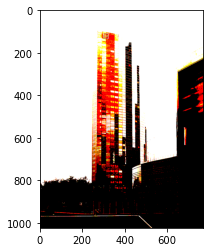

In [50]:
x = preprocess_input(plt.imread(temp2[100]))
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(x)

In [52]:
import time
import cv2
tic = time.process_time()

features = []
for i, image_path in enumerate(temp2):
    if i % 10 == 0:
        print("analyzing image {}".format(i))
    orig = cv2.imread(image_path)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    image1 = cv2.resize(orig, (224, 224)).reshape(-1, 224, 224, 3)
    image1 = preprocess_input(image1)
    feat = model.predict(image1)[0]
    features.append(feat)

analyzing image 0
analyzing image 10
analyzing image 20
analyzing image 30
analyzing image 40
analyzing image 50
analyzing image 60
analyzing image 70
analyzing image 80
analyzing image 90
analyzing image 100
analyzing image 110
analyzing image 120
analyzing image 130
analyzing image 140
analyzing image 150
analyzing image 160
analyzing image 170
analyzing image 180
analyzing image 190
analyzing image 200
analyzing image 210
analyzing image 220
analyzing image 230
analyzing image 240
analyzing image 250
analyzing image 260
analyzing image 270
analyzing image 280
analyzing image 290
analyzing image 300
analyzing image 310
analyzing image 320
analyzing image 330
analyzing image 340
analyzing image 350
analyzing image 360
analyzing image 370
analyzing image 380
analyzing image 390
analyzing image 400
analyzing image 410
analyzing image 420
analyzing image 430
analyzing image 440
analyzing image 450
analyzing image 460
analyzing image 470
analyzing image 480
analyzing image 490
analyzing i

In [53]:
len(features[0])

1000

In [54]:
from sklearn.decomposition import PCA
features = np.array(features)
pca = PCA(n_components=1000)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [55]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [143]:
import numpy as np
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\ResNetF.npy',features)
np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\ResnetPCAF.npy',np.array(pca_features))

In [144]:
import pickle
filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Paris\\Features\\pcaResNet_300'
pickle.dump(pca, open(filename, 'wb'))

In [145]:
type(pca_features)

numpy.ndarray

In [146]:
query_image_idx

597

In [56]:
dict_path = 'C:\\Users\\Prabal\\Desktop\\Shradha\\Paris\\'
my_dict = dict()
c=0
for folder in os.listdir(dict_path):
    my_dict[folder] = c
    c =c+1
def findClass(index):
    return my_dict[temp2[index].split('\\')[-1].split('_')[1]]
def getAccuracy(q,r):
    count=0
    for i in r:
        if q ==i:
            count = count+1
    return count*100/len(r)

Total time : 0.5358605999999781 seconds
Accuracy is 0.0


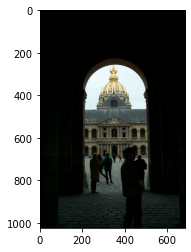

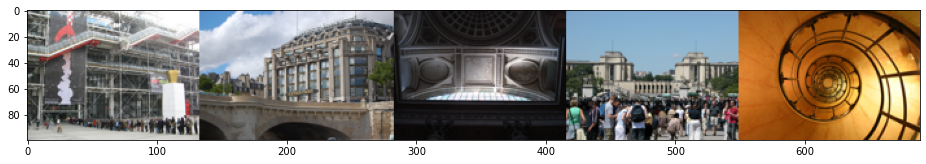

In [57]:
import random
import time
# grab a random query image
query_image_idx = int(7000 * random.random())
class_q = findClass(query_image_idx)
class_r = list()

# let's display
start = time.perf_counter()
plt.imshow(plt.imread(temp[query_image_idx]))
from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
thumbs = []

for idx in idx_closest:
    img = image.load_img(temp[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
print('Total time : {} seconds'.format(end-start))
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = n#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(len(temp2)):
        if(temp2[i].split('\\')[-1].split('_')[1] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)
    
    
temp_ = list()
for i in class_acc:
    t =0
    a =0
    temp3 = list()
    if(len(i)==0):
        continue
    for index in range(4):
        name = i[index][0]
        t = t + i[index][1][0]
        a = a +i[index][1][1]
    temp3.append(name)
    temp3.append(t/5)
    temp3.append(a/5)
    temp_.append(temp3)

defense
eiffel
general
invalides
louvre
moulinrouge
museedorsay
notredame
pantheon
pompidou
sacrecoeur
triomphe


In [59]:
import pandas as pd
result_resnet = pd.DataFrame(temp_)
result_resnet.columns = ['Class', 'Time', 'Accuracy']
result_resnet


Class      Time  Accuracy
0       defense  0.376660      40.0
1        eiffel  0.386482       0.0
2       general  0.376484      28.0
3     invalides  0.400183      40.0
4        louvre  0.397386      12.0
5   moulinrouge  0.384940      60.0
6   museedorsay  0.386884      24.0
7     notredame  0.375896      20.0
8      pantheon  0.381654      48.0
9      pompidou  0.386435      24.0
10   sacrecoeur  0.388148      20.0
11     triomphe  0.382094       4.0

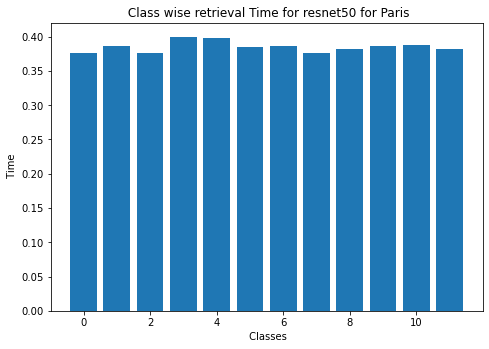

AttributeError: 'NoneType' object has no attribute 'expand_dims'

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = [23,17,35,29,12]
y = result_resnet.Time.values
x= [i for i in range(12)]
ax.bar(x,y)
ax.set_xlabel(" Classes")
ax.set_ylabel(" Time")
plt.title(" Class wise retrieval Time for resnet50 for Paris")
plt.show().expand_dims(x, axis=0)


In [191]:
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp2[idx])
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
#         print('Total time : {} seconds'.format(end-start))
#         print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on 1000 random samples on ResNet50 (Paris) {}'.format(acc_avg/n_samples))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

0


  0%|                                                                                 | 1/1000 [00:00<07:56,  2.10it/s]

1


  0%|▏                                                                                | 2/1000 [00:00<07:58,  2.08it/s]

2


  0%|▏                                                                                | 3/1000 [00:01<07:57,  2.09it/s]

3


  0%|▎                                                                                | 4/1000 [00:01<07:53,  2.10it/s]

4


  0%|▍                                                                                | 5/1000 [00:02<07:55,  2.09it/s]

5


  1%|▍                                                                                | 6/1000 [00:02<07:51,  2.11it/s]

6


  1%|▌                                                                                | 7/1000 [00:03<07:51,  2.11it/s]

7


  1%|▋                                                                                | 8/1000 [00:03<07:48,  2.12it/s]

8


  1%|▋                                                                                | 9/1000 [00:04<07:53,  2.10it/s]

9


  1%|▊                                                                               | 10/1000 [00:04<07:54,  2.08it/s]

10


  1%|▉                                                                               | 11/1000 [00:05<08:00,  2.06it/s]

11


  1%|▉                                                                               | 12/1000 [00:05<07:57,  2.07it/s]

12


  1%|█                                                                               | 13/1000 [00:06<07:52,  2.09it/s]

13


  1%|█                                                                               | 14/1000 [00:06<07:47,  2.11it/s]

14


  2%|█▏                                                                              | 15/1000 [00:07<07:45,  2.12it/s]

15


  2%|█▎                                                                              | 16/1000 [00:07<07:45,  2.11it/s]

16


  2%|█▎                                                                              | 17/1000 [00:08<07:41,  2.13it/s]

17


  2%|█▍                                                                              | 18/1000 [00:08<07:42,  2.12it/s]

18


  2%|█▌                                                                              | 19/1000 [00:09<07:49,  2.09it/s]

19


  2%|█▌                                                                              | 20/1000 [00:09<07:46,  2.10it/s]

20


  2%|█▋                                                                              | 21/1000 [00:09<07:43,  2.11it/s]

21


  2%|█▊                                                                              | 22/1000 [00:10<07:40,  2.13it/s]

22


  2%|█▊                                                                              | 23/1000 [00:10<07:42,  2.11it/s]

23


  2%|█▉                                                                              | 24/1000 [00:11<07:49,  2.08it/s]

24


  2%|██                                                                              | 25/1000 [00:11<07:51,  2.07it/s]

25


  3%|██                                                                              | 26/1000 [00:12<07:49,  2.07it/s]

26


  3%|██▏                                                                             | 27/1000 [00:12<07:47,  2.08it/s]

27


  3%|██▏                                                                             | 28/1000 [00:13<07:47,  2.08it/s]

28


  3%|██▎                                                                             | 29/1000 [00:13<07:46,  2.08it/s]

29


  3%|██▍                                                                             | 30/1000 [00:14<07:56,  2.04it/s]

30


  3%|██▍                                                                             | 31/1000 [00:14<07:54,  2.04it/s]

31


  3%|██▌                                                                             | 32/1000 [00:15<07:48,  2.07it/s]

32


  3%|██▋                                                                             | 33/1000 [00:15<07:41,  2.10it/s]

33


  3%|██▋                                                                             | 34/1000 [00:16<07:39,  2.10it/s]

34


  4%|██▊                                                                             | 35/1000 [00:16<07:37,  2.11it/s]

35


  4%|██▉                                                                             | 36/1000 [00:17<07:39,  2.10it/s]

36


  4%|██▉                                                                             | 37/1000 [00:17<07:45,  2.07it/s]

37


  4%|███                                                                             | 38/1000 [00:18<07:37,  2.10it/s]

38


  4%|███                                                                             | 39/1000 [00:18<07:39,  2.09it/s]

39


  4%|███▏                                                                            | 40/1000 [00:19<07:40,  2.09it/s]

40


  4%|███▎                                                                            | 41/1000 [00:19<07:41,  2.08it/s]

41


  4%|███▎                                                                            | 42/1000 [00:20<07:33,  2.11it/s]

42


  4%|███▍                                                                            | 43/1000 [00:20<07:35,  2.10it/s]

43


  4%|███▌                                                                            | 44/1000 [00:21<07:37,  2.09it/s]

44


  4%|███▌                                                                            | 45/1000 [00:21<07:34,  2.10it/s]

45


  5%|███▋                                                                            | 46/1000 [00:21<07:36,  2.09it/s]

46


  5%|███▊                                                                            | 47/1000 [00:22<07:42,  2.06it/s]

47


  5%|███▊                                                                            | 48/1000 [00:23<07:50,  2.03it/s]

48


  5%|███▉                                                                            | 49/1000 [00:23<07:51,  2.02it/s]

49


  5%|████                                                                            | 50/1000 [00:23<07:43,  2.05it/s]

50


  5%|████                                                                            | 51/1000 [00:24<07:37,  2.07it/s]

51


  5%|████▏                                                                           | 52/1000 [00:24<07:37,  2.07it/s]

52


  5%|████▏                                                                           | 53/1000 [00:25<07:37,  2.07it/s]

53


  5%|████▎                                                                           | 54/1000 [00:25<07:42,  2.05it/s]

54


  6%|████▍                                                                           | 55/1000 [00:26<07:35,  2.07it/s]

55


  6%|████▍                                                                           | 56/1000 [00:26<07:31,  2.09it/s]

56


  6%|████▌                                                                           | 57/1000 [00:27<07:28,  2.10it/s]

57


  6%|████▋                                                                           | 58/1000 [00:27<07:21,  2.13it/s]

58


  6%|████▋                                                                           | 59/1000 [00:28<07:24,  2.12it/s]

59


  6%|████▊                                                                           | 60/1000 [00:28<07:23,  2.12it/s]

60


  6%|████▉                                                                           | 61/1000 [00:29<07:31,  2.08it/s]

61


  6%|████▉                                                                           | 62/1000 [00:29<07:35,  2.06it/s]

62


  6%|█████                                                                           | 63/1000 [00:30<07:35,  2.06it/s]

63


  6%|█████                                                                           | 64/1000 [00:30<07:34,  2.06it/s]

64


  6%|█████▏                                                                          | 65/1000 [00:31<07:33,  2.06it/s]

65


  7%|█████▎                                                                          | 66/1000 [00:31<07:37,  2.04it/s]

66


  7%|█████▎                                                                          | 67/1000 [00:32<07:35,  2.05it/s]

67


  7%|█████▍                                                                          | 68/1000 [00:32<07:34,  2.05it/s]

68


  7%|█████▌                                                                          | 69/1000 [00:33<07:32,  2.06it/s]

69


  7%|█████▌                                                                          | 70/1000 [00:33<07:25,  2.09it/s]

70


  7%|█████▋                                                                          | 71/1000 [00:34<07:22,  2.10it/s]

71


  7%|█████▊                                                                          | 72/1000 [00:34<07:21,  2.10it/s]

72


  7%|█████▊                                                                          | 73/1000 [00:35<07:27,  2.07it/s]

73


  7%|█████▉                                                                          | 74/1000 [00:35<07:19,  2.11it/s]

74


  8%|██████                                                                          | 75/1000 [00:35<07:21,  2.10it/s]

75


  8%|██████                                                                          | 76/1000 [00:36<07:23,  2.09it/s]

76


  8%|██████▏                                                                         | 77/1000 [00:36<07:19,  2.10it/s]

77


  8%|██████▏                                                                         | 78/1000 [00:37<07:21,  2.09it/s]

78


  8%|██████▎                                                                         | 79/1000 [00:37<07:17,  2.11it/s]

79


  8%|██████▍                                                                         | 80/1000 [00:38<07:20,  2.09it/s]

80


  8%|██████▍                                                                         | 81/1000 [00:38<07:21,  2.08it/s]

81


  8%|██████▌                                                                         | 82/1000 [00:39<07:21,  2.08it/s]

82


  8%|██████▋                                                                         | 83/1000 [00:39<07:22,  2.07it/s]

83


  8%|██████▋                                                                         | 84/1000 [00:40<07:22,  2.07it/s]

84


  8%|██████▊                                                                         | 85/1000 [00:40<07:20,  2.08it/s]

85


  9%|██████▉                                                                         | 86/1000 [00:41<07:18,  2.09it/s]

86


  9%|██████▉                                                                         | 87/1000 [00:41<07:21,  2.07it/s]

87


  9%|███████                                                                         | 88/1000 [00:42<07:14,  2.10it/s]

88


  9%|███████                                                                         | 89/1000 [00:42<07:15,  2.09it/s]

89


  9%|███████▏                                                                        | 90/1000 [00:43<07:17,  2.08it/s]

90


  9%|███████▎                                                                        | 91/1000 [00:43<07:17,  2.08it/s]

91


  9%|███████▎                                                                        | 92/1000 [00:44<07:13,  2.09it/s]

92


  9%|███████▍                                                                        | 93/1000 [00:44<07:11,  2.10it/s]

93


  9%|███████▌                                                                        | 94/1000 [00:45<07:08,  2.11it/s]

94


 10%|███████▌                                                                        | 95/1000 [00:45<07:15,  2.08it/s]

95


 10%|███████▋                                                                        | 96/1000 [00:46<07:11,  2.09it/s]

96


 10%|███████▊                                                                        | 97/1000 [00:46<07:12,  2.09it/s]

97


 10%|███████▊                                                                        | 98/1000 [00:47<07:13,  2.08it/s]

98


 10%|███████▉                                                                        | 99/1000 [00:47<07:18,  2.06it/s]

99


 10%|███████▉                                                                       | 100/1000 [00:47<07:13,  2.08it/s]

100


 10%|███████▉                                                                       | 101/1000 [00:48<07:11,  2.08it/s]

101


 10%|████████                                                                       | 102/1000 [00:48<07:05,  2.11it/s]

102


 10%|████████▏                                                                      | 103/1000 [00:49<07:16,  2.05it/s]

103


 10%|████████▏                                                                      | 104/1000 [00:49<07:15,  2.06it/s]

104


 10%|████████▎                                                                      | 105/1000 [00:50<07:18,  2.04it/s]

105


 11%|████████▎                                                                      | 106/1000 [00:50<07:24,  2.01it/s]

106


 11%|████████▍                                                                      | 107/1000 [00:51<07:24,  2.01it/s]

107


 11%|████████▌                                                                      | 108/1000 [00:51<07:28,  1.99it/s]

108


 11%|████████▌                                                                      | 109/1000 [00:52<07:19,  2.03it/s]

109


 11%|████████▋                                                                      | 110/1000 [00:52<07:16,  2.04it/s]

110


 11%|████████▊                                                                      | 111/1000 [00:53<07:10,  2.07it/s]

111


 11%|████████▊                                                                      | 112/1000 [00:53<07:01,  2.11it/s]

112


 11%|████████▉                                                                      | 113/1000 [00:54<07:03,  2.09it/s]

113


 11%|█████████                                                                      | 114/1000 [00:54<07:00,  2.11it/s]

114


 12%|█████████                                                                      | 115/1000 [00:55<07:07,  2.07it/s]

115


 12%|█████████▏                                                                     | 116/1000 [00:55<07:06,  2.07it/s]

116


 12%|█████████▏                                                                     | 117/1000 [00:56<07:02,  2.09it/s]

117


 12%|█████████▎                                                                     | 118/1000 [00:56<06:57,  2.11it/s]

118


 12%|█████████▍                                                                     | 119/1000 [00:57<06:56,  2.11it/s]

119


 12%|█████████▍                                                                     | 120/1000 [00:57<06:52,  2.13it/s]

120


 12%|█████████▌                                                                     | 121/1000 [00:58<06:55,  2.12it/s]

121


 12%|█████████▋                                                                     | 122/1000 [00:58<06:55,  2.12it/s]

122


 12%|█████████▋                                                                     | 123/1000 [00:59<06:52,  2.13it/s]

123


 12%|█████████▊                                                                     | 124/1000 [00:59<06:59,  2.09it/s]

124


 12%|█████████▉                                                                     | 125/1000 [01:00<07:00,  2.08it/s]

125


 13%|█████████▉                                                                     | 126/1000 [01:00<07:01,  2.08it/s]

126


 13%|██████████                                                                     | 127/1000 [01:00<06:53,  2.11it/s]

127


 13%|██████████                                                                     | 128/1000 [01:01<06:55,  2.10it/s]

128


 13%|██████████▏                                                                    | 129/1000 [01:01<06:57,  2.09it/s]

129


 13%|██████████▎                                                                    | 130/1000 [01:02<06:58,  2.08it/s]

130


 13%|██████████▎                                                                    | 131/1000 [01:02<06:58,  2.08it/s]

131


 13%|██████████▍                                                                    | 132/1000 [01:03<06:58,  2.07it/s]

132


 13%|██████████▌                                                                    | 133/1000 [01:03<06:50,  2.11it/s]

133


 13%|██████████▌                                                                    | 134/1000 [01:04<06:48,  2.12it/s]

134


 14%|██████████▋                                                                    | 135/1000 [01:04<06:47,  2.12it/s]

135


 14%|██████████▋                                                                    | 136/1000 [01:05<06:58,  2.06it/s]

136


 14%|██████████▊                                                                    | 137/1000 [01:05<06:58,  2.06it/s]

137


 14%|██████████▉                                                                    | 138/1000 [01:06<06:53,  2.08it/s]

138


 14%|██████████▉                                                                    | 139/1000 [01:06<06:50,  2.10it/s]

139


 14%|███████████                                                                    | 140/1000 [01:07<06:49,  2.10it/s]

140


 14%|███████████▏                                                                   | 141/1000 [01:07<06:49,  2.10it/s]

141


 14%|███████████▏                                                                   | 142/1000 [01:08<06:38,  2.15it/s]

142


 14%|███████████▎                                                                   | 143/1000 [01:08<06:39,  2.15it/s]

143


 14%|███████████▍                                                                   | 144/1000 [01:09<06:47,  2.10it/s]

144


 14%|███████████▍                                                                   | 145/1000 [01:09<06:45,  2.11it/s]

145


 15%|███████████▌                                                                   | 146/1000 [01:10<06:47,  2.10it/s]

146


 15%|███████████▌                                                                   | 147/1000 [01:10<06:52,  2.07it/s]

147


 15%|███████████▋                                                                   | 148/1000 [01:10<06:48,  2.09it/s]

148


 15%|███████████▊                                                                   | 149/1000 [01:11<06:49,  2.08it/s]

149


 15%|███████████▊                                                                   | 150/1000 [01:11<06:47,  2.08it/s]

150


 15%|███████████▉                                                                   | 151/1000 [01:12<06:54,  2.05it/s]

151


 15%|████████████                                                                   | 152/1000 [01:12<06:45,  2.09it/s]

152


 15%|████████████                                                                   | 153/1000 [01:13<06:46,  2.08it/s]

153


 15%|████████████▏                                                                  | 154/1000 [01:13<06:46,  2.08it/s]

154


 16%|████████████▏                                                                  | 155/1000 [01:14<06:47,  2.08it/s]

155


 16%|████████████▎                                                                  | 156/1000 [01:14<06:47,  2.07it/s]

156


 16%|████████████▍                                                                  | 157/1000 [01:15<06:43,  2.09it/s]

157


 16%|████████████▍                                                                  | 158/1000 [01:15<06:40,  2.10it/s]

158


 16%|████████████▌                                                                  | 159/1000 [01:16<06:43,  2.08it/s]

159


 16%|████████████▋                                                                  | 160/1000 [01:16<06:42,  2.09it/s]

160


 16%|████████████▋                                                                  | 161/1000 [01:17<06:43,  2.08it/s]

161


 16%|████████████▊                                                                  | 162/1000 [01:17<06:43,  2.07it/s]

162


 16%|████████████▉                                                                  | 163/1000 [01:18<06:40,  2.09it/s]

163


 16%|████████████▉                                                                  | 164/1000 [01:18<06:37,  2.10it/s]

164


 16%|█████████████                                                                  | 165/1000 [01:19<06:35,  2.11it/s]

165


 17%|█████████████                                                                  | 166/1000 [01:19<06:37,  2.10it/s]

166


 17%|█████████████▏                                                                 | 167/1000 [01:20<06:39,  2.09it/s]

167


 17%|█████████████▎                                                                 | 168/1000 [01:20<06:39,  2.08it/s]

168


 17%|█████████████▎                                                                 | 169/1000 [01:21<06:32,  2.12it/s]

169


 17%|█████████████▍                                                                 | 170/1000 [01:21<06:35,  2.10it/s]

170


 17%|█████████████▌                                                                 | 171/1000 [01:21<06:32,  2.11it/s]

171


 17%|█████████████▌                                                                 | 172/1000 [01:22<06:27,  2.14it/s]

172


 17%|█████████████▋                                                                 | 173/1000 [01:22<06:26,  2.14it/s]

173


 17%|█████████████▋                                                                 | 174/1000 [01:23<06:30,  2.11it/s]

174


 18%|█████████████▊                                                                 | 175/1000 [01:23<06:29,  2.12it/s]

175


 18%|█████████████▉                                                                 | 176/1000 [01:24<06:27,  2.12it/s]

176


 18%|█████████████▉                                                                 | 177/1000 [01:24<06:31,  2.10it/s]

177


 18%|██████████████                                                                 | 178/1000 [01:25<06:29,  2.11it/s]

178


 18%|██████████████▏                                                                | 179/1000 [01:25<06:31,  2.09it/s]

179


 18%|██████████████▏                                                                | 180/1000 [01:26<06:34,  2.08it/s]

180


 18%|██████████████▎                                                                | 181/1000 [01:26<06:25,  2.12it/s]

181


 18%|██████████████▍                                                                | 182/1000 [01:27<06:23,  2.13it/s]

182


 18%|██████████████▍                                                                | 183/1000 [01:27<06:23,  2.13it/s]

183


 18%|██████████████▌                                                                | 184/1000 [01:28<06:22,  2.13it/s]

184


 18%|██████████████▌                                                                | 185/1000 [01:28<06:29,  2.09it/s]

185


 19%|██████████████▋                                                                | 186/1000 [01:29<06:30,  2.08it/s]

186


 19%|██████████████▊                                                                | 187/1000 [01:29<06:28,  2.09it/s]

187


 19%|██████████████▊                                                                | 188/1000 [01:30<06:28,  2.09it/s]

188


 19%|██████████████▉                                                                | 189/1000 [01:30<06:29,  2.08it/s]

189


 19%|███████████████                                                                | 190/1000 [01:31<06:29,  2.08it/s]

190


 19%|███████████████                                                                | 191/1000 [01:31<06:22,  2.12it/s]

191


 19%|███████████████▏                                                               | 192/1000 [01:31<06:24,  2.10it/s]

192


 19%|███████████████▏                                                               | 193/1000 [01:32<06:19,  2.13it/s]

193


 19%|███████████████▎                                                               | 194/1000 [01:32<06:22,  2.11it/s]

194


 20%|███████████████▍                                                               | 195/1000 [01:33<06:24,  2.09it/s]

195


 20%|███████████████▍                                                               | 196/1000 [01:33<06:25,  2.09it/s]

196


 20%|███████████████▌                                                               | 197/1000 [01:34<06:26,  2.08it/s]

197


 20%|███████████████▋                                                               | 198/1000 [01:34<06:18,  2.12it/s]

198


 20%|███████████████▋                                                               | 199/1000 [01:35<06:28,  2.06it/s]

199


 20%|███████████████▊                                                               | 200/1000 [01:35<06:30,  2.05it/s]

200


 20%|███████████████▉                                                               | 201/1000 [01:36<06:27,  2.06it/s]

201


 20%|███████████████▉                                                               | 202/1000 [01:36<06:24,  2.07it/s]

202


 20%|████████████████                                                               | 203/1000 [01:37<06:22,  2.08it/s]

203


 20%|████████████████                                                               | 204/1000 [01:37<06:27,  2.05it/s]

204


 20%|████████████████▏                                                              | 205/1000 [01:38<06:22,  2.08it/s]

205


 21%|████████████████▎                                                              | 206/1000 [01:38<06:18,  2.10it/s]

206


 21%|████████████████▎                                                              | 207/1000 [01:39<06:16,  2.11it/s]

207


 21%|████████████████▍                                                              | 208/1000 [01:39<06:14,  2.11it/s]

208


 21%|████████████████▌                                                              | 209/1000 [01:40<06:13,  2.12it/s]

209


 21%|████████████████▌                                                              | 210/1000 [01:40<06:11,  2.12it/s]

210


 21%|████████████████▋                                                              | 211/1000 [01:41<06:10,  2.13it/s]

211


 21%|████████████████▋                                                              | 212/1000 [01:41<06:17,  2.09it/s]

212


 21%|████████████████▊                                                              | 213/1000 [01:41<06:14,  2.10it/s]

213


 21%|████████████████▉                                                              | 214/1000 [01:42<06:23,  2.05it/s]

214


 22%|████████████████▉                                                              | 215/1000 [01:42<06:14,  2.09it/s]

215


 22%|█████████████████                                                              | 216/1000 [01:43<06:15,  2.09it/s]

216


 22%|█████████████████▏                                                             | 217/1000 [01:43<06:20,  2.06it/s]

217


 22%|█████████████████▏                                                             | 218/1000 [01:44<06:19,  2.06it/s]

218


 22%|█████████████████▎                                                             | 219/1000 [01:44<06:15,  2.08it/s]

219


 22%|█████████████████▍                                                             | 220/1000 [01:45<06:15,  2.08it/s]

220


 22%|█████████████████▍                                                             | 221/1000 [01:45<06:12,  2.09it/s]

221


 22%|█████████████████▌                                                             | 222/1000 [01:46<06:09,  2.11it/s]

222


 22%|█████████████████▌                                                             | 223/1000 [01:46<06:11,  2.09it/s]

223


 22%|█████████████████▋                                                             | 224/1000 [01:47<06:19,  2.04it/s]

224


 22%|█████████████████▊                                                             | 225/1000 [01:47<06:10,  2.09it/s]

225


 23%|█████████████████▊                                                             | 226/1000 [01:48<06:08,  2.10it/s]

226


 23%|█████████████████▉                                                             | 227/1000 [01:48<06:06,  2.11it/s]

227


 23%|██████████████████                                                             | 228/1000 [01:49<06:11,  2.08it/s]

228


 23%|██████████████████                                                             | 229/1000 [01:49<06:11,  2.07it/s]

229


 23%|██████████████████▏                                                            | 230/1000 [01:50<06:07,  2.09it/s]

230


 23%|██████████████████▏                                                            | 231/1000 [01:50<06:05,  2.10it/s]

231


 23%|██████████████████▎                                                            | 232/1000 [01:51<06:02,  2.12it/s]

232


 23%|██████████████████▍                                                            | 233/1000 [01:51<06:02,  2.12it/s]

233


 23%|██████████████████▍                                                            | 234/1000 [01:52<06:04,  2.10it/s]

234


 24%|██████████████████▌                                                            | 235/1000 [01:52<06:04,  2.10it/s]

235


 24%|██████████████████▋                                                            | 236/1000 [01:52<06:02,  2.10it/s]

236


 24%|██████████████████▋                                                            | 237/1000 [01:53<06:02,  2.11it/s]

237


 24%|██████████████████▊                                                            | 238/1000 [01:53<06:07,  2.07it/s]

238


 24%|██████████████████▉                                                            | 239/1000 [01:54<06:11,  2.05it/s]

239


 24%|██████████████████▉                                                            | 240/1000 [01:54<06:06,  2.08it/s]

240


 24%|███████████████████                                                            | 241/1000 [01:55<06:06,  2.07it/s]

241


 24%|███████████████████                                                            | 242/1000 [01:55<06:09,  2.05it/s]

242


 24%|███████████████████▏                                                           | 243/1000 [01:56<06:12,  2.03it/s]

243


 24%|███████████████████▎                                                           | 244/1000 [01:56<06:17,  2.00it/s]

244


 24%|███████████████████▎                                                           | 245/1000 [01:57<06:05,  2.06it/s]

245


 25%|███████████████████▍                                                           | 246/1000 [01:57<06:09,  2.04it/s]

246


 25%|███████████████████▌                                                           | 247/1000 [01:58<06:03,  2.07it/s]

247


 25%|███████████████████▌                                                           | 248/1000 [01:58<06:03,  2.07it/s]

248


 25%|███████████████████▋                                                           | 249/1000 [01:59<06:03,  2.07it/s]

249


 25%|███████████████████▊                                                           | 250/1000 [01:59<06:03,  2.07it/s]

250


 25%|███████████████████▊                                                           | 251/1000 [02:00<05:55,  2.11it/s]

251


 25%|███████████████████▉                                                           | 252/1000 [02:00<06:04,  2.05it/s]

252


 25%|███████████████████▉                                                           | 253/1000 [02:01<05:59,  2.08it/s]

253


 25%|████████████████████                                                           | 254/1000 [02:01<05:52,  2.11it/s]

254


 26%|████████████████████▏                                                          | 255/1000 [02:02<05:51,  2.12it/s]

255


 26%|████████████████████▏                                                          | 256/1000 [02:02<05:50,  2.12it/s]

256


 26%|████████████████████▎                                                          | 257/1000 [02:03<05:52,  2.11it/s]

257


 26%|████████████████████▍                                                          | 258/1000 [02:03<05:47,  2.14it/s]

258


 26%|████████████████████▍                                                          | 259/1000 [02:04<05:50,  2.11it/s]

259


 26%|████████████████████▌                                                          | 260/1000 [02:04<05:52,  2.10it/s]

260


 26%|████████████████████▌                                                          | 261/1000 [02:05<05:51,  2.10it/s]

261


 26%|████████████████████▋                                                          | 262/1000 [02:05<05:55,  2.08it/s]

262


 26%|████████████████████▊                                                          | 263/1000 [02:05<05:55,  2.08it/s]

263


 26%|████████████████████▊                                                          | 264/1000 [02:06<05:52,  2.09it/s]

264


 26%|████████████████████▉                                                          | 265/1000 [02:06<05:51,  2.09it/s]

265


 27%|█████████████████████                                                          | 266/1000 [02:07<06:01,  2.03it/s]

266


 27%|█████████████████████                                                          | 267/1000 [02:07<05:57,  2.05it/s]

267


 27%|█████████████████████▏                                                         | 268/1000 [02:08<05:57,  2.05it/s]

268


 27%|█████████████████████▎                                                         | 269/1000 [02:08<05:52,  2.07it/s]

269


 27%|█████████████████████▎                                                         | 270/1000 [02:09<05:57,  2.04it/s]

270


 27%|█████████████████████▍                                                         | 271/1000 [02:09<05:52,  2.07it/s]

271


 27%|█████████████████████▍                                                         | 272/1000 [02:10<05:49,  2.08it/s]

272


 27%|█████████████████████▌                                                         | 273/1000 [02:10<05:44,  2.11it/s]

273


 27%|█████████████████████▋                                                         | 274/1000 [02:11<05:45,  2.10it/s]

274


 28%|█████████████████████▋                                                         | 275/1000 [02:11<05:46,  2.09it/s]

275


 28%|█████████████████████▊                                                         | 276/1000 [02:12<05:48,  2.07it/s]

276


 28%|█████████████████████▉                                                         | 277/1000 [02:12<05:44,  2.10it/s]

277


 28%|█████████████████████▉                                                         | 278/1000 [02:13<05:42,  2.11it/s]

278


 28%|██████████████████████                                                         | 279/1000 [02:13<05:37,  2.14it/s]

279


 28%|██████████████████████                                                         | 280/1000 [02:14<05:37,  2.13it/s]

280


 28%|██████████████████████▏                                                        | 281/1000 [02:14<05:36,  2.14it/s]

281


 28%|██████████████████████▎                                                        | 282/1000 [02:15<05:36,  2.13it/s]

282


 28%|██████████████████████▎                                                        | 283/1000 [02:15<05:42,  2.09it/s]

283


 28%|██████████████████████▍                                                        | 284/1000 [02:16<05:40,  2.10it/s]

284


 28%|██████████████████████▌                                                        | 285/1000 [02:16<05:38,  2.11it/s]

285


 29%|██████████████████████▌                                                        | 286/1000 [02:16<05:40,  2.10it/s]

286


 29%|██████████████████████▋                                                        | 287/1000 [02:17<05:38,  2.11it/s]

287


 29%|██████████████████████▊                                                        | 288/1000 [02:17<05:36,  2.12it/s]

288


 29%|██████████████████████▊                                                        | 289/1000 [02:18<05:37,  2.11it/s]

289


 29%|██████████████████████▉                                                        | 290/1000 [02:18<05:36,  2.11it/s]

290


 29%|██████████████████████▉                                                        | 291/1000 [02:19<05:35,  2.12it/s]

291


 29%|███████████████████████                                                        | 292/1000 [02:19<05:32,  2.13it/s]

292


 29%|███████████████████████▏                                                       | 293/1000 [02:20<05:33,  2.12it/s]

293


 29%|███████████████████████▏                                                       | 294/1000 [02:20<05:32,  2.13it/s]

294


 30%|███████████████████████▎                                                       | 295/1000 [02:21<05:31,  2.13it/s]

295


 30%|███████████████████████▍                                                       | 296/1000 [02:21<05:30,  2.13it/s]

296


 30%|███████████████████████▍                                                       | 297/1000 [02:22<05:28,  2.14it/s]

297


 30%|███████████████████████▌                                                       | 298/1000 [02:22<05:27,  2.14it/s]

298


 30%|███████████████████████▌                                                       | 299/1000 [02:23<05:29,  2.13it/s]

299


 30%|███████████████████████▋                                                       | 300/1000 [02:23<05:27,  2.14it/s]

300


 30%|███████████████████████▊                                                       | 301/1000 [02:24<05:25,  2.15it/s]

301


 30%|███████████████████████▊                                                       | 302/1000 [02:24<05:22,  2.17it/s]

302


 30%|███████████████████████▉                                                       | 303/1000 [02:24<05:23,  2.16it/s]

303


 30%|████████████████████████                                                       | 304/1000 [02:25<05:23,  2.15it/s]

304


 30%|████████████████████████                                                       | 305/1000 [02:25<05:24,  2.14it/s]

305


 31%|████████████████████████▏                                                      | 306/1000 [02:26<05:24,  2.14it/s]

306


 31%|████████████████████████▎                                                      | 307/1000 [02:26<05:20,  2.16it/s]

307


 31%|████████████████████████▎                                                      | 308/1000 [02:27<05:21,  2.15it/s]

308


 31%|████████████████████████▍                                                      | 309/1000 [02:27<05:25,  2.12it/s]

309


 31%|████████████████████████▍                                                      | 310/1000 [02:28<05:23,  2.13it/s]

310


 31%|████████████████████████▌                                                      | 311/1000 [02:28<05:23,  2.13it/s]

311


 31%|████████████████████████▋                                                      | 312/1000 [02:29<05:23,  2.13it/s]

312


 31%|████████████████████████▋                                                      | 313/1000 [02:29<05:22,  2.13it/s]

313


 31%|████████████████████████▊                                                      | 314/1000 [02:30<05:21,  2.13it/s]

314


 32%|████████████████████████▉                                                      | 315/1000 [02:30<05:21,  2.13it/s]

315


 32%|████████████████████████▉                                                      | 316/1000 [02:31<05:20,  2.13it/s]

316


 32%|█████████████████████████                                                      | 317/1000 [02:31<05:20,  2.13it/s]

317


 32%|█████████████████████████                                                      | 318/1000 [02:31<05:19,  2.13it/s]

318


 32%|█████████████████████████▏                                                     | 319/1000 [02:32<05:17,  2.14it/s]

319


 32%|█████████████████████████▎                                                     | 320/1000 [02:32<05:17,  2.14it/s]

320


 32%|█████████████████████████▎                                                     | 321/1000 [02:33<05:22,  2.11it/s]

321


 32%|█████████████████████████▍                                                     | 322/1000 [02:33<05:23,  2.09it/s]

322


 32%|█████████████████████████▌                                                     | 323/1000 [02:34<05:20,  2.11it/s]

323


 32%|█████████████████████████▌                                                     | 324/1000 [02:34<05:16,  2.13it/s]

324


 32%|█████████████████████████▋                                                     | 325/1000 [02:35<05:16,  2.13it/s]

325


 33%|█████████████████████████▊                                                     | 326/1000 [02:35<05:12,  2.15it/s]

326


 33%|█████████████████████████▊                                                     | 327/1000 [02:36<05:16,  2.13it/s]

327


 33%|█████████████████████████▉                                                     | 328/1000 [02:36<05:12,  2.15it/s]

328


 33%|█████████████████████████▉                                                     | 329/1000 [02:37<05:15,  2.12it/s]

329


 33%|██████████████████████████                                                     | 330/1000 [02:37<05:15,  2.13it/s]

330


 33%|██████████████████████████▏                                                    | 331/1000 [02:38<05:15,  2.12it/s]

331


 33%|██████████████████████████▏                                                    | 332/1000 [02:38<05:13,  2.13it/s]

332


 33%|██████████████████████████▎                                                    | 333/1000 [02:39<05:09,  2.15it/s]

333


 33%|██████████████████████████▍                                                    | 334/1000 [02:39<05:09,  2.15it/s]

334


 34%|██████████████████████████▍                                                    | 335/1000 [02:39<05:08,  2.15it/s]

335


 34%|██████████████████████████▌                                                    | 336/1000 [02:40<05:07,  2.16it/s]

336


 34%|██████████████████████████▌                                                    | 337/1000 [02:40<05:11,  2.13it/s]

337


 34%|██████████████████████████▋                                                    | 338/1000 [02:41<05:10,  2.13it/s]

338


 34%|██████████████████████████▊                                                    | 339/1000 [02:41<05:09,  2.13it/s]

339


 34%|██████████████████████████▊                                                    | 340/1000 [02:42<05:06,  2.15it/s]

340


 34%|██████████████████████████▉                                                    | 341/1000 [02:42<05:09,  2.13it/s]

341


 34%|███████████████████████████                                                    | 342/1000 [02:43<05:12,  2.11it/s]

342


 34%|███████████████████████████                                                    | 343/1000 [02:43<05:07,  2.14it/s]

343


 34%|███████████████████████████▏                                                   | 344/1000 [02:44<05:07,  2.13it/s]

344


 34%|███████████████████████████▎                                                   | 345/1000 [02:44<05:09,  2.11it/s]

345


 35%|███████████████████████████▎                                                   | 346/1000 [02:45<05:08,  2.12it/s]

346


 35%|███████████████████████████▍                                                   | 347/1000 [02:45<05:04,  2.15it/s]

347


 35%|███████████████████████████▍                                                   | 348/1000 [02:46<05:04,  2.14it/s]

348


 35%|███████████████████████████▌                                                   | 349/1000 [02:46<05:04,  2.14it/s]

349


 35%|███████████████████████████▋                                                   | 350/1000 [02:46<05:01,  2.16it/s]

350


 35%|███████████████████████████▋                                                   | 351/1000 [02:47<05:02,  2.14it/s]

351


 35%|███████████████████████████▊                                                   | 352/1000 [02:47<05:04,  2.13it/s]

352


 35%|███████████████████████████▉                                                   | 353/1000 [02:48<05:03,  2.13it/s]

353


 35%|███████████████████████████▉                                                   | 354/1000 [02:48<05:03,  2.13it/s]

354


 36%|████████████████████████████                                                   | 355/1000 [02:49<05:05,  2.11it/s]

355


 36%|████████████████████████████                                                   | 356/1000 [02:49<05:01,  2.14it/s]

356


 36%|████████████████████████████▏                                                  | 357/1000 [02:50<05:03,  2.12it/s]

357


 36%|████████████████████████████▎                                                  | 358/1000 [02:50<05:02,  2.12it/s]

358


 36%|████████████████████████████▎                                                  | 359/1000 [02:51<04:58,  2.15it/s]

359


 36%|████████████████████████████▍                                                  | 360/1000 [02:51<04:58,  2.14it/s]

360


 36%|████████████████████████████▌                                                  | 361/1000 [02:52<05:01,  2.12it/s]

361


 36%|████████████████████████████▌                                                  | 362/1000 [02:52<05:06,  2.08it/s]

362


 36%|████████████████████████████▋                                                  | 363/1000 [02:53<05:00,  2.12it/s]

363


 36%|████████████████████████████▊                                                  | 364/1000 [02:53<04:59,  2.12it/s]

364


 36%|████████████████████████████▊                                                  | 365/1000 [02:54<04:58,  2.13it/s]

365


 37%|████████████████████████████▉                                                  | 366/1000 [02:54<05:00,  2.11it/s]

366


 37%|████████████████████████████▉                                                  | 367/1000 [02:54<04:59,  2.11it/s]

367


 37%|█████████████████████████████                                                  | 368/1000 [02:55<04:58,  2.12it/s]

368


 37%|█████████████████████████████▏                                                 | 369/1000 [02:55<04:56,  2.13it/s]

369


 37%|█████████████████████████████▏                                                 | 370/1000 [02:56<04:57,  2.11it/s]

370


 37%|█████████████████████████████▎                                                 | 371/1000 [02:56<04:54,  2.13it/s]

371


 37%|█████████████████████████████▍                                                 | 372/1000 [02:57<04:51,  2.15it/s]

372


 37%|█████████████████████████████▍                                                 | 373/1000 [02:57<04:51,  2.15it/s]

373


 37%|█████████████████████████████▌                                                 | 374/1000 [02:58<04:55,  2.12it/s]

374


 38%|█████████████████████████████▋                                                 | 375/1000 [02:58<04:56,  2.11it/s]

375


 38%|█████████████████████████████▋                                                 | 376/1000 [02:59<04:58,  2.09it/s]

376


 38%|█████████████████████████████▊                                                 | 377/1000 [02:59<04:53,  2.13it/s]

377


 38%|█████████████████████████████▊                                                 | 378/1000 [03:00<04:52,  2.13it/s]

378


 38%|█████████████████████████████▉                                                 | 379/1000 [03:00<04:54,  2.11it/s]

379


 38%|██████████████████████████████                                                 | 380/1000 [03:01<04:50,  2.14it/s]

380


 38%|██████████████████████████████                                                 | 381/1000 [03:01<04:52,  2.12it/s]

381


 38%|██████████████████████████████▏                                                | 382/1000 [03:02<04:54,  2.10it/s]

382


 38%|██████████████████████████████▎                                                | 383/1000 [03:02<04:52,  2.11it/s]

383


 38%|██████████████████████████████▎                                                | 384/1000 [03:03<04:50,  2.12it/s]

384


 38%|██████████████████████████████▍                                                | 385/1000 [03:03<04:54,  2.09it/s]

385


 39%|██████████████████████████████▍                                                | 386/1000 [03:03<04:53,  2.09it/s]

386


 39%|██████████████████████████████▌                                                | 387/1000 [03:04<04:50,  2.11it/s]

387


 39%|██████████████████████████████▋                                                | 388/1000 [03:04<04:49,  2.11it/s]

388


 39%|██████████████████████████████▋                                                | 389/1000 [03:05<04:51,  2.10it/s]

389


 39%|██████████████████████████████▊                                                | 390/1000 [03:05<04:55,  2.07it/s]

390


 39%|██████████████████████████████▉                                                | 391/1000 [03:06<04:48,  2.11it/s]

391


 39%|██████████████████████████████▉                                                | 392/1000 [03:06<04:47,  2.12it/s]

392


 39%|███████████████████████████████                                                | 393/1000 [03:07<04:49,  2.10it/s]

393


 39%|███████████████████████████████▏                                               | 394/1000 [03:07<04:47,  2.11it/s]

394


 40%|███████████████████████████████▏                                               | 395/1000 [03:08<04:51,  2.08it/s]

395


 40%|███████████████████████████████▎                                               | 396/1000 [03:08<04:46,  2.11it/s]

396


 40%|███████████████████████████████▎                                               | 397/1000 [03:09<04:44,  2.12it/s]

397


 40%|███████████████████████████████▍                                               | 398/1000 [03:09<04:43,  2.12it/s]

398


 40%|███████████████████████████████▌                                               | 399/1000 [03:10<04:45,  2.11it/s]

399


 40%|███████████████████████████████▌                                               | 400/1000 [03:10<04:46,  2.09it/s]

400


 40%|███████████████████████████████▋                                               | 401/1000 [03:11<04:47,  2.08it/s]

401


 40%|███████████████████████████████▊                                               | 402/1000 [03:11<04:46,  2.09it/s]

402


 40%|███████████████████████████████▊                                               | 403/1000 [03:12<04:45,  2.09it/s]

403


 40%|███████████████████████████████▉                                               | 404/1000 [03:12<04:40,  2.12it/s]

404


 40%|███████████████████████████████▉                                               | 405/1000 [03:12<04:39,  2.13it/s]

405


 41%|████████████████████████████████                                               | 406/1000 [03:13<04:39,  2.13it/s]

406


 41%|████████████████████████████████▏                                              | 407/1000 [03:13<04:35,  2.15it/s]

407


 41%|████████████████████████████████▏                                              | 408/1000 [03:14<04:35,  2.15it/s]

408


 41%|████████████████████████████████▎                                              | 409/1000 [03:14<04:35,  2.15it/s]

409


 41%|████████████████████████████████▍                                              | 410/1000 [03:15<04:35,  2.14it/s]

410


 41%|████████████████████████████████▍                                              | 411/1000 [03:15<04:35,  2.14it/s]

411


 41%|████████████████████████████████▌                                              | 412/1000 [03:16<04:35,  2.14it/s]

412


 41%|████████████████████████████████▋                                              | 413/1000 [03:16<04:34,  2.14it/s]

413


 41%|████████████████████████████████▋                                              | 414/1000 [03:17<04:33,  2.14it/s]

414


 42%|████████████████████████████████▊                                              | 415/1000 [03:17<04:31,  2.15it/s]

415


 42%|████████████████████████████████▊                                              | 416/1000 [03:18<04:29,  2.17it/s]

416


 42%|████████████████████████████████▉                                              | 417/1000 [03:18<04:29,  2.17it/s]

417


 42%|█████████████████████████████████                                              | 418/1000 [03:19<04:31,  2.15it/s]

418


 42%|█████████████████████████████████                                              | 419/1000 [03:19<04:31,  2.14it/s]

419


 42%|█████████████████████████████████▏                                             | 420/1000 [03:19<04:30,  2.14it/s]

420


 42%|█████████████████████████████████▎                                             | 421/1000 [03:20<04:29,  2.15it/s]

421


 42%|█████████████████████████████████▎                                             | 422/1000 [03:20<04:28,  2.16it/s]

422


 42%|█████████████████████████████████▍                                             | 423/1000 [03:21<04:31,  2.13it/s]

423


 42%|█████████████████████████████████▍                                             | 424/1000 [03:21<04:28,  2.14it/s]

424


 42%|█████████████████████████████████▌                                             | 425/1000 [03:22<04:25,  2.17it/s]

425


 43%|█████████████████████████████████▋                                             | 426/1000 [03:22<04:25,  2.16it/s]

426


 43%|█████████████████████████████████▋                                             | 427/1000 [03:23<04:25,  2.16it/s]

427


 43%|█████████████████████████████████▊                                             | 428/1000 [03:23<04:26,  2.15it/s]

428


 43%|█████████████████████████████████▉                                             | 429/1000 [03:24<04:29,  2.12it/s]

429


 43%|█████████████████████████████████▉                                             | 430/1000 [03:24<04:25,  2.15it/s]

430


 43%|██████████████████████████████████                                             | 431/1000 [03:25<04:24,  2.15it/s]

431


 43%|██████████████████████████████████▏                                            | 432/1000 [03:25<04:23,  2.16it/s]

432


 43%|██████████████████████████████████▏                                            | 433/1000 [03:26<04:20,  2.17it/s]

433


 43%|██████████████████████████████████▎                                            | 434/1000 [03:26<04:21,  2.16it/s]

434


 44%|██████████████████████████████████▎                                            | 435/1000 [03:26<04:22,  2.15it/s]

435


 44%|██████████████████████████████████▍                                            | 436/1000 [03:27<04:22,  2.15it/s]

436


 44%|██████████████████████████████████▌                                            | 437/1000 [03:27<04:22,  2.14it/s]

437


 44%|██████████████████████████████████▌                                            | 438/1000 [03:28<04:22,  2.14it/s]

438


 44%|██████████████████████████████████▋                                            | 439/1000 [03:28<04:20,  2.15it/s]

439


 44%|██████████████████████████████████▊                                            | 440/1000 [03:29<04:22,  2.13it/s]

440


 44%|██████████████████████████████████▊                                            | 441/1000 [03:29<04:22,  2.13it/s]

441


 44%|██████████████████████████████████▉                                            | 442/1000 [03:30<04:21,  2.13it/s]

442


 44%|██████████████████████████████████▉                                            | 443/1000 [03:30<04:21,  2.13it/s]

443


 44%|███████████████████████████████████                                            | 444/1000 [03:31<04:17,  2.16it/s]

444


 44%|███████████████████████████████████▏                                           | 445/1000 [03:31<04:20,  2.13it/s]

445


 45%|███████████████████████████████████▏                                           | 446/1000 [03:32<04:17,  2.15it/s]

446


 45%|███████████████████████████████████▎                                           | 447/1000 [03:32<04:17,  2.15it/s]

447


 45%|███████████████████████████████████▍                                           | 448/1000 [03:33<04:17,  2.14it/s]

448


 45%|███████████████████████████████████▍                                           | 449/1000 [03:33<04:17,  2.14it/s]

449


 45%|███████████████████████████████████▌                                           | 450/1000 [03:33<04:17,  2.14it/s]

450


 45%|███████████████████████████████████▋                                           | 451/1000 [03:34<04:19,  2.11it/s]

451


 45%|███████████████████████████████████▋                                           | 452/1000 [03:34<04:18,  2.12it/s]

452


 45%|███████████████████████████████████▊                                           | 453/1000 [03:35<04:17,  2.12it/s]

453


 45%|███████████████████████████████████▊                                           | 454/1000 [03:35<04:16,  2.13it/s]

454


 46%|███████████████████████████████████▉                                           | 455/1000 [03:36<04:14,  2.14it/s]

455


 46%|████████████████████████████████████                                           | 456/1000 [03:36<04:10,  2.17it/s]

456


 46%|████████████████████████████████████                                           | 457/1000 [03:37<04:14,  2.13it/s]

457


 46%|████████████████████████████████████▏                                          | 458/1000 [03:37<04:13,  2.14it/s]

458


 46%|████████████████████████████████████▎                                          | 459/1000 [03:38<04:13,  2.14it/s]

459


 46%|████████████████████████████████████▎                                          | 460/1000 [03:38<04:10,  2.16it/s]

460


 46%|████████████████████████████████████▍                                          | 461/1000 [03:39<04:10,  2.15it/s]

461


 46%|████████████████████████████████████▍                                          | 462/1000 [03:39<04:10,  2.15it/s]

462


 46%|████████████████████████████████████▌                                          | 463/1000 [03:40<04:10,  2.15it/s]

463


 46%|████████████████████████████████████▋                                          | 464/1000 [03:40<04:06,  2.18it/s]

464


 46%|████████████████████████████████████▋                                          | 465/1000 [03:40<04:09,  2.14it/s]

465


 47%|████████████████████████████████████▊                                          | 466/1000 [03:41<04:09,  2.14it/s]

466


 47%|████████████████████████████████████▉                                          | 467/1000 [03:41<04:06,  2.16it/s]

467


 47%|████████████████████████████████████▉                                          | 468/1000 [03:42<04:07,  2.15it/s]

468


 47%|█████████████████████████████████████                                          | 469/1000 [03:42<04:06,  2.15it/s]

469


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:43<04:04,  2.16it/s]

470


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:43<04:03,  2.18it/s]

471


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:44<04:04,  2.16it/s]

472


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:44<04:07,  2.13it/s]

473


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:45<04:08,  2.11it/s]

474


 48%|█████████████████████████████████████▌                                         | 475/1000 [03:45<04:06,  2.13it/s]

475


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:46<04:02,  2.16it/s]

476


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:46<04:02,  2.15it/s]

477


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:47<04:03,  2.15it/s]

478


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:47<04:05,  2.12it/s]

479


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:47<04:02,  2.15it/s]

480


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:48<04:02,  2.14it/s]

481


 48%|██████████████████████████████████████                                         | 482/1000 [03:48<04:02,  2.14it/s]

482


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:49<04:00,  2.15it/s]

483


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:49<03:57,  2.18it/s]

484


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:50<04:00,  2.14it/s]

485


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:50<03:57,  2.16it/s]

486


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:51<03:58,  2.15it/s]

487


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:51<04:00,  2.13it/s]

488


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:52<03:57,  2.15it/s]

489


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:52<03:57,  2.15it/s]

490


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:53<03:56,  2.16it/s]

491


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:53<03:53,  2.18it/s]

492


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:53<03:54,  2.16it/s]

493


 49%|███████████████████████████████████████                                        | 494/1000 [03:54<03:53,  2.16it/s]

494


 50%|███████████████████████████████████████                                        | 495/1000 [03:54<03:54,  2.15it/s]

495


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:55<03:53,  2.16it/s]

496


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:55<03:51,  2.17it/s]

497


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:56<03:54,  2.14it/s]

498


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:56<03:56,  2.12it/s]

499


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:57<03:55,  2.12it/s]

500


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:57<03:54,  2.12it/s]

501


 50%|███████████████████████████████████████▋                                       | 502/1000 [03:58<03:56,  2.11it/s]

502


 50%|███████████████████████████████████████▋                                       | 503/1000 [03:58<03:57,  2.09it/s]

503


 50%|███████████████████████████████████████▊                                       | 504/1000 [03:59<03:55,  2.11it/s]

504


 50%|███████████████████████████████████████▉                                       | 505/1000 [03:59<03:54,  2.11it/s]

505


 51%|███████████████████████████████████████▉                                       | 506/1000 [04:00<03:53,  2.12it/s]

506


 51%|████████████████████████████████████████                                       | 507/1000 [04:00<03:54,  2.10it/s]

507


 51%|████████████████████████████████████████▏                                      | 508/1000 [04:01<03:50,  2.14it/s]

508


 51%|████████████████████████████████████████▏                                      | 509/1000 [04:01<03:48,  2.15it/s]

509


 51%|████████████████████████████████████████▎                                      | 510/1000 [04:01<03:48,  2.15it/s]

510


 51%|████████████████████████████████████████▎                                      | 511/1000 [04:02<03:45,  2.17it/s]

511


 51%|████████████████████████████████████████▍                                      | 512/1000 [04:02<03:45,  2.17it/s]

512


 51%|████████████████████████████████████████▌                                      | 513/1000 [04:03<03:42,  2.19it/s]

513


 51%|████████████████████████████████████████▌                                      | 514/1000 [04:03<03:48,  2.13it/s]

514


 52%|████████████████████████████████████████▋                                      | 515/1000 [04:04<03:47,  2.13it/s]

515


 52%|████████████████████████████████████████▊                                      | 516/1000 [04:04<03:45,  2.15it/s]

516


 52%|████████████████████████████████████████▊                                      | 517/1000 [04:05<03:44,  2.15it/s]

517


 52%|████████████████████████████████████████▉                                      | 518/1000 [04:05<03:44,  2.14it/s]

518


 52%|█████████████████████████████████████████                                      | 519/1000 [04:06<03:42,  2.16it/s]

519


 52%|█████████████████████████████████████████                                      | 520/1000 [04:06<03:42,  2.15it/s]

520


 52%|█████████████████████████████████████████▏                                     | 521/1000 [04:07<03:45,  2.13it/s]

521


 52%|█████████████████████████████████████████▏                                     | 522/1000 [04:07<03:44,  2.13it/s]

522


 52%|█████████████████████████████████████████▎                                     | 523/1000 [04:08<03:41,  2.15it/s]

523


 52%|█████████████████████████████████████████▍                                     | 524/1000 [04:08<03:41,  2.15it/s]

524


 52%|█████████████████████████████████████████▍                                     | 525/1000 [04:08<03:41,  2.14it/s]

525


 53%|█████████████████████████████████████████▌                                     | 526/1000 [04:09<03:41,  2.14it/s]

526


 53%|█████████████████████████████████████████▋                                     | 527/1000 [04:09<03:41,  2.14it/s]

527


 53%|█████████████████████████████████████████▋                                     | 528/1000 [04:10<03:43,  2.11it/s]

528


 53%|█████████████████████████████████████████▊                                     | 529/1000 [04:10<03:42,  2.12it/s]

529


 53%|█████████████████████████████████████████▊                                     | 530/1000 [04:11<03:42,  2.11it/s]

530


 53%|█████████████████████████████████████████▉                                     | 531/1000 [04:11<03:42,  2.11it/s]

531


 53%|██████████████████████████████████████████                                     | 532/1000 [04:12<03:41,  2.12it/s]

532


 53%|██████████████████████████████████████████                                     | 533/1000 [04:12<03:40,  2.12it/s]

533


 53%|██████████████████████████████████████████▏                                    | 534/1000 [04:13<03:39,  2.12it/s]

534


 54%|██████████████████████████████████████████▎                                    | 535/1000 [04:13<03:38,  2.13it/s]

535


 54%|██████████████████████████████████████████▎                                    | 536/1000 [04:14<03:37,  2.13it/s]

536


 54%|██████████████████████████████████████████▍                                    | 537/1000 [04:14<03:35,  2.15it/s]

537


 54%|██████████████████████████████████████████▌                                    | 538/1000 [04:15<03:35,  2.15it/s]

538


 54%|██████████████████████████████████████████▌                                    | 539/1000 [04:15<03:35,  2.14it/s]

539


 54%|██████████████████████████████████████████▋                                    | 540/1000 [04:15<03:35,  2.14it/s]

540


 54%|██████████████████████████████████████████▋                                    | 541/1000 [04:16<03:32,  2.16it/s]

541


 54%|██████████████████████████████████████████▊                                    | 542/1000 [04:16<03:32,  2.15it/s]

542


 54%|██████████████████████████████████████████▉                                    | 543/1000 [04:17<03:32,  2.15it/s]

543


 54%|██████████████████████████████████████████▉                                    | 544/1000 [04:17<03:31,  2.15it/s]

544


 55%|███████████████████████████████████████████                                    | 545/1000 [04:18<03:31,  2.15it/s]

545


 55%|███████████████████████████████████████████▏                                   | 546/1000 [04:18<03:28,  2.17it/s]

546


 55%|███████████████████████████████████████████▏                                   | 547/1000 [04:19<03:29,  2.16it/s]

547


 55%|███████████████████████████████████████████▎                                   | 548/1000 [04:19<03:29,  2.15it/s]

548


 55%|███████████████████████████████████████████▎                                   | 549/1000 [04:20<03:32,  2.13it/s]

549


 55%|███████████████████████████████████████████▍                                   | 550/1000 [04:20<03:33,  2.11it/s]

550


 55%|███████████████████████████████████████████▌                                   | 551/1000 [04:21<03:30,  2.13it/s]

551


 55%|███████████████████████████████████████████▌                                   | 552/1000 [04:21<03:31,  2.12it/s]

552


 55%|███████████████████████████████████████████▋                                   | 553/1000 [04:22<03:30,  2.12it/s]

553


 55%|███████████████████████████████████████████▊                                   | 554/1000 [04:22<03:29,  2.13it/s]

554


 56%|███████████████████████████████████████████▊                                   | 555/1000 [04:22<03:28,  2.14it/s]

555


 56%|███████████████████████████████████████████▉                                   | 556/1000 [04:23<03:26,  2.15it/s]

556


 56%|████████████████████████████████████████████                                   | 557/1000 [04:23<03:28,  2.12it/s]

557


 56%|████████████████████████████████████████████                                   | 558/1000 [04:24<03:26,  2.14it/s]

558


 56%|████████████████████████████████████████████▏                                  | 559/1000 [04:24<03:27,  2.12it/s]

559


 56%|████████████████████████████████████████████▏                                  | 560/1000 [04:25<03:26,  2.13it/s]

560


 56%|████████████████████████████████████████████▎                                  | 561/1000 [04:25<03:26,  2.13it/s]

561


 56%|████████████████████████████████████████████▍                                  | 562/1000 [04:26<03:23,  2.15it/s]

562


 56%|████████████████████████████████████████████▍                                  | 563/1000 [04:26<03:21,  2.17it/s]

563


 56%|████████████████████████████████████████████▌                                  | 564/1000 [04:27<03:22,  2.16it/s]

564


 56%|████████████████████████████████████████████▋                                  | 565/1000 [04:27<03:22,  2.15it/s]

565


 57%|████████████████████████████████████████████▋                                  | 566/1000 [04:28<03:24,  2.12it/s]

566


 57%|████████████████████████████████████████████▊                                  | 567/1000 [04:28<03:21,  2.15it/s]

567


 57%|████████████████████████████████████████████▊                                  | 568/1000 [04:29<03:23,  2.12it/s]

568


 57%|████████████████████████████████████████████▉                                  | 569/1000 [04:29<03:23,  2.12it/s]

569


 57%|█████████████████████████████████████████████                                  | 570/1000 [04:30<03:23,  2.11it/s]

570


 57%|█████████████████████████████████████████████                                  | 571/1000 [04:30<03:24,  2.10it/s]

571


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [04:30<03:21,  2.13it/s]

572


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [04:31<03:20,  2.13it/s]

573


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [04:31<03:21,  2.11it/s]

574


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [04:32<03:18,  2.14it/s]

575


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [04:32<03:18,  2.14it/s]

576


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [04:33<03:20,  2.11it/s]

577


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [04:33<03:17,  2.14it/s]

578


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [04:34<03:18,  2.12it/s]

579


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [04:34<03:17,  2.12it/s]

580


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [04:35<03:17,  2.13it/s]

581


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [04:35<03:14,  2.15it/s]

582


 58%|██████████████████████████████████████████████                                 | 583/1000 [04:36<03:13,  2.15it/s]

583


 58%|██████████████████████████████████████████████▏                                | 584/1000 [04:36<03:13,  2.15it/s]

584


 58%|██████████████████████████████████████████████▏                                | 585/1000 [04:37<03:12,  2.16it/s]

585


 59%|██████████████████████████████████████████████▎                                | 586/1000 [04:37<03:12,  2.15it/s]

586


 59%|██████████████████████████████████████████████▎                                | 587/1000 [04:37<03:12,  2.14it/s]

587


 59%|██████████████████████████████████████████████▍                                | 588/1000 [04:38<03:10,  2.16it/s]

588


 59%|██████████████████████████████████████████████▌                                | 589/1000 [04:38<03:12,  2.14it/s]

589


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:39<03:10,  2.15it/s]

590


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:39<03:10,  2.15it/s]

591


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:40<03:10,  2.14it/s]

592


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:40<03:12,  2.12it/s]

593


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:41<03:09,  2.14it/s]

594


 60%|███████████████████████████████████████████████                                | 595/1000 [04:41<03:11,  2.12it/s]

595


 60%|███████████████████████████████████████████████                                | 596/1000 [04:42<03:10,  2.13it/s]

596


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:42<03:07,  2.15it/s]

597


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:43<03:07,  2.14it/s]

598


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:43<03:07,  2.14it/s]

599


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:44<03:07,  2.14it/s]

600


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:44<03:08,  2.12it/s]

601


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:45<03:05,  2.14it/s]

602


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:45<03:05,  2.14it/s]

603


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:45<03:04,  2.14it/s]

604


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:46<03:04,  2.14it/s]

605


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:46<03:04,  2.14it/s]

606


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:47<03:04,  2.13it/s]

607


 61%|████████████████████████████████████████████████                               | 608/1000 [04:47<03:03,  2.13it/s]

608


 61%|████████████████████████████████████████████████                               | 609/1000 [04:48<03:02,  2.14it/s]

609


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:48<03:02,  2.13it/s]

610


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:49<03:02,  2.13it/s]

611


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:49<03:01,  2.13it/s]

612


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:50<03:01,  2.13it/s]

613


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:50<03:00,  2.13it/s]

614


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:51<03:00,  2.13it/s]

615


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:51<02:59,  2.13it/s]

616


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:52<02:59,  2.13it/s]

617


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:52<02:58,  2.14it/s]

618


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:52<03:00,  2.11it/s]

619


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:53<02:57,  2.14it/s]

620


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:53<02:59,  2.12it/s]

621


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:54<02:59,  2.10it/s]

622


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:54<02:58,  2.11it/s]

623


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:55<02:59,  2.10it/s]

624


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:55<02:56,  2.13it/s]

625


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:56<02:55,  2.13it/s]

626


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:56<02:55,  2.13it/s]

627


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:57<02:54,  2.13it/s]

628


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:57<02:53,  2.14it/s]

629


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [04:58<02:52,  2.15it/s]

630


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [04:58<02:50,  2.17it/s]

631


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [04:59<02:52,  2.14it/s]

632


 63%|██████████████████████████████████████████████████                             | 633/1000 [04:59<02:50,  2.16it/s]

633


 63%|██████████████████████████████████████████████████                             | 634/1000 [05:00<02:50,  2.15it/s]

634


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [05:00<02:50,  2.14it/s]

635


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [05:00<02:50,  2.14it/s]

636


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [05:01<02:49,  2.14it/s]

637


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [05:01<02:49,  2.14it/s]

638


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [05:02<02:48,  2.14it/s]

639


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [05:02<02:47,  2.15it/s]

640


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [05:03<02:48,  2.13it/s]

641


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [05:03<02:48,  2.13it/s]

642


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [05:04<02:46,  2.14it/s]

643


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [05:04<02:47,  2.13it/s]

644


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [05:05<02:48,  2.11it/s]

645


 65%|███████████████████████████████████████████████████                            | 646/1000 [05:05<02:47,  2.11it/s]

646


 65%|███████████████████████████████████████████████████                            | 647/1000 [05:06<02:44,  2.14it/s]

647


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [05:06<02:44,  2.14it/s]

648


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [05:07<02:44,  2.14it/s]

649


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [05:07<02:42,  2.15it/s]

650


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [05:07<02:42,  2.15it/s]

651


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [05:08<02:40,  2.17it/s]

652


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [05:08<02:40,  2.16it/s]

653


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [05:09<02:40,  2.16it/s]

654


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [05:09<02:41,  2.14it/s]

655


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [05:10<02:40,  2.14it/s]

656


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [05:10<02:38,  2.16it/s]

657


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [05:11<02:37,  2.17it/s]

658


 66%|████████████████████████████████████████████████████                           | 659/1000 [05:11<02:37,  2.16it/s]

659


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [05:12<02:36,  2.17it/s]

660


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [05:12<02:35,  2.19it/s]

661


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [05:13<02:35,  2.17it/s]

662


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [05:13<02:36,  2.16it/s]

663


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [05:13<02:35,  2.16it/s]

664


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [05:14<02:34,  2.16it/s]

665


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [05:14<02:33,  2.18it/s]

666


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [05:15<02:33,  2.16it/s]

667


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [05:15<02:33,  2.17it/s]

668


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [05:16<02:33,  2.16it/s]

669


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [05:16<02:33,  2.16it/s]

670


 67%|█████████████████████████████████████████████████████                          | 671/1000 [05:17<02:32,  2.15it/s]

671


 67%|█████████████████████████████████████████████████████                          | 672/1000 [05:17<02:31,  2.17it/s]

672


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [05:18<02:31,  2.16it/s]

673


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [05:18<02:30,  2.16it/s]

674


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [05:19<02:30,  2.16it/s]

675


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [05:19<02:30,  2.15it/s]

676


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [05:19<02:30,  2.15it/s]

677


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [05:20<02:28,  2.17it/s]

678


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [05:20<02:30,  2.14it/s]

679


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [05:21<02:31,  2.11it/s]

680


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [05:21<02:29,  2.13it/s]

681


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [05:22<02:28,  2.14it/s]

682


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [05:22<02:26,  2.16it/s]

683


 68%|██████████████████████████████████████████████████████                         | 684/1000 [05:23<02:26,  2.15it/s]

684


 68%|██████████████████████████████████████████████████████                         | 685/1000 [05:23<02:26,  2.15it/s]

685


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [05:24<02:28,  2.12it/s]

686


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [05:24<02:27,  2.12it/s]

687


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [05:25<02:26,  2.13it/s]

688


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [05:25<02:26,  2.12it/s]

689


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [05:26<02:26,  2.11it/s]

690


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [05:26<02:25,  2.12it/s]

691


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [05:27<02:24,  2.12it/s]

692


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [05:27<02:24,  2.13it/s]

693


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [05:27<02:23,  2.13it/s]

694


 70%|██████████████████████████████████████████████████████▉                        | 695/1000 [05:28<02:23,  2.13it/s]

695


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [05:28<02:22,  2.13it/s]

696


 70%|███████████████████████████████████████████████████████                        | 697/1000 [05:29<02:22,  2.13it/s]

697


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [05:29<02:21,  2.13it/s]

698


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [05:30<02:21,  2.13it/s]

699


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [05:30<02:20,  2.13it/s]

700


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [05:31<02:21,  2.11it/s]

701


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [05:31<02:19,  2.14it/s]

702


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [05:32<02:17,  2.16it/s]

703


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [05:32<02:18,  2.13it/s]

704


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [05:33<02:18,  2.13it/s]

705


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [05:33<02:19,  2.11it/s]

706


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [05:34<02:18,  2.12it/s]

707


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [05:34<02:19,  2.10it/s]

708


 71%|████████████████████████████████████████████████████████                       | 709/1000 [05:35<02:20,  2.08it/s]

709


 71%|████████████████████████████████████████████████████████                       | 710/1000 [05:35<02:19,  2.09it/s]

710


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [05:36<02:17,  2.10it/s]

711


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [05:36<02:18,  2.07it/s]

712


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [05:36<02:17,  2.09it/s]

713


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [05:37<02:17,  2.08it/s]

714


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [05:37<02:17,  2.07it/s]

715


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [05:38<02:15,  2.10it/s]

716


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [05:38<02:13,  2.12it/s]

717


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [05:39<02:16,  2.07it/s]

718


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [05:39<02:14,  2.09it/s]

719


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [05:40<02:13,  2.10it/s]

720


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [05:40<02:14,  2.07it/s]

721


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [05:41<02:14,  2.07it/s]

722


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [05:41<02:13,  2.07it/s]

723


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [05:42<02:12,  2.09it/s]

724


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [05:42<02:11,  2.10it/s]

725


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [05:43<02:09,  2.11it/s]

726


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [05:43<02:09,  2.12it/s]

727


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [05:44<02:08,  2.12it/s]

728


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [05:44<02:07,  2.12it/s]

729


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [05:45<02:08,  2.11it/s]

730


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [05:45<02:08,  2.09it/s]

731


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [05:46<02:07,  2.11it/s]

732


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [05:46<02:08,  2.08it/s]

733


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [05:46<02:07,  2.09it/s]

734


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [05:47<02:06,  2.10it/s]

735


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [05:47<02:04,  2.12it/s]

736


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [05:48<02:03,  2.12it/s]

737


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [05:48<02:03,  2.12it/s]

738


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:49<02:03,  2.12it/s]

739


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:49<02:03,  2.10it/s]

740


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:50<02:03,  2.09it/s]

741


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:50<02:03,  2.09it/s]

742


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:51<02:01,  2.12it/s]

743


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:51<02:01,  2.10it/s]

744


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:52<02:02,  2.09it/s]

745


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:52<02:00,  2.10it/s]

746


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:53<01:59,  2.11it/s]

747


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:53<02:01,  2.08it/s]

748


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:54<01:59,  2.09it/s]

749


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:54<02:00,  2.08it/s]

750


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [05:55<01:59,  2.08it/s]

751


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [05:55<01:58,  2.10it/s]

752


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [05:56<01:57,  2.11it/s]

753


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [05:56<01:58,  2.07it/s]

754


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [05:57<01:57,  2.09it/s]

755


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [05:57<01:56,  2.10it/s]

756


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [05:57<01:56,  2.09it/s]

757


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [05:58<01:55,  2.10it/s]

758


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [05:58<01:56,  2.07it/s]

759


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [05:59<01:57,  2.05it/s]

760


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [05:59<01:56,  2.06it/s]

761


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [06:00<01:57,  2.02it/s]

762


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [06:00<01:56,  2.03it/s]

763


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [06:01<01:53,  2.07it/s]

764


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [06:01<01:55,  2.04it/s]

765


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [06:02<01:52,  2.09it/s]

766


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [06:02<01:53,  2.06it/s]

767


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [06:03<01:51,  2.08it/s]

768


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [06:03<01:51,  2.08it/s]

769


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [06:04<01:51,  2.07it/s]

770


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [06:04<01:48,  2.11it/s]

771


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [06:05<01:49,  2.09it/s]

772


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [06:05<01:48,  2.09it/s]

773


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [06:06<01:47,  2.10it/s]

774


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [06:06<01:46,  2.11it/s]

775


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [06:07<01:45,  2.12it/s]

776


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [06:07<01:47,  2.08it/s]

777


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [06:08<01:45,  2.11it/s]

778


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [06:08<01:45,  2.10it/s]

779


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [06:08<01:43,  2.12it/s]

780


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [06:09<01:43,  2.12it/s]

781


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [06:09<01:42,  2.12it/s]

782


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [06:10<01:41,  2.14it/s]

783


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [06:10<01:41,  2.13it/s]

784


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [06:11<01:41,  2.12it/s]

785


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [06:11<01:40,  2.12it/s]

786


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [06:12<01:42,  2.09it/s]

787


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [06:12<01:40,  2.10it/s]

788


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [06:13<01:40,  2.11it/s]

789


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [06:13<01:39,  2.12it/s]

790


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [06:14<01:41,  2.06it/s]

791


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [06:14<01:38,  2.10it/s]

792


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [06:15<01:40,  2.07it/s]

793


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [06:15<01:38,  2.09it/s]

794


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [06:16<01:37,  2.10it/s]

795


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [06:16<01:36,  2.11it/s]

796


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [06:17<01:35,  2.12it/s]

797


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [06:17<01:34,  2.15it/s]

798


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [06:17<01:34,  2.13it/s]

799


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [06:18<01:33,  2.13it/s]

800


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [06:18<01:32,  2.16it/s]

801


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [06:19<01:34,  2.09it/s]

802


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [06:19<01:34,  2.08it/s]

803


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [06:20<01:33,  2.10it/s]

804


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [06:20<01:33,  2.09it/s]

805


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [06:21<01:33,  2.08it/s]

806


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [06:21<01:35,  2.02it/s]

807


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [06:22<01:33,  2.05it/s]

808


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [06:22<01:32,  2.07it/s]

809


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [06:23<01:30,  2.09it/s]

810


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [06:23<01:31,  2.06it/s]

811


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [06:24<01:30,  2.09it/s]

812


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [06:24<01:29,  2.08it/s]

813


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [06:25<01:27,  2.11it/s]

814


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [06:25<01:28,  2.09it/s]

815


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [06:26<01:27,  2.11it/s]

816


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [06:26<01:26,  2.12it/s]

817


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [06:27<01:28,  2.06it/s]

818


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [06:27<01:28,  2.05it/s]

819


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [06:28<01:26,  2.07it/s]

820


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [06:28<01:25,  2.09it/s]

821


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [06:29<01:26,  2.06it/s]

822


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [06:29<01:24,  2.10it/s]

823


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [06:29<01:23,  2.11it/s]

824


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [06:30<01:21,  2.14it/s]

825


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [06:30<01:21,  2.14it/s]

826


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [06:31<01:20,  2.14it/s]

827


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [06:31<01:20,  2.13it/s]

828


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [06:32<01:19,  2.14it/s]

829


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [06:32<01:18,  2.15it/s]

830


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [06:33<01:18,  2.14it/s]

831


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [06:33<01:18,  2.15it/s]

832


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [06:34<01:17,  2.15it/s]

833


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [06:34<01:19,  2.10it/s]

834


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [06:35<01:19,  2.09it/s]

835


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [06:35<01:18,  2.10it/s]

836


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [06:36<01:17,  2.11it/s]

837


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [06:36<01:16,  2.12it/s]

838


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [06:37<01:15,  2.12it/s]

839


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [06:37<01:16,  2.10it/s]

840


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [06:37<01:15,  2.10it/s]

841


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [06:38<01:15,  2.10it/s]

842


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [06:38<01:15,  2.09it/s]

843


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [06:39<01:13,  2.11it/s]

844


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [06:39<01:13,  2.10it/s]

845


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [06:40<01:12,  2.12it/s]

846


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [06:40<01:11,  2.13it/s]

847


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [06:41<01:12,  2.11it/s]

848


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [06:41<01:11,  2.11it/s]

849


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [06:42<01:12,  2.08it/s]

850


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [06:42<01:11,  2.09it/s]

851


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [06:43<01:11,  2.08it/s]

852


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [06:43<01:09,  2.10it/s]

853


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [06:44<01:08,  2.13it/s]

854


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [06:44<01:09,  2.09it/s]

855


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [06:45<01:09,  2.06it/s]

856


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [06:45<01:08,  2.08it/s]

857


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [06:46<01:07,  2.11it/s]

858


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [06:46<01:07,  2.08it/s]

859


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [06:47<01:06,  2.11it/s]

860


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [06:47<01:06,  2.11it/s]

861


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [06:47<01:05,  2.10it/s]

862


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [06:48<01:05,  2.08it/s]

863


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [06:48<01:04,  2.09it/s]

864


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [06:49<01:04,  2.10it/s]

865


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [06:49<01:03,  2.10it/s]

866


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [06:50<01:03,  2.11it/s]

867


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [06:50<01:02,  2.12it/s]

868


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [06:51<01:01,  2.12it/s]

869


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [06:51<01:01,  2.10it/s]

870


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [06:52<01:01,  2.10it/s]

871


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [06:52<01:00,  2.11it/s]

872


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [06:53<01:00,  2.11it/s]

873


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [06:53<01:00,  2.08it/s]

874


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [06:54<00:59,  2.10it/s]

875


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [06:54<00:59,  2.08it/s]

876


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [06:55<00:59,  2.08it/s]

877


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [06:55<00:58,  2.07it/s]

878


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [06:56<00:57,  2.09it/s]

879


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [06:56<00:58,  2.06it/s]

880


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [06:57<00:56,  2.09it/s]

881


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [06:57<00:55,  2.12it/s]

882


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [06:58<00:55,  2.10it/s]

883


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [06:58<00:55,  2.09it/s]

884


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [06:58<00:54,  2.10it/s]

885


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [06:59<00:54,  2.11it/s]

886


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [06:59<00:53,  2.12it/s]

887


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [07:00<00:52,  2.12it/s]

888


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [07:00<00:52,  2.11it/s]

889


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [07:01<00:51,  2.12it/s]

890


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [07:01<00:51,  2.14it/s]

891


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [07:02<00:50,  2.14it/s]

892


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [07:02<00:50,  2.11it/s]

893


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [07:03<00:50,  2.11it/s]

894


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [07:03<00:49,  2.12it/s]

895


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [07:04<00:48,  2.13it/s]

896


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [07:04<00:48,  2.11it/s]

897


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [07:05<00:48,  2.12it/s]

898


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [07:05<00:47,  2.12it/s]

899


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [07:06<00:47,  2.10it/s]

900


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [07:06<00:46,  2.12it/s]

901


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [07:06<00:45,  2.14it/s]

902


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [07:07<00:45,  2.14it/s]

903


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [07:07<00:45,  2.10it/s]

904


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [07:08<00:45,  2.10it/s]

905


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [07:08<00:44,  2.11it/s]

906


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [07:09<00:43,  2.12it/s]

907


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [07:09<00:43,  2.12it/s]

908


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [07:10<00:43,  2.11it/s]

909


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [07:10<00:43,  2.09it/s]

910


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [07:11<00:42,  2.09it/s]

911


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [07:11<00:42,  2.08it/s]

912


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [07:12<00:41,  2.09it/s]

913


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [07:12<00:40,  2.11it/s]

914


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [07:13<00:40,  2.07it/s]

915


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [07:13<00:40,  2.10it/s]

916


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [07:14<00:39,  2.11it/s]

917


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [07:14<00:38,  2.11it/s]

918


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [07:15<00:39,  2.08it/s]

919


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [07:15<00:38,  2.09it/s]

920


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [07:16<00:37,  2.08it/s]

921


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [07:16<00:37,  2.08it/s]

922


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [07:17<00:36,  2.09it/s]

923


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [07:17<00:36,  2.11it/s]

924


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [07:17<00:35,  2.11it/s]

925


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [07:18<00:35,  2.08it/s]

926


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [07:18<00:35,  2.03it/s]

927


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [07:19<00:34,  2.06it/s]

928


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [07:19<00:34,  2.04it/s]

929


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [07:20<00:34,  2.03it/s]

930


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [07:20<00:33,  2.04it/s]

931


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [07:21<00:32,  2.07it/s]

932


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [07:21<00:33,  2.03it/s]

933


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [07:22<00:32,  2.05it/s]

934


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [07:22<00:31,  2.05it/s]

935


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [07:23<00:31,  2.03it/s]

936


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [07:23<00:31,  2.03it/s]

937


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [07:24<00:30,  2.04it/s]

938


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [07:24<00:29,  2.05it/s]

939


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [07:25<00:29,  2.04it/s]

940


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [07:25<00:28,  2.08it/s]

941


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [07:26<00:27,  2.08it/s]

942


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [07:26<00:27,  2.06it/s]

943


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [07:27<00:27,  2.07it/s]

944


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [07:27<00:26,  2.05it/s]

945


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [07:28<00:25,  2.09it/s]

946


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [07:28<00:25,  2.10it/s]

947


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [07:29<00:25,  2.07it/s]

948


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [07:29<00:24,  2.07it/s]

949


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [07:30<00:23,  2.09it/s]

950


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [07:30<00:23,  2.12it/s]

951


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [07:31<00:22,  2.10it/s]

952


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [07:31<00:22,  2.11it/s]

953


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [07:31<00:21,  2.14it/s]

954


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [07:32<00:21,  2.14it/s]

955


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [07:32<00:20,  2.14it/s]

956


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [07:33<00:19,  2.16it/s]

957


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [07:33<00:19,  2.13it/s]

958


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [07:34<00:19,  2.13it/s]

959


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [07:34<00:18,  2.13it/s]

960


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [07:35<00:18,  2.13it/s]

961


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [07:35<00:17,  2.11it/s]

962


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [07:36<00:17,  2.12it/s]

963


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [07:36<00:16,  2.13it/s]

964


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [07:37<00:16,  2.10it/s]

965


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [07:37<00:16,  2.11it/s]

966


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [07:38<00:15,  2.08it/s]

967


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [07:38<00:15,  2.07it/s]

968


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [07:39<00:14,  2.07it/s]

969


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [07:39<00:14,  2.07it/s]

970


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [07:40<00:13,  2.08it/s]

971


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [07:40<00:13,  2.10it/s]

972


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [07:40<00:12,  2.09it/s]

973


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [07:41<00:12,  2.08it/s]

974


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [07:41<00:11,  2.09it/s]

975


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [07:42<00:11,  2.09it/s]

976


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [07:42<00:11,  2.08it/s]

977


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [07:43<00:10,  2.10it/s]

978


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [07:43<00:10,  2.09it/s]

979


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [07:44<00:09,  2.08it/s]

980


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [07:44<00:09,  2.07it/s]

981


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [07:45<00:08,  2.02it/s]

982


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [07:45<00:08,  2.03it/s]

983


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [07:46<00:07,  2.05it/s]

984


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [07:46<00:07,  2.07it/s]

985


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [07:47<00:06,  2.09it/s]

986


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [07:47<00:06,  2.11it/s]

987


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [07:48<00:05,  2.12it/s]

988


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [07:48<00:05,  2.13it/s]

989


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [07:49<00:04,  2.11it/s]

990


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [07:49<00:04,  2.11it/s]

991


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [07:50<00:03,  2.12it/s]

992


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [07:50<00:03,  2.12it/s]

993


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [07:51<00:02,  2.12it/s]

994


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [07:51<00:02,  2.10it/s]

995


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [07:52<00:01,  2.09it/s]

996


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [07:52<00:01,  2.10it/s]

997


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [07:52<00:00,  2.10it/s]

998


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [07:53<00:00,  2.09it/s]

999


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:53<00:00,  2.11it/s]

Final accuracy on 1000 random samples on ResNet50 (Paris) 70.72
Average time per sample 0.47264489419999517
